# AA1 - TRABAJO PRACTICO INTEGRADOR

**Materia: Aprendizaje Automatico I**

**Año: 2024**

Integrantes:

* Agustín Arenas

Tematica:

En este trabajo se desarrollara la predicción de la variable objetivo "RainfallTomorrow" (Regresion) y "RainTomorrow" (Clasificación) a traves de diferentes tecnicas de Machine Learning. Se dispone de un dataset con información de diferentes variables de indole climatica, los datos son registros correspondientes a Australia.

## BIBLIOTECAS

In [82]:
# Operaciones
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 500)

# Gráficos
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Explicabilidad
import shap

# Procesado y Modelado
import logging
import optuna
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LinearRegression

from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, log_loss

import tensorflow as tf

# Warnings
import warnings
warnings.filterwarnings("ignore")

#!pip install optuna
#!pip install shap
#!pip install tensorflow

## EXPLORACION DE DATOS Y TRATAMIENTO DEL DF

### ESTRUCTURA GENERAL DEL DF

In [83]:
#dft = pd.read_csv("weatherAUS.csv")
dft = pd.read_csv(r"C:\Users\arena\OneDrive\FCEIA\TUIA\MLI_1C_2024\AA1-TUIA-Arenas\weatherAUS.csv")
dft

Unnamed: 0        Date Location  MinTemp  MaxTemp  Rainfall  \
0                0  2008-12-01   Albury     13.4     22.9       0.6   
1                1  2008-12-02   Albury      7.4     25.1       0.0   
2                2  2008-12-03   Albury     12.9     25.7       0.0   
3                3  2008-12-04   Albury      9.2     28.0       0.0   
4                4  2008-12-05   Albury     17.5     32.3       1.0   
...            ...         ...      ...      ...      ...       ...   
145407      145454  2017-06-20    Uluru      3.5     21.8       0.0   
145408      145455  2017-06-21    Uluru      2.8     23.4       0.0   
145409      145456  2017-06-22    Uluru      3.6     25.3       0.0   
145410      145457  2017-06-23    Uluru      5.4     26.9       0.0   
145411      145458  2017-06-24    Uluru      7.8     27.0       0.0   

        Evaporation  Sunshine WindGustDir  WindGustSpeed WindDir9am  \
0               NaN       NaN           W           44.0          W   
1               NaN       NaN         WNW           44.0        NNW   
2               NaN       NaN         WSW           46.0          W   
3               NaN       NaN          NE           24.0         SE   
4               NaN       NaN           W           41.0        ENE   
...             ...       ...         ...            ...        ...   
145407          NaN       NaN           E           31.0        ESE   
145408          NaN       NaN           E           31.0         SE   
145409          NaN       NaN         NNW           22.0         SE   
145410          NaN       NaN           N           37.0         SE   
145411          NaN       NaN          SE           28.0        SSE   

       WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0             WNW          20.0          24.0         71.0         22.0   
1             WSW           4.0          22.0         44.0         25.0   
2             WSW          19.0          26.0         38.0         30.0   
3               E          11.0           9.0         45.0         16.0   
4              NW           7.0          20.0         82.0         33.0   
...           ...           ...           ...          ...          ...   
145407          E          15.0          13.0         59.0         27.0   
145408        ENE          13.0          11.0         51.0         24.0   
145409          N          13.0           9.0         56.0         21.0   
145410        WNW           9.0           9.0         53.0         24.0   
145411          N          13.0           7.0         51.0         24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
145407       1024.7       1021.2       NaN       NaN      9.4     20.9   
145408       1024.6       1020.3       NaN       NaN     10.1     22.4   
145409       1023.5       1019.1       NaN       NaN     10.9     24.5   
145410       1021.0       1016.8       NaN       NaN     12.5     26.1   
145411       1019.4       1016.5       3.0       2.0     15.1     26.0   

       RainToday RainTomorrow  RainfallTomorrow  
0             No           No               0.0  
1             No           No               0.0  
2             No           No               0.0  
3             No           No               1.0  
4             No           No               0.2  
...          ...          ...               ...  
145407        No           No               0.0  
145408        No           No               0.0  
145409        No           No               0.0  
145410      

In [84]:
#Descripción general del DF
dft.info()

#Tamaño del dataset (filas, columnas)
dft.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145412 entries, 0 to 145411
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        145412 non-null  int64  
 1   Date              145412 non-null  object 
 2   Location          145412 non-null  object 
 3   MinTemp           143928 non-null  float64
 4   MaxTemp           144159 non-null  float64
 5   Rainfall          142152 non-null  float64
 6   Evaporation       82658 non-null   float64
 7   Sunshine          75616 non-null   float64
 8   WindGustDir       135096 non-null  object 
 9   WindGustSpeed     135159 non-null  float64
 10  WindDir9am        134850 non-null  object 
 11  WindDir3pm        141186 non-null  object 
 12  WindSpeed9am      143645 non-null  float64
 13  WindSpeed3pm      142351 non-null  float64
 14  Humidity9am       142759 non-null  float64
 15  Humidity3pm       140907 non-null  float64
 16  Pressure9am       13

(145412, 25)

El dataset posee 145412 filas y 25 columnas. Se observa que varias columnas no poseen la misma cantidad de filas con datos, sino que algunas tienen datos faltantes.

### FILTRACION DE DATOS Y MODIFICACION DE COLUMNAS

Se estudiara determinadas ciudades del dataset por lo que se descartaran todas las demas.
Las ciudades de Australia a estudiar son:
Adelaide, Canberra, Cobar, Dartmoor, Melbourne, MelbourneAirport, MountGambier, Sydney y SydneyAirport

In [85]:

ciudades = ['Adelaide', 'Canberra', 'Cobar', 'Dartmoor', 'Melbourne', 'MelbourneAirport', 'MountGambier', 'Sydney', 'SydneyAirport']

# Filtrar el DataFrame para obtener solo las filas donde la ubicación está en la lista de ciudades
df = dft[dft['Location'].isin(ciudades)]

Por otro lado la columna Unnamed: 0 se eliminara ya que los indices a usar seran los propios del dataframe

In [86]:
df = df.drop("Unnamed: 0", axis=1)

Las lluvias suelen ser del tipo estacional dependiendo la parte del mundo. Por lo que de la columna Date nos quedaremos con la información del mes, que resulta un buen factor representativo de estacionalidades; la misma dara una idea más de la magnitud esperable de lluvias según la estación, no se busca abordarlo en forma de predicción en el tiempo (En el sentido de que la forma de la estacionalidad es estatica y no dinamica en el tiempo).

In [87]:
# Nos quedamos con la información del mes de la columna Date
df['month'] = df.Date.apply(lambda x: str(x).split("-")[1])

df = df.drop("Date", axis=1)

# Modificamos la columna booleana para que se vea en la forma numerica
df.RainToday = df.RainToday.map({'No': 0, 'Yes': 1})

df.RainTomorrow = df.RainTomorrow.map({'No': 0, 'Yes': 1})


Observamos la estacionalidad de nuestras ciudades en estudio

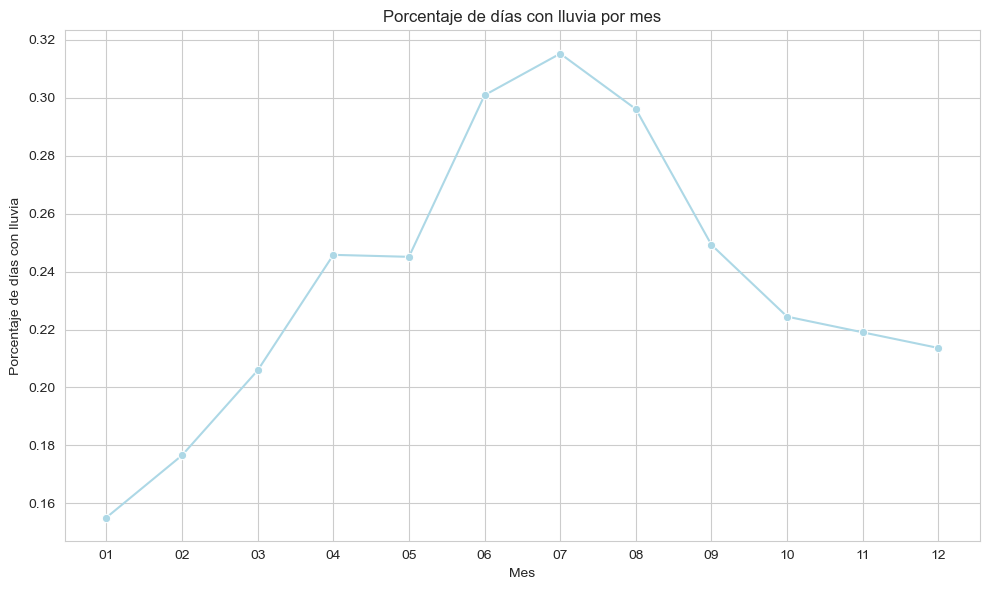

In [88]:
# Grilla y tamaño
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Datos agrupados por mes para la determinación del porcentaje de los dias con lluvia
sns.lineplot(x=df.groupby('month')['RainToday'].mean().index, y=df.groupby('month')['RainToday'].mean().values, marker='o', color='lightblue')

# Añadir etiquetas y título
plt.title('Porcentaje de días con lluvia por mes')
plt.xlabel('Mes')
plt.ylabel('Porcentaje de días con lluvia')

# Añadir etiquetas de meses al eje x
#plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Mostrar el gráfico
plt.tight_layout()
plt.show()


La grafica resultante confirma la presencia de un cierto grado de estacionalidad en las precipitaciones de las ciudades de Australia

### ANALIZAMOS VALORES FALTANTES

In [89]:
#Vemos la cantidad de valores NaN por columna
df.isna().sum()

Location               0
MinTemp              570
MaxTemp              558
Rainfall             986
Evaporation         4353
Sunshine            6713
WindGustDir         1645
WindGustSpeed       1642
WindDir9am          1648
WindDir3pm           437
WindSpeed9am         358
WindSpeed3pm         340
Humidity9am          940
Humidity3pm          890
Pressure9am          839
Pressure3pm          829
Cloud9am            9367
Cloud3pm            9550
Temp9am              585
Temp3pm              576
RainToday            986
RainTomorrow         985
RainfallTomorrow     985
month                  0
dtype: int64

Vemos la cantidad de valores NaN por columna en proporción ordenado de mayor a menor

In [90]:
# Serie de valores de mayor a menor
(df.isna().sum()/df.shape[0]).round(2).sort_values(ascending=False)*100


Cloud3pm            34.0
Cloud9am            33.0
Sunshine            24.0
Evaporation         15.0
WindGustDir          6.0
WindGustSpeed        6.0
WindDir9am           6.0
Humidity9am          3.0
Humidity3pm          3.0
RainToday            3.0
Pressure3pm          3.0
Pressure9am          3.0
RainTomorrow         3.0
RainfallTomorrow     3.0
Rainfall             3.0
MinTemp              2.0
WindDir3pm           2.0
Temp9am              2.0
Temp3pm              2.0
MaxTemp              2.0
WindSpeed9am         1.0
WindSpeed3pm         1.0
Location             0.0
month                0.0
dtype: float64

Observando las peores columnas, la cantidad de datos faltantes es menor al 34%. Por lo que si se realiza una imputación de datos se estaria usando el 66% de los datos, lo que se puede considerar un valor acorde para usar la información disponible para completar datos faltantes, la tecnica elegida en cada columna dependera de la presencia o no de outliers y se buscara agrupar según ciertas caracteristicas comunes entre los valores.
Por lo que no se descartara datos, ni se buscara información externa para alguna de las columnas del dataset

### DISTRIBUCION DE LOS DATOS EN LAS DIFERENTES CIUDADES

Distribución de los datos respecto a las ciudades a estudiar

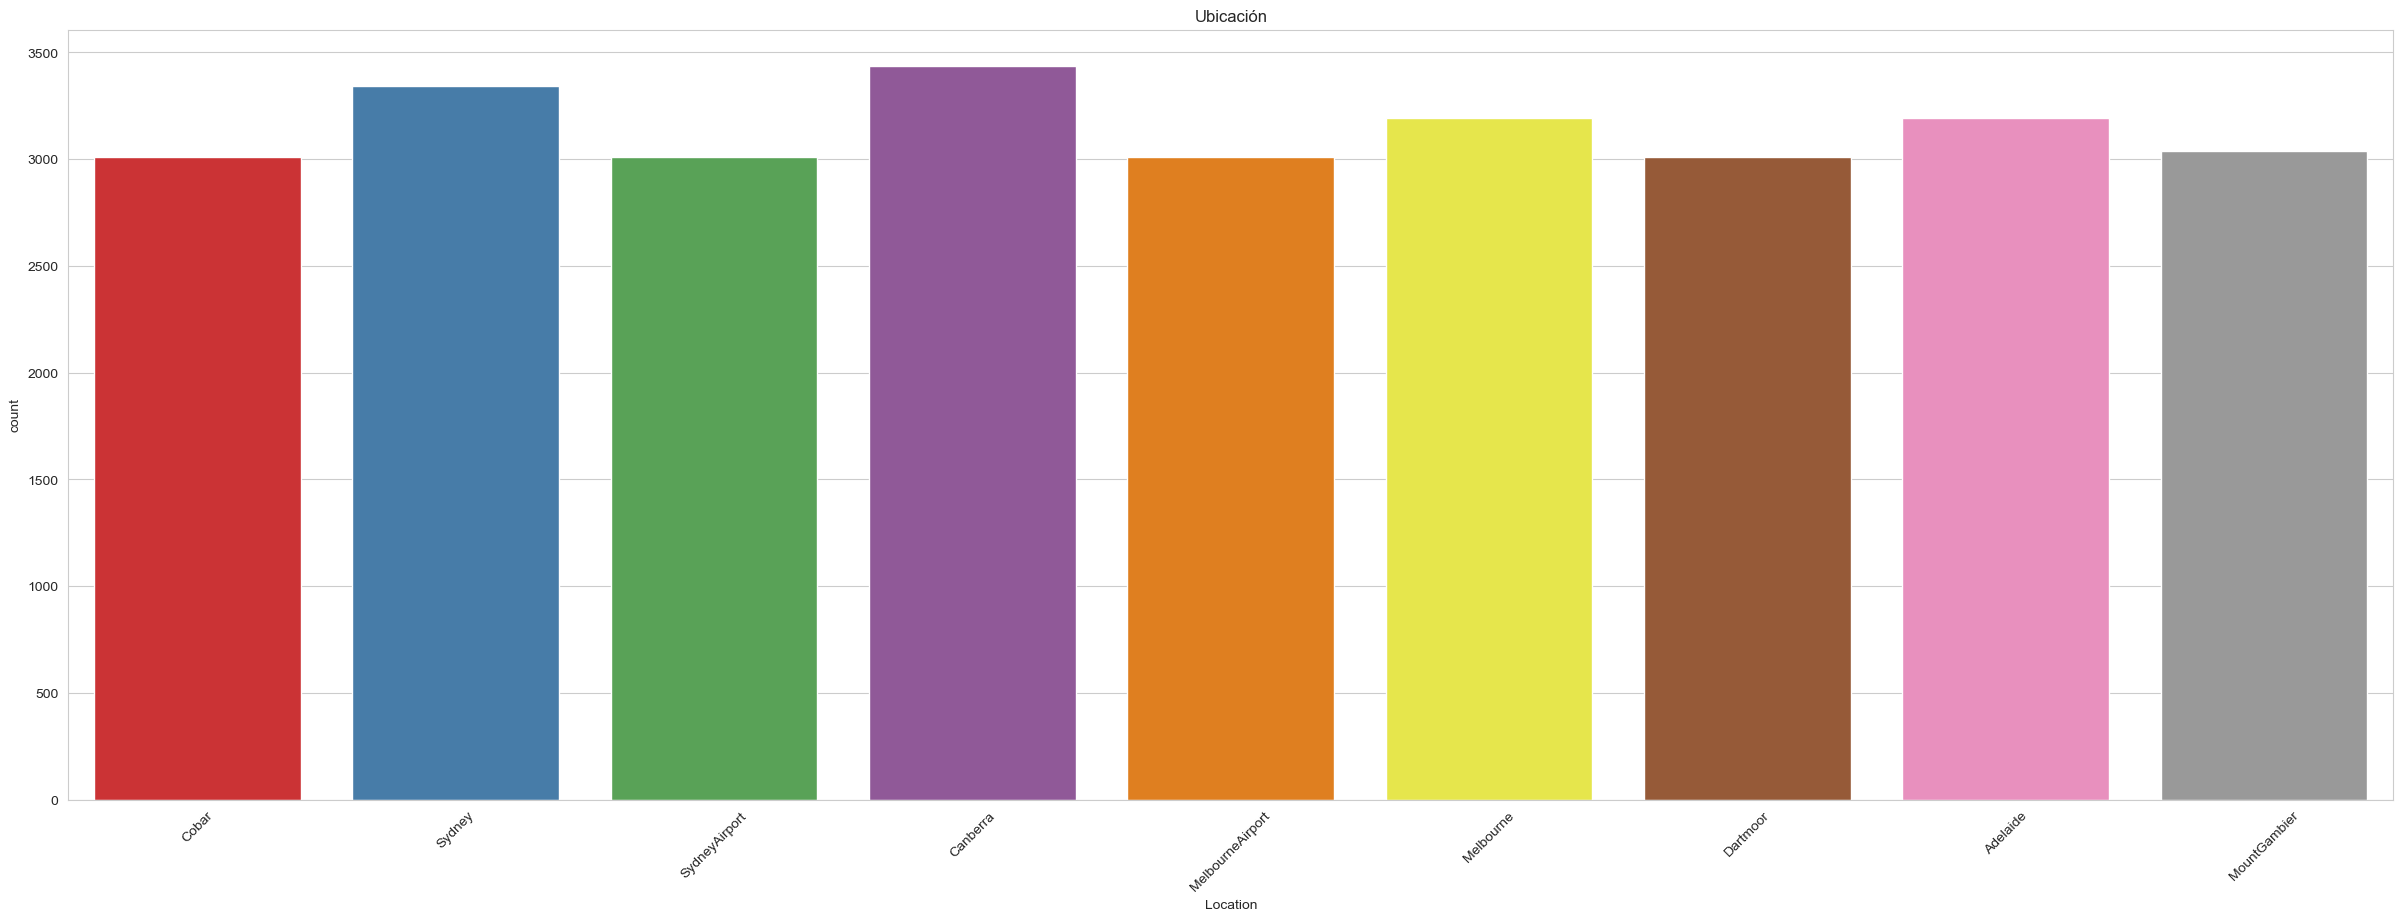

In [91]:
plt.figure(figsize=(30,10))

palette = "Set1"

ax = sns.countplot( x='Location', data=df, palette=palette, hue='Location', legend=False)
plt.title('Ubicación')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

Se puede observar que todas las ciudades en estudio, poseen una distribución casi uniforme de datos; esto ayuda a la confiabilidad de las predicciónes para cada ciudad.

### DATOS DE DIFERENTES TIEMPOS Y VALORES ATIPICOS

In [92]:
# Resumen estadistico
df.describe().round(2)


MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  27663.00  27675.00  27247.00     23880.00  21520.00       26591.00   
mean      11.26     21.90      2.05         4.83      6.89          41.84   
std        5.71      6.69      6.38         3.71      3.87          14.19   
min       -8.00      4.10      0.00         0.00      0.00           9.00   
25%        7.40     16.60      0.00         2.20      3.80          31.00   
50%       10.90     21.00      0.00         4.00      7.40          39.00   
75%       15.20     26.20      1.00         6.60     10.00          50.00   
max       33.90     46.80    119.40        86.20     14.30         122.00   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      27875.00      27893.00     27293.00     27343.00     27394.00   
mean          15.13         20.02        68.77        50.50      1018.25   
std            9.46          8.98        18.73        19.94         7.42   
min            0.00          0.00         5.00         1.00       982.30   
25%            9.00         13.00        57.00        37.00      1013.30   
50%           13.00         19.00        70.00        50.00      1018.40   
75%           20.00         26.00        83.00        64.00      1023.30   
max           69.00         76.00       100.00       100.00      1040.60   

       Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  \
count     27404.00  18866.00  18683.00  27648.00  27657.00   27247.00   
mean       1016.15      4.67      4.73     15.48     20.41       0.24   
std           7.27      2.81      2.63      5.70      6.53       0.43   
min         984.90      0.00      0.00     -1.30      3.70       0.00   
25%        1011.30      1.00      2.00     11.40     15.40       0.00   
50%        1016.30      6.00      6.00     15.00     19.50       0.00   
75%        1021.10      7.00      7.00     19.12     24.50       0.00   
max        1037.90      9.00      8.00     38.60     46.10       1.00   

       RainTomorrow  RainfallTomorrow  
count      27248.00          27248.00  
mean           0.24              2.05  
std            0.43              6.38  
min            0.00              0.00  
25%            0.00              0.00  
50%            0.00              0.00  
75%            0.00              1.00  
max            1.00            119.40

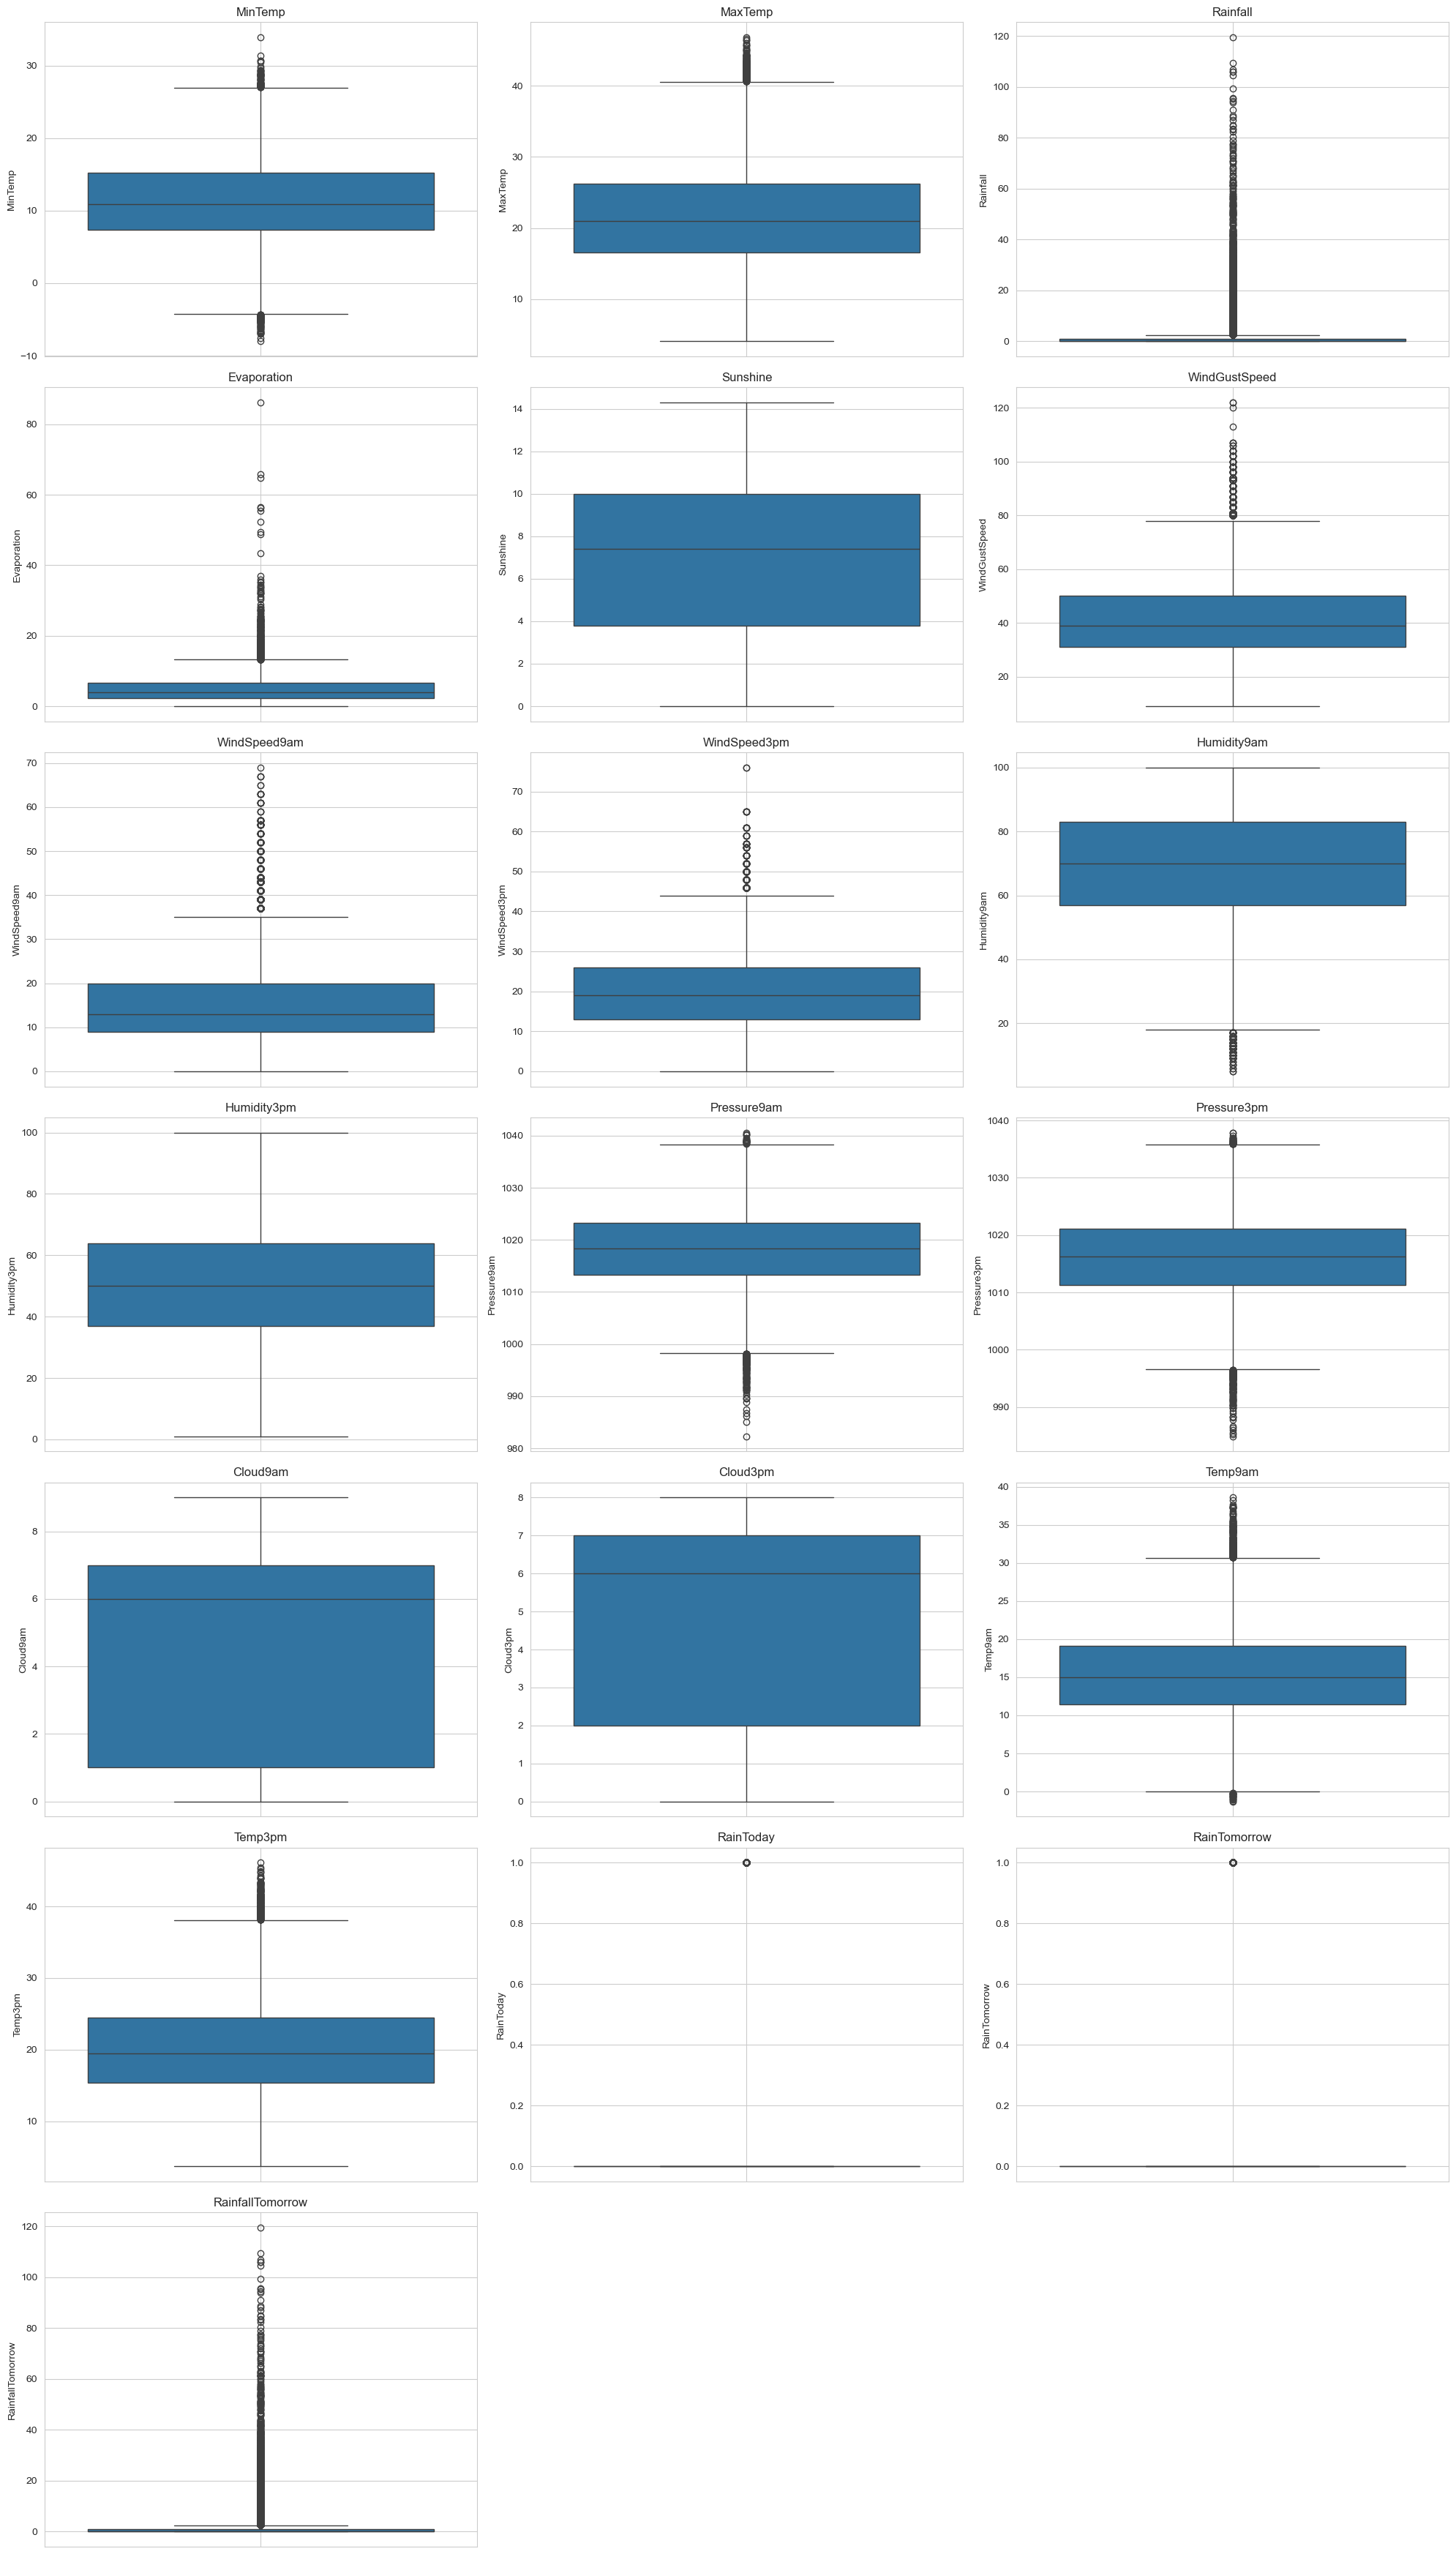

In [93]:
# Creamos una lista de columnas a graficar
columns_to_plot = df.describe().columns

# Número de columnas
n_cols = 3
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))

# Figura y los ejes con n_rows filas y n_cols columnas
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))

# Aplanamos los ejes para iterar fácilmente, en caso de que n_rows o n_cols sean mayores a 1
axes = axes.flatten()

# Iterar sobre cada columna y cada axis
for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].grid(True)  # Mostrar la cuadrícula para cada boxplot
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Eliminar los ejes vacíos si hay menos gráficos que espacios de subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

Observamos la matriz de correlación

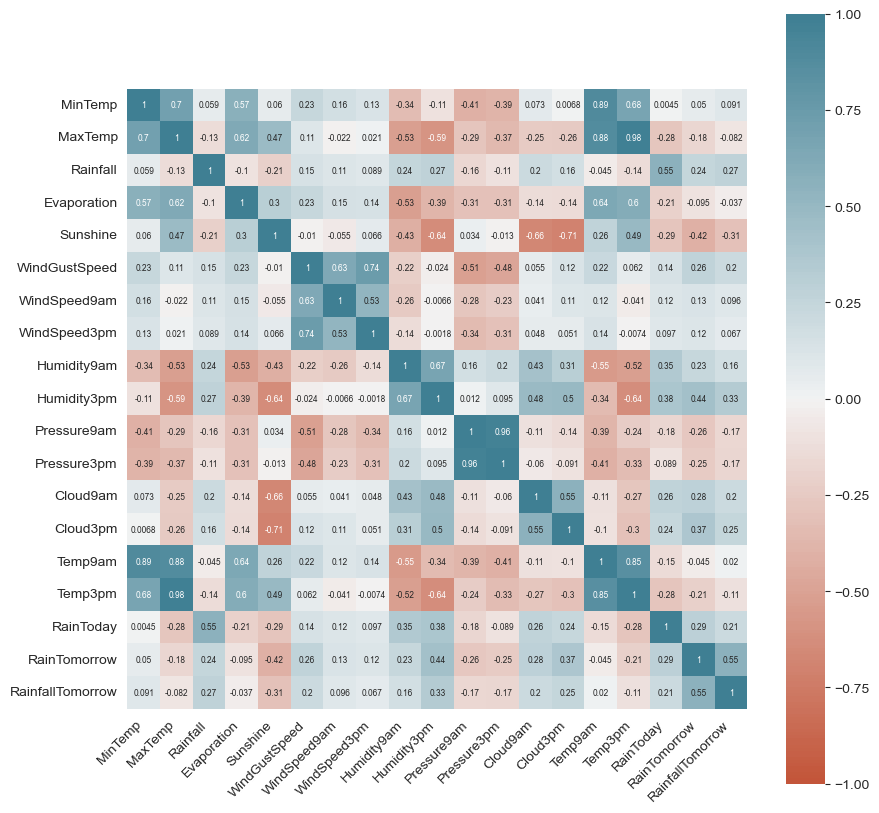

In [94]:
corr = df[df.describe().columns].corr()
plt.figure(figsize=(10,10))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Observando los graficos anteriores y prestando atención particular con las columnas que presentan datos del mismo tipo pero con diferente horario, se observo y  se tomo la decisión de unificarlas, explicación:

* En el diagrama de box se observa un comportamiento similar entre los pares.
* En la matriz de correlación se observa valores aproximados entre los pares con respecto a la variable objetivo, excepto el par de temperatura, por ello se prestara atención al coeficiente de correlación resultante de la unificación.
* La proporción de datos faltantes entre los pares es similar, excepto el par de velocidad del viento pero el mayor es del 6% por lo que la imputación  de datos lo cubrira con un 94% de información disponible.

Las operaciones típicas seran:
* col9am - col3pm; Diferencia (o Variación) entre dos eventos distintos
* (col9am + col3pm)/2; Promedio de valores entre dos eventos distintos
(Dado que el evento de las 3pm podria no estar disponible, se podria plantear una verificación del comportamiento del modelo teniendo solo el datos de las 9am)

La operación adecuada para cada par de columnas, sera aquella que mantenga el nivel más alto de correlacion en comparación a la versión separada de cada par.
En caso de no llegar a un valor considerable de correlación comparativa con la version individual, se cancelara la unificación.

Unificación de las columnas de diferente horario, se itero para determinar que operación era la mas adecuada.

In [95]:
df['windelta'] = (df.WindSpeed9am + df.WindSpeed3pm)/2

df['humdelta'] = (df.Humidity9am + df.Humidity3pm)/2

df['clodelta'] = (df.Cloud9am + df.Cloud3pm)/2

df['presdelta'] = df.Pressure9am - df.Pressure3pm

df['temdelta'] = df.Temp9am - df.Temp3pm

In [96]:
# Dropeamos los pares de columnas de diferente horario

#columns_to_drop = ["WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]

#df.drop(columns=columns_to_drop, inplace=True)


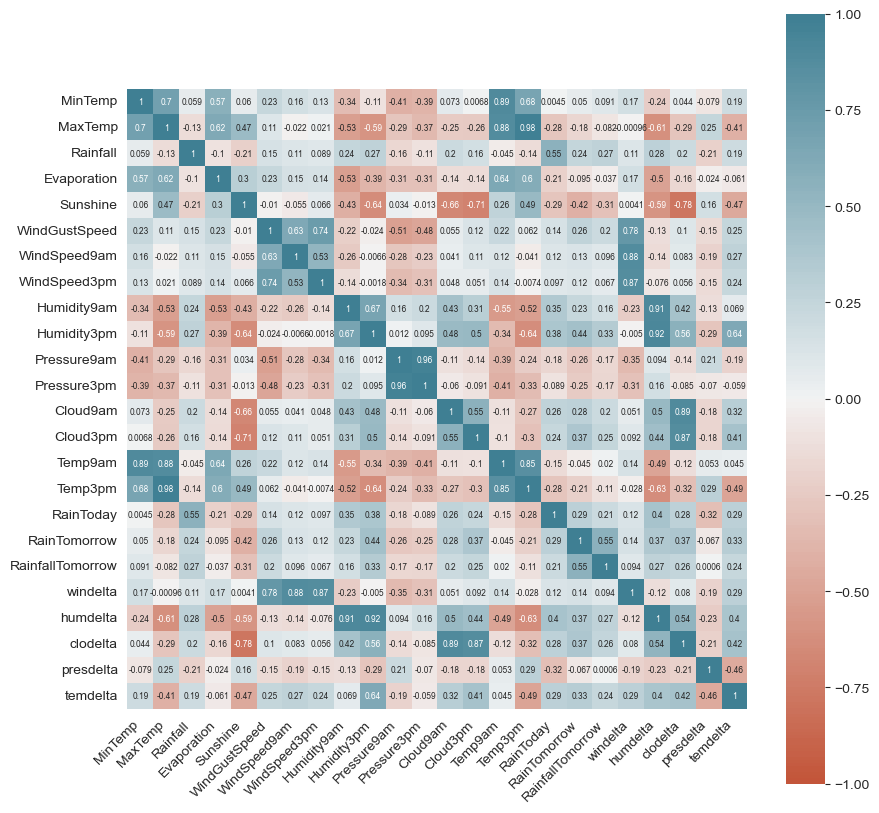

In [97]:
corr = df[df.describe().columns].corr()
plt.figure(figsize=(10,10))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Se unificaron todos los pares al verificar que cada uno alcanza como mínimo una correlación similar al de la forma individual en base a la variable objetivo. 

Con las columnas finales volvemos a observar algunas distribuciones

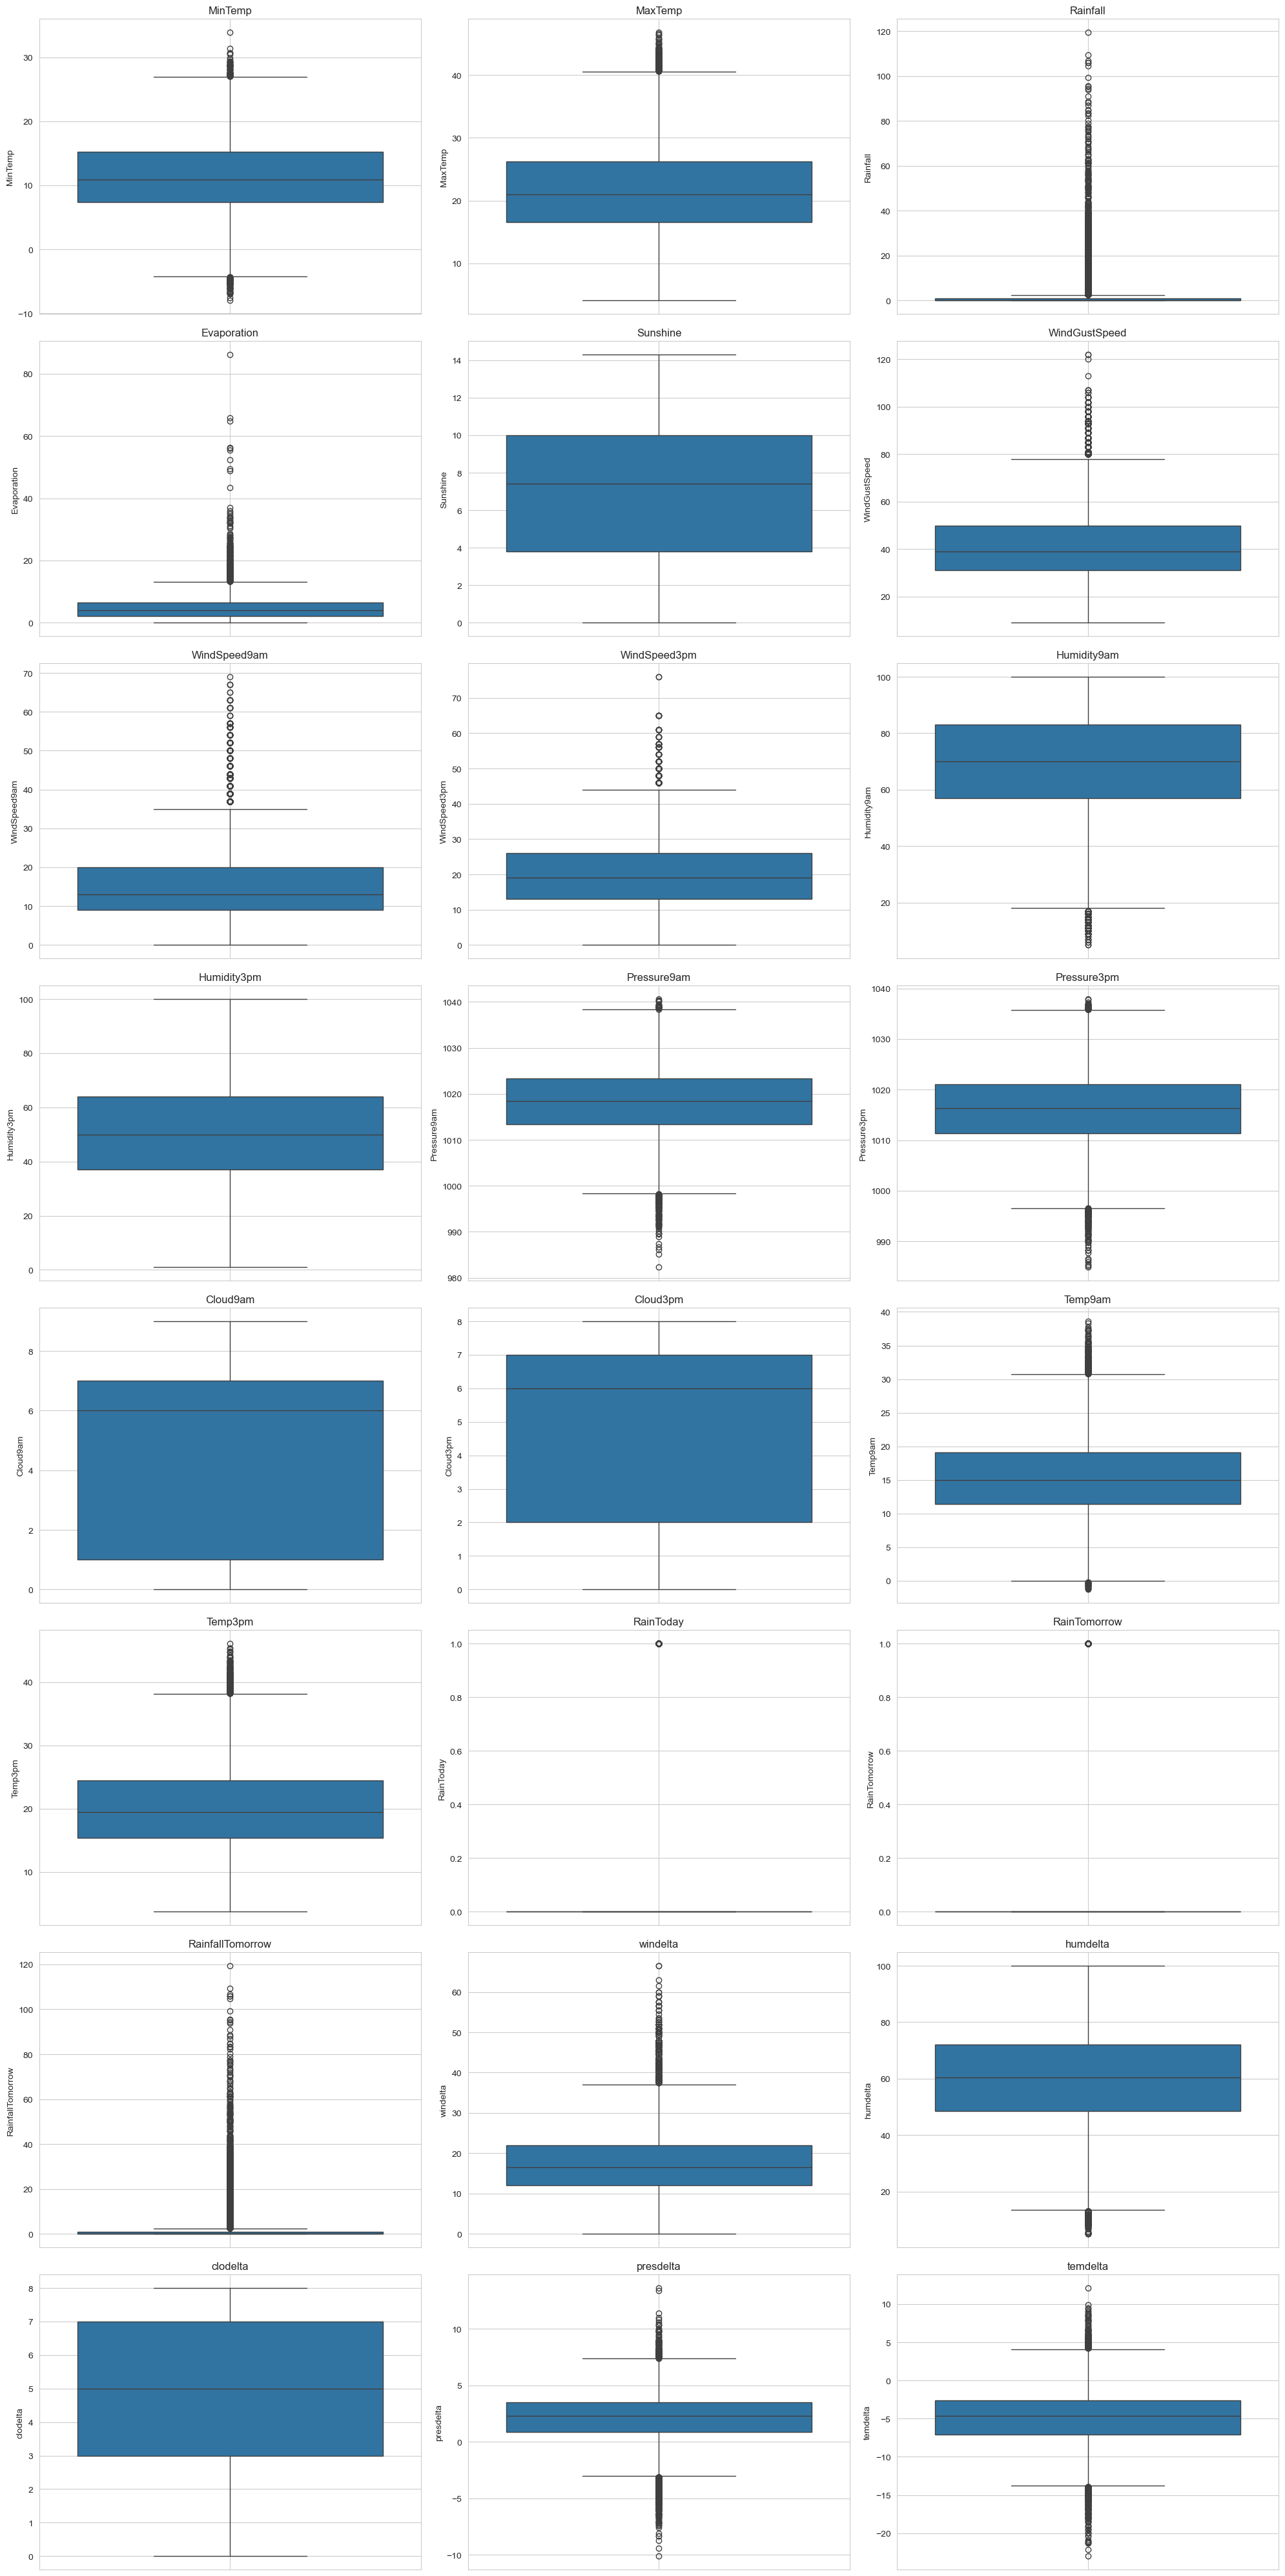

In [98]:
# Creamos una lista de columnas a graficar
columns_to_plot = df.describe().columns

# Número de columnas
n_cols = 3
n_rows = int(np.ceil(len(columns_to_plot) / n_cols))

# Figura y los ejes con n_rows filas y n_cols columnas
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 5 * n_rows))

# Aplanamos los ejes para iterar fácilmente, en caso de que n_rows o n_cols sean mayores a 1
axes = axes.flatten()

# Iterar sobre cada columna y cada axis
for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].grid(True)  # Mostrar la cuadrícula para cada boxplot
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Eliminar los ejes vacíos si hay menos gráficos que espacios de subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout
plt.tight_layout()

# Mostrar los gráficos
plt.show()

In [99]:
#_ = sns.pairplot(df[df.describe().columns], diag_kind="kde")

ANALISIS DE VALORES ATIPICOS:

Las 4 columnas Rainfall - Evaporation - WindGustSpeed - windelta presentan una distribución particular de outliers:

* WindGustSpeed: Los valores de velocidad de rafaga de viento para el outlier mas alto se encuentra dentro del rango de valores medidos en Australia, por lo que no se eliminaran

* windelta: Similar al caso anterior se encuentran dentro de un rango de valores medidos.

* Evaporation: Valores mayores a 60 son altos, pero según registros el record registrado es de 110mm, por lo que el outlier de 80mm aprox estaria dentro de un valor posible.

* Rainfall - RainfallTomorrow: Similar al caso anterior los valores de lluvia que se observan son valores posibles de registrar, por lo que no se eliminaran

El dataset a pesar de tener valores faltantes, no se encuentran outliers que demuestren ser errores gruesos

### TRAIN - TEST

Procedemos a dividir los datos en TRAIN-TEST; a ambos conjuntos se le aplicara la verificación de metricas para verificar que en el test haya buena generalización y en el train para ver el comportamiento del modelo.

El criterio de la división no sera temporal, ya que la columna fecha no la usamos sino parte de su información, en particular el mes; ademas porque tambien se demostro que las lluvias son estacionarias, es decir, no son fluctuantes o sensibles en periodos anuales, ya que respetan un patron anual.

Se aplicara directamente la division de 20% Test y 80% Train.

Dado que se quiere aprovechar esta división para clasificación y regresión; y para ello el test y train deben mantener la proporción de clases de RainTomorrow. Se procederá de la siguiente forma:

* Se filtrara los NaN de la columna RainTomorrow dfnan_rtw y df
* Sobre los datos sin NaN (df) se realizara el Train-Test (train_df y test_df) considerando la proporción de clases
* Sobre los datos con NaN (dfnan_rtw) se realizara el Train-Test (train_dfrtw y test_dfrtw) sin considerar la proporción de clases
* Luego se unirán cada uno con su correspondiente Train - Test


In [100]:
# Separamos NaNs
dfnan_rtw = df[df['RainTomorrow'].isnull()]

df = df.dropna(subset=['RainTomorrow'])

In [101]:
# Division de los datos en conjuntos de entrenamiento y prueba considerando proporción de las clases de RainTomorrow
train_df, test_df = train_test_split(df, test_size=0.2, random_state=33, stratify=df.RainTomorrow)

# Division de los datos en conjuntos de entrenamiento y prueba sin considerar la proporción de las clases de RainTomorrow
train_dfrtw, test_dfrtw = train_test_split(dfnan_rtw, test_size=0.2, random_state=11)

In [102]:
# Unimos los Train - Test cada uno con su correspondiente

train_df = pd.concat([train_df, train_dfrtw])

test_df = pd.concat([test_df, test_dfrtw])

In [103]:
train_df.shape, test_df.shape

((22586, 29), (5647, 29))

In [104]:
train_df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
45588          Canberra     12.4     32.1       0.0          8.4      11.1   
45599          Canberra     13.3     22.2       0.2          6.6       2.3   
65054  MelbourneAirport      8.1     11.8       0.0          4.0       0.5   
48918          Canberra     12.8     29.9       0.0          NaN       NaN   
34124     SydneyAirport      9.9     15.4       0.0          3.2      10.3   
...                 ...      ...      ...       ...          ...       ...   
69479         Melbourne      NaN      NaN       NaN          5.0       1.6   
68377         Melbourne     11.8     24.2       0.0          5.4      10.3   
68342         Melbourne     13.1     20.5       0.0          2.2       2.1   
69845         Melbourne      NaN      NaN       NaN          5.4      13.3   
97704          Adelaide      8.9     15.5       0.0          1.2       NaN   

      WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
45588           E           46.0         SE        WSW           7.0   
45599         ENE           39.0          E          E          20.0   
65054         NNW           72.0          N          N          37.0   
48918         WNW           59.0        NaN         NW           0.0   
34124           S           50.0        WSW          S          17.0   
...           ...            ...        ...        ...           ...   
69479           W           39.0        WSW          S          26.0   
68377          NW           31.0        NNE          N           6.0   
68342          NW           33.0        NNE        NNW           7.0   
69845         SSE           33.0        SSE        SSE           9.0   
97704         NNW           37.0        NNE         NW          11.0   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
45588           9.0         70.0         22.0       1017.9       1012.8   
45599          17.0         70.0         55.0       1021.0       1018.6   
65054          30.0         73.0         79.0       1013.3       1010.8   
48918          30.0         99.0         46.0       1015.9       1010.6   
34124          30.0         55.0         65.0       1023.7       1023.6   
...             ...          ...          ...          ...          ...   
69479          24.0          NaN          NaN          NaN          NaN   
68377          13.0         57.0         40.0       1024.2       1020.0   
68342          11.0         75.0         60.0       1013.5       1010.8   
69845          19.0          NaN          NaN          NaN          NaN   
97704          20.0         83.0         60.0       1012.7       1011.2   

       Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
45588       0.0       3.0     19.1     30.7        0.0           0.0   
45599       7.0       7.0     16.5     21.2        0.0           0.0   
65054       7.0       7.0     10.5     10.8        0.0           0.0   
48918       4.0       NaN     16.0     28.6        0.0           0.0   
34124       1.0       3.0     14.1     14.2        0.0           0.0   
...         ...       ...      ...      ...        ...           ...   
69479       NaN       NaN      NaN      NaN        NaN           NaN   
68377       1.0       7.0     16.1     21.4        0.0           NaN   
68342       7.0       NaN     15.5     20.1        0.0           NaN   
69845       NaN       NaN      NaN      NaN        NaN           NaN   
97704       NaN       NaN     10.5     15.3        0.0           NaN   

       RainfallTomorrow month  windelta  humdelta  clodelta  presdelta  \
45588               0.0    11       8.0      46.0       1.5        5.1   
45599               0.0    11      18.5      62.5       7.0        2.4   
65054               0.4    07      33.5      76.0       7.0        2.5   
48918               0.4    03      15.0      72.5       NaN        5.3   
34124               0.0    09      23.5      60.0       2.0        0.1   
...

### IMPUTACION DE DATOS - TRAIN

In [105]:
# Copiamos a la variable auxiliar
df = train_df.copy()

# Proporción de datos faltantes
(df.isna().sum()/df.shape[0]).round(2)*100

Location             0.0
MinTemp              2.0
MaxTemp              2.0
Rainfall             3.0
Evaporation         15.0
Sunshine            24.0
WindGustDir          6.0
WindGustSpeed        6.0
WindDir9am           6.0
WindDir3pm           2.0
WindSpeed9am         1.0
WindSpeed3pm         1.0
Humidity9am          3.0
Humidity3pm          3.0
Pressure9am          3.0
Pressure3pm          3.0
Cloud9am            33.0
Cloud3pm            34.0
Temp9am              2.0
Temp3pm              2.0
RainToday            3.0
RainTomorrow         3.0
RainfallTomorrow     3.0
month                0.0
windelta             1.0
humdelta             3.0
clodelta            36.0
presdelta            3.0
temdelta             2.0
dtype: float64

Tecnica adoptada en cada caso:

Rainfall - RainfallTomorrow: Se imputara según datos agrupados primero por mes y segundo por ciudad, segun la mediana de los datos resultantes del grupo, la cual se ajustara con la proporción de dias lluviosos del mes correspondiente.

MinTemp - MaxTemp - Evaporation - Sunshine - WindGustSpeed - RainToday - windelta - humdelta - clodelta - presdelta - temdelta: Se imputara según datos agrupados primero por mes, segundo por ciudad y tercero por rango de lluvia asociado(ya que se considera que la presencia y magnitud de lluvia interactua con todos los valores climaticos), segun la mediana de los datos resultantes del grupo (la mediana para evitar la influencia de valores de eventos extraordinarios)

In [106]:
# Calcular la proporción de días lluviosos por mes
rain_prop = df.groupby('month')['RainToday'].mean()

# Agrupar por mes y ubicación, y calcular la mediana de Rainfall
median_rainfall = df.groupby(['month', 'Location'])['Rainfall'].median()

# Ajustar la mediana de Rainfall según la proporción de días lluviosos por mes
median_rainfall_adjusted = (median_rainfall * rain_prop[median_rainfall.index.get_level_values('month')].values).round(1)

# Rellenar los valores faltantes en Rainfall con la mediana ajustada correspondiente
df['Rainfall'] = df.apply(lambda row: median_rainfall_adjusted[row['month'], row['Location']].round(1) if pd.isnull(row['Rainfall']) else row['Rainfall'], axis=1)


In [107]:
df.Rainfall.isna().sum()

0

In [108]:
# Calcular la proporción de días lluviosos por mes
rain_prop = df.groupby('month')['RainfallTomorrow'].mean()

# Agrupar por mes y ubicación, y calcular la mediana de RainfallTomorrow
median_rainfall = df.groupby(['month', 'Location'])['RainfallTomorrow'].median()

# Ajustar la mediana de RainfallTomorrow según la proporción de días lluviosos por mes
median_rainfall_adjusted = (median_rainfall * rain_prop[median_rainfall.index.get_level_values('month')].values).round(1)

# Rellenar los valores faltantes en RainfallTomorrow con la mediana ajustada correspondiente
df['RainfallTomorrow'] = df.apply(lambda row: median_rainfall_adjusted[row['month'], row['Location']].round(1) if pd.isnull(row['RainfallTomorrow']) else row['RainfallTomorrow'], 
                                  axis=1)

In [109]:
df.RainfallTomorrow.isna().sum()

0

In [110]:
# Definición del tamaño de cada rango; esto es el tamaño del rango en que los demas valores climaticos suelen compartir magnitudes típicas
# La interacción es mucho mas compleja por lo que esta es una simplificación a efectos prácticos
range_size = 4

num_ranges = int(df['Rainfall'].max()/range_size) + 1 # Dado que el truncamiento podria dejar valores afuera se agrega un rango más

min_rainfall = df['Rainfall'].min()

# Crear una lista de tuplas con los rangos
rainfall_ranges = [(round(min_rainfall + i * range_size), round(min_rainfall + (i + 1) * range_size)) for i in range(num_ranges)]

# Función para asignar un rango de lluvia a cada valor de Rainfall
def assign_range(rainfall):
    for i, (lower, upper) in enumerate(rainfall_ranges):
        if lower <= rainfall < upper:
            return f'{lower}-{upper}'
    return f'{rainfall_ranges[-1][0]}+'

In [111]:
# Crear una nueva columna 'RainfallRange' que contenga los rangos de lluvia asignados
df['RainfallRange'] = df['Rainfall'].apply(assign_range)

# Agrupar por mes, ubicación y rango de lluvia, y calcular la mediana de MinTemp
median = df.groupby(['month', 'Location', 'RainfallRange'])[df.describe().columns].median()


In [112]:
# Verificar si hay valores NaN en el DataFrame resultante
if median.isna().any().any():
    print("El DataFrame agrupado contiene valores NaN.")
else:
    print("El DataFrame agrupado no contiene valores NaN.")

El DataFrame agrupado contiene valores NaN.


Dado que podia pasar esto, los valores faltantes se completaran con el siguiente nivel del groupby

In [113]:
# Calcular la mediana del grupo 'Location' dentro de cada 'month'
median_location_month = df.groupby(['month', 'Location'])[df.describe().columns].median()

# Rellenar los valores NaN en el DataFrame agrupado 'median' con la mediana del grupo 'Location' para cada combinación de 'month' y 'Location'
median = median.fillna(median_location_month)


In [114]:
# Calcular la mediana del grupo 'month'
median_month = df.groupby('month')[df.describe().columns].median()

# Rellenar los valores NaN en el DataFrame agrupado 'median_filled' con la mediana del grupo 'month' para cada 'month' que aún tenga valores NaN
median = median.fillna(median_month)


In [115]:
# Verificar si hay valores NaN en el DataFrame resultante
if median.isna().any().any():
    print("El DataFrame agrupado contiene valores NaN.")
else:
    print("El DataFrame agrupado no contiene valores NaN.")

El DataFrame agrupado no contiene valores NaN.


In [116]:
# Columnas a imputar datos
cols_n = df[df.describe().columns].drop(columns = ['RainToday', 'RainTomorrow'], axis=1)

# Obtener las columnas del DataFrame filtrado que tienen valores numéricos
n_columnas = cols_n.describe().columns

# Iteramos sobre el df cols_n accediendo al nombre de las columnas
for i in cols_n:
    df[i] = df.apply(lambda row: median.loc[row['month'], row['Location'], row['RainfallRange']][i] if pd.isna(row[i]) else row[i], axis=1)

In [117]:
# Eliminar la columna auxiliar RainfallRange
df.drop(columns=['RainfallRange'], inplace=True)

In [118]:
(df[n_columnas].isna().sum()/df[n_columnas].shape[0])*100

MinTemp             0.0
MaxTemp             0.0
Rainfall            0.0
Evaporation         0.0
Sunshine            0.0
WindGustSpeed       0.0
WindSpeed9am        0.0
WindSpeed3pm        0.0
Humidity9am         0.0
Humidity3pm         0.0
Pressure9am         0.0
Pressure3pm         0.0
Cloud9am            0.0
Cloud3pm            0.0
Temp9am             0.0
Temp3pm             0.0
RainfallTomorrow    0.0
windelta            0.0
humdelta            0.0
clodelta            0.0
presdelta           0.0
temdelta            0.0
dtype: float64

Completado los datos del tipo numerico queda por resolver los del tipo string y las booleanas

In [119]:
# Agrupar por mes y ubicación, y calcular la moda de las columnas string y las booleanas
mode_str = df.groupby(['month', 'Location'])[['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']].agg(lambda x: x.mode()[0])


In [120]:
# Columnas a imputar datos
cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for i in cols:
    df[i] = df.apply(lambda row: mode_str.loc[row['month'], row['Location']][i] if pd.isna(row[i]) else row[i], axis=1)

In [121]:
(df.isna().sum()/df.shape[0])*100

Location            0.0
MinTemp             0.0
MaxTemp             0.0
Rainfall            0.0
Evaporation         0.0
Sunshine            0.0
WindGustDir         0.0
WindGustSpeed       0.0
WindDir9am          0.0
WindDir3pm          0.0
WindSpeed9am        0.0
WindSpeed3pm        0.0
Humidity9am         0.0
Humidity3pm         0.0
Pressure9am         0.0
Pressure3pm         0.0
Cloud9am            0.0
Cloud3pm            0.0
Temp9am             0.0
Temp3pm             0.0
RainToday           0.0
RainTomorrow        0.0
RainfallTomorrow    0.0
month               0.0
windelta            0.0
humdelta            0.0
clodelta            0.0
presdelta           0.0
temdelta            0.0
dtype: float64

In [122]:
# Actualizamos nuestro df de train
train_df = df.copy()
train_df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
45588          Canberra     12.4     32.1       0.0          8.4      11.1   
45599          Canberra     13.3     22.2       0.2          6.6       2.3   
65054  MelbourneAirport      8.1     11.8       0.0          4.0       0.5   
48918          Canberra     12.8     29.9       0.0          5.0       8.9   
34124     SydneyAirport      9.9     15.4       0.0          3.2      10.3   
...                 ...      ...      ...       ...          ...       ...   
69479         Melbourne     16.2     26.2       0.0          5.0       1.6   
68377         Melbourne     11.8     24.2       0.0          5.4      10.3   
68342         Melbourne     13.1     20.5       0.0          2.2       2.1   
69845         Melbourne     16.2     26.2       0.0          5.4      13.3   
97704          Adelaide      8.9     15.5       0.0          1.2       4.5   

      WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
45588           E           46.0         SE        WSW           7.0   
45599         ENE           39.0          E          E          20.0   
65054         NNW           72.0          N          N          37.0   
48918         WNW           59.0         SE         NW           0.0   
34124           S           50.0        WSW          S          17.0   
...           ...            ...        ...        ...           ...   
69479           W           39.0        WSW          S          26.0   
68377          NW           31.0        NNE          N           6.0   
68342          NW           33.0        NNE        NNW           7.0   
69845         SSE           33.0        SSE        SSE           9.0   
97704         NNW           37.0        NNE         NW          11.0   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
45588           9.0         70.0         22.0      1017.90       1012.8   
45599          17.0         70.0         55.0      1021.00       1018.6   
65054          30.0         73.0         79.0      1013.30       1010.8   
48918          30.0         99.0         46.0      1015.90       1010.6   
34124          30.0         55.0         65.0      1023.70       1023.6   
...             ...          ...          ...          ...          ...   
69479          24.0         60.0         46.5      1014.25       1012.5   
68377          13.0         57.0         40.0      1024.20       1020.0   
68342          11.0         75.0         60.0      1013.50       1010.8   
69845          19.0         60.0         46.5      1014.25       1012.5   
97704          20.0         83.0         60.0      1012.70       1011.2   

       Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
45588       0.0       3.0    19.10     30.7        0.0           0.0   
45599       7.0       7.0    16.50     21.2        0.0           0.0   
65054       7.0       7.0    10.50     10.8        0.0           0.0   
48918       4.0       4.0    16.00     28.6        0.0           0.0   
34124       1.0       3.0    14.10     14.2        0.0           0.0   
...         ...       ...      ...      ...        ...           ...   
69479       5.0       3.0    18.65     24.1        0.0           0.0   
68377       1.0       7.0    16.10     21.4        0.0           0.0   
68342       7.0       6.0    15.50     20.1        0.0           0.0   
69845       5.0       3.0    18.65     24.1        0.0           0.0   
97704       6.0       6.0    10.50     15.3        0.0           0.0   

       RainfallTomorrow month  windelta  humdelta  clodelta  presdelta  \
45588               0.0    11       8.0      46.0       1.5        5.1   
45599               0.0    11      18.5      62.5       7.0        2.4   
65054               0.4    07      33.5      76.0       7.0        2.5   
48918               0.4    03      15.0      72.5       4.5        5.3   
34124               0.0    09      23.5      60.0       2.0        0.1   
...

### IMPUTACION DE DATOS - TEST

Para la imputación de Test se hará con la información de Train; por lo que se realizara los mismos pasos anteriores y criterios de relleno que se usaron en Train.

In [123]:
# Proporción de datos faltantes
(test_df.isna().sum()/test_df.shape[0]).round(2)*100

Location             0.0
MinTemp              2.0
MaxTemp              2.0
Rainfall             4.0
Evaporation         15.0
Sunshine            24.0
WindGustDir          5.0
WindGustSpeed        5.0
WindDir9am           6.0
WindDir3pm           2.0
WindSpeed9am         1.0
WindSpeed3pm         1.0
Humidity9am          3.0
Humidity3pm          4.0
Pressure9am          3.0
Pressure3pm          3.0
Cloud9am            33.0
Cloud3pm            34.0
Temp9am              2.0
Temp3pm              2.0
RainToday            4.0
RainTomorrow         3.0
RainfallTomorrow     3.0
month                0.0
windelta             1.0
humdelta             4.0
clodelta            36.0
presdelta            3.0
temdelta             2.0
dtype: float64

In [124]:
# Rellenar los valores faltantes en Rainfall con la mediana ajustada correspondiente
test_df['Rainfall'] = test_df.apply(lambda row: median_rainfall_adjusted[row['month'], row['Location']].round(1) if pd.isnull(row['Rainfall']) else row['Rainfall'], axis=1)


In [125]:
test_df.Rainfall.isna().sum()

0

In [126]:
# Rellenar los valores faltantes en RainfallTomorrow con la mediana ajustada correspondiente
test_df['RainfallTomorrow'] = test_df.apply(lambda row: median_rainfall_adjusted[row['month'], row['Location']].round(1) if pd.isnull(row['RainfallTomorrow']) else row['RainfallTomorrow'], 
                                  axis=1)

In [127]:
test_df.RainfallTomorrow.isna().sum()

0

In [128]:
# Crear una nueva columna 'RainfallRange' que contenga los rangos de lluvia asignados
test_df['RainfallRange'] = test_df['Rainfall'].apply(assign_range)

Dado a la lógica planteada en el relleno, puede ser que los datos de Train no tengan todas las referencias disponibles para rellenar Test, es decir, los index no sean suficientes.

Por ello, se desarrollara una función para que ignore en caso de falta de index del groupby de Train y pueda seguir con el relleno de los otros datos.

Para rellenar datos sin index disponible de Test, se tomara el criterio de rellenarlo directamente con la moda de Train según columna correspondiente.

In [129]:
def fill_index(row, col):
    try:
        if pd.isna(row[col]):
            return median.loc[row['month'], row['Location'], row['RainfallRange']][col]
        else:
            return row[col]
    except KeyError:
        return row[col]

In [130]:
# Columnas a imputar datos
cols_n = df[df.describe().columns].drop(columns = ['RainToday', 'RainTomorrow'], axis=1)

for i in cols_n:
    test_df[i] = test_df.apply(lambda row: fill_index(row, i), axis=1)

In [131]:
# Eliminar la columna auxiliar RainfallRange
test_df.drop(columns=['RainfallRange'], inplace=True)

In [132]:
# Vemos valores faltantes en las columnas numéricas
(test_df[n_columnas].isna().sum()/test_df[n_columnas].shape[0])*100

MinTemp             0.000000
MaxTemp             0.000000
Rainfall            0.000000
Evaporation         0.478130
Sunshine            0.389587
WindGustSpeed       0.017709
WindSpeed9am        0.000000
WindSpeed3pm        0.000000
Humidity9am         0.000000
Humidity3pm         0.000000
Pressure9am         0.000000
Pressure3pm         0.000000
Cloud9am            0.283336
Cloud3pm            0.301045
Temp9am             0.000000
Temp3pm             0.000000
RainfallTomorrow    0.000000
windelta            0.000000
humdelta            0.000000
clodelta            0.301045
presdelta           0.000000
temdelta            0.000000
dtype: float64

Las numéricas sin rellenar ahora se rellenaran con la moda del df.

In [133]:
# Calcular la moda de cada columna
moda = df[n_columnas].mode().iloc[0]

moda

MinTemp               16.2
MaxTemp               15.0
Rainfall               0.0
Evaporation            1.4
Sunshine               0.0
WindGustSpeed         39.0
WindSpeed9am           9.0
WindSpeed3pm          20.0
Humidity9am           67.0
Humidity3pm           47.0
Pressure9am         1018.7
Pressure3pm         1013.3
Cloud9am               6.0
Cloud3pm               6.0
Temp9am               15.1
Temp3pm               23.1
RainfallTomorrow       0.0
windelta              13.0
humdelta              59.5
clodelta               5.0
presdelta              2.0
temdelta              -4.0
Name: 0, dtype: float64

In [134]:
# Calcular la moda de cada columna
moda = df[n_columnas].mode().iloc[0]

# Rellenar los valores faltantes en el DataFrame con la moda correspondiente
test_df.fillna(moda, inplace=True)

# Vemos valores faltantes en las columnas numéricas
(test_df[n_columnas].isna().sum()/test_df.shape[0])*100

MinTemp             0.0
MaxTemp             0.0
Rainfall            0.0
Evaporation         0.0
Sunshine            0.0
WindGustSpeed       0.0
WindSpeed9am        0.0
WindSpeed3pm        0.0
Humidity9am         0.0
Humidity3pm         0.0
Pressure9am         0.0
Pressure3pm         0.0
Cloud9am            0.0
Cloud3pm            0.0
Temp9am             0.0
Temp3pm             0.0
RainfallTomorrow    0.0
windelta            0.0
humdelta            0.0
clodelta            0.0
presdelta           0.0
temdelta            0.0
dtype: float64

Completado los datos del tipo numerico queda por resolver los del tipo string y las booleanas

In [135]:
# Columnas a imputar datos
cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for i in cols:
    test_df[i] = test_df.apply(lambda row: mode_str.loc[row['month'], row['Location']][i] if pd.isna(row[i]) else row[i], axis=1)

In [136]:
(test_df.isna().sum()/test_df.shape[0])*100

Location            0.0
MinTemp             0.0
MaxTemp             0.0
Rainfall            0.0
Evaporation         0.0
Sunshine            0.0
WindGustDir         0.0
WindGustSpeed       0.0
WindDir9am          0.0
WindDir3pm          0.0
WindSpeed9am        0.0
WindSpeed3pm        0.0
Humidity9am         0.0
Humidity3pm         0.0
Pressure9am         0.0
Pressure3pm         0.0
Cloud9am            0.0
Cloud3pm            0.0
Temp9am             0.0
Temp3pm             0.0
RainToday           0.0
RainTomorrow        0.0
RainfallTomorrow    0.0
month               0.0
windelta            0.0
humdelta            0.0
clodelta            0.0
presdelta           0.0
temdelta            0.0
dtype: float64

In [137]:
# DF de test
test_df

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
7303              Cobar     11.5     13.4      10.8          3.4       7.9   
7695              Cobar      5.5     23.3       0.0          7.0      11.4   
66278  MelbourneAirport     13.8     30.0       0.0          6.6      11.6   
64664  MelbourneAirport     10.1     21.8       0.0          3.0       6.7   
83516          Dartmoor     12.0     17.6      25.2          7.6       5.9   
...                 ...      ...      ...       ...          ...       ...   
68280         Melbourne     10.4     15.1       0.4          1.6       2.7   
69879         Melbourne     16.2     27.2       0.0          4.0       1.7   
80979          Dartmoor     12.4     25.0       0.0          5.8      11.7   
69868         Melbourne     16.2     27.2       0.0          8.4       8.2   
69712         Melbourne      9.8     18.4       0.0          1.8       3.8   

      WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
7303          NNE           46.0        NNE          N          26.0   
7695            E           22.0        ESE          E          13.0   
66278           S           35.0        ENE        SSE           7.0   
64664           N           41.0          N        WNW          26.0   
83516          SW           56.0        WSW         SW          11.0   
...           ...            ...        ...        ...           ...   
68280           W           37.0          N          S          13.0   
69879           S           41.0        WSW          S          13.0   
80979         SSW           41.0          E        SSW          11.0   
69868           S           41.0        SSW          S          13.0   
69712           S           24.0         SW          S          11.0   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
7303           15.0         95.0         96.0       1018.7      1016.00   
7695            9.0         32.0         17.0       1024.0      1018.70   
66278          22.0         69.0         41.0       1020.2      1018.30   
64664          24.0         71.0         44.0       1021.0      1018.00   
83516          31.0         86.0         55.0       1002.6      1008.30   
...             ...          ...          ...          ...          ...   
68280          13.0         79.0         69.0       1017.2      1014.10   
69879          30.0         67.0         47.0       1015.2      1013.30   
80979          20.0         71.0         46.0       1015.1      1013.30   
69868          22.0         67.0         47.0       1015.2      1013.30   
69712          11.0         62.5         45.0       1017.7      1014.75   

       Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  \
7303        8.0       7.0     11.9    13.30        1.0           1.0   
7695        0.0       0.0     15.9    22.20        0.0           0.0   
66278       2.0       3.0     19.4    28.30        0.0           0.0   
64664       7.0       5.0     14.8    21.50        0.0           0.0   
83516       6.0       5.0     13.1    16.80        1.0           1.0   
...         ...       ...      ...      ...        ...           ...   
68280       7.0       7.0     11.5    13.70        0.0           0.0   
69879       6.0       5.0     18.9    25.10        0.0           0.0   
80979       5.0       5.0     16.7    23.10        0.0           0.0   
69868       6.0       5.0     18.9    25.10        0.0           0.0   
69712       7.0       7.0     12.8    16.85        0.0           0.0   

       RainfallTomorrow month  windelta  humdelta  clodelta  presdelta  \
7303                3.2    07      20.5      95.5       7.5        2.7   
7695                0.0    10      11.0      24.5       0.0        5.3   
66278               0.0    01      14.5      55.0       2.5        1.9   
64664               0.0    05      25.0      57.5       6.0        3.0   
83516               1.2    03      21.0      70.5       5.0       -5.7   
...

### BALANCEO DEL DATASET

Se observara la información con respecto a la cantidad de dias con y sin precipitaciones 

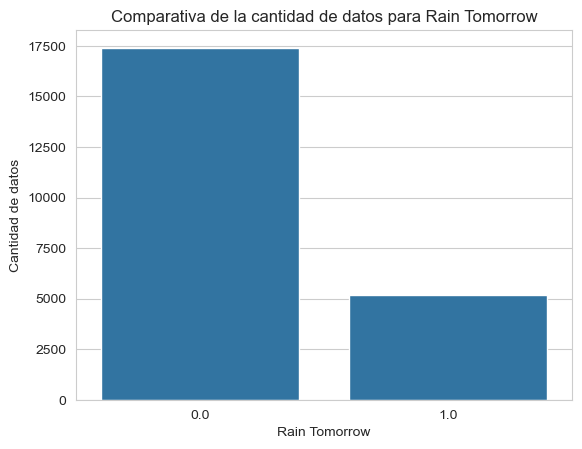

In [138]:
# Contar la cantidad de datos para cada valor en la columna "RainTomorrow"
conteo = df['RainTomorrow'].value_counts()

# Crear el gráfico de barras usando Seaborn
sns.barplot(x=conteo.index, y=conteo.values)

# Agregar etiquetas y título al gráfico
plt.xlabel('Rain Tomorrow')
plt.ylabel('Cantidad de datos')
plt.title('Comparativa de la cantidad de datos para Rain Tomorrow')

# Mostrar el gráfico
plt.show()

El conjunto de datos muestra un desbalanceo, ya que la mayoría de los registros corresponden a días con condiciones climáticas sin precipitaciones.
En cierto modo se podria decir que el dataset podria predecir cuando no va a llover con mejor probabilidad que cuando va a llover. 

En problemas de clasificación este problema se puede solucionar considerando el balanceo de las clases, pero por otro lado podría llegar a obviarse si la clase minoritaria no es importante en el contexto del problema (Ej: no confirma un hecho importante).

Cuando se llegue a la parte de clasificación, se estudiara el caso sin balancear y balanceando las clases.

### ESTANDARIZACION

Se realiza para poder ver la influencia de los distintos coeficientes, ya que las variables con mayores valores pueden resultar con coeficientes de valores extremos, por lo tanto en la interpretación del modelo resultante puede darse un sesgo en la importancia de los coeficientes en la predicción.

In [139]:
# Filtramos para quedarnos con las columnas numéricas
dfn = train_df[train_df.drop(['RainToday', 'RainTomorrow', 'RainfallTomorrow'], axis=1).describe().columns].copy()

In [140]:
# Usamos la media y el desvio estandar

train_df[dfn.columns] = (train_df[dfn.columns] - dfn.mean())/dfn.std()

test_df[dfn.columns] = (test_df[dfn.columns] - dfn.mean())/dfn.std()

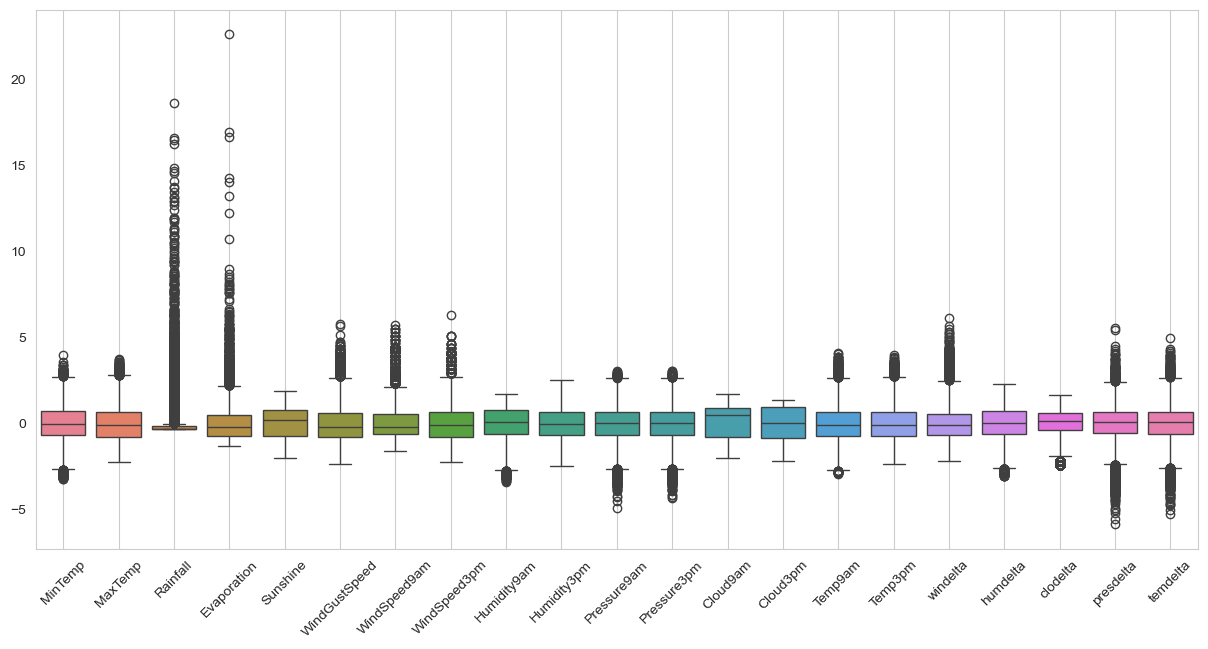

In [141]:
plt.figure(figsize=(15,7))
ax = sns.boxplot(data=train_df[dfn.describe().columns])

ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.grid()
plt.show()

In [142]:
train_df

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
45588          Canberra  0.192164  1.521874 -0.315477     1.005670  1.009227   
45599          Canberra  0.350276  0.039865 -0.283814     0.506352 -1.371444   
65054  MelbourneAirport -0.563260 -1.516993 -0.315477    -0.214885 -1.858399   
48918          Canberra  0.262436  1.192539 -0.315477     0.062514  0.414059   
34124     SydneyAirport -0.247036 -0.978080 -0.315477    -0.436804  0.792802   
...                 ...       ...       ...       ...          ...       ...   
69479         Melbourne  0.859748  0.638657 -0.315477     0.062514 -1.560815   
68377         Melbourne  0.086756  0.339261 -0.315477     0.173473  0.792802   
68342         Melbourne  0.315140 -0.214621 -0.315477    -0.714203 -1.425550   
69845         Melbourne  0.859748  0.638657 -0.315477     0.173473  1.604394   
97704          Adelaide -0.422716 -0.963111 -0.315477    -0.991602 -0.776276   

      WindGustDir  WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  \
45588           E       0.307060         SE        WSW     -0.854623   
45599         ENE      -0.197144          E          E      0.518977   
65054         NNW       2.179821          N          N      2.315224   
48918         WNW       1.243441         SE         NW     -1.594254   
34124           S       0.595177        WSW          S      0.201992   
...           ...            ...        ...        ...           ...   
69479           W      -0.197144        WSW          S      1.152947   
68377          NW      -0.773378        NNE          N     -0.960285   
68342          NW      -0.629320        NNE        NNW     -0.854623   
69845         SSE      -0.629320        SSE        SSE     -0.643300   
97704         NNW      -0.341203        NNE         NW     -0.431977   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
45588     -1.234551     0.069527    -1.425844    -0.045891    -0.464011   
45599     -0.337629     0.069527     0.231104     0.377131     0.344261   
65054      1.119869     0.229616     1.436157    -0.673602    -0.742726   
48918      1.119869     1.617053    -0.220791    -0.318809    -0.770597   
34124      1.119869    -0.730917     0.733209     0.745570     1.041048   
...             ...          ...          ...          ...          ...   
69479      0.447178    -0.464103    -0.195686    -0.543966    -0.505818   
68377     -0.786090    -0.624191    -0.522054     0.813799     0.539361   
68342     -1.010320     0.336342     0.482157    -0.646310    -0.742726   
69845     -0.113398    -0.464103    -0.195686    -0.543966    -0.505818   
97704     -0.001283     0.763246     0.482157    -0.755477    -0.686983   

       Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  \
45588 -2.023992 -0.869513  0.633035  1.575387        0.0           0.0   
45599  0.861608  0.926858  0.175810  0.118082        0.0           0.0   
65054  0.861608  0.926858 -0.879326 -1.477283        0.0           0.0   
48918 -0.375078 -0.420421  0.087882  1.253246        0.0           0.0   
34124 -1.611763 -0.869513 -0.246245 -0.955721        0.0           0.0   
...         ...       ...       ...       ...        ...           ...   
69479  0.037151 -0.869513  0.553900  0.562944        0.0           0.0   
68377 -1.611763  0.926858  0.105467  0.148762        0.0           0.0   
68342  0.861608  0.477765 -0.000046 -0.050658        0.0           0.0   
69845  0.037151 -0.869513  0.553900  0.562944        0.0           0.0   
97704  0.449379  0.477765 -0.879326 -0.786981        0.0           0.0   

       RainfallTomorrow month  windelta  humdelta  clodelta  presdelta  \
45588               0.0    11 -1.191498 -0.765674 -1.662692   1.443235   
45599               0.0    11  0.118147  0.167181  1.124938   0.141492   
65054               0.4    07  1.989068  0.930427  1.124938   0.189704   
48918               0.4    03 -0.318402  0.732548 -0.142166   1.539660   
34124               0.0    09

In [143]:
categorias = ['Location', 'month', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

def add_prefix(column_name, prefix):
    return prefix + '_' + column_name

# Convertir las columnas especificadas en variables dummy
train_df = pd.get_dummies(train_df, columns = categorias, prefix = ["dy_"+ i for i in categorias], dtype = int)

test_df = pd.get_dummies(test_df, columns = categorias, prefix = ["dy_"+ i for i in categorias], dtype = int)
# Mostrar las primeras filas del DataFrame resultante
train_df

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
45588  0.192164  1.521874 -0.315477     1.005670  1.009227       0.307060   
45599  0.350276  0.039865 -0.283814     0.506352 -1.371444      -0.197144   
65054 -0.563260 -1.516993 -0.315477    -0.214885 -1.858399       2.179821   
48918  0.262436  1.192539 -0.315477     0.062514  0.414059       1.243441   
34124 -0.247036 -0.978080 -0.315477    -0.436804  0.792802       0.595177   
...         ...       ...       ...          ...       ...            ...   
69479  0.859748  0.638657 -0.315477     0.062514 -1.560815      -0.197144   
68377  0.086756  0.339261 -0.315477     0.173473  0.792802      -0.773378   
68342  0.315140 -0.214621 -0.315477    -0.714203 -1.425550      -0.629320   
69845  0.859748  0.638657 -0.315477     0.173473  1.604394      -0.629320   
97704 -0.422716 -0.963111 -0.315477    -0.991602 -0.776276      -0.341203   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
45588     -0.854623     -1.234551     0.069527    -1.425844    -0.045891   
45599      0.518977     -0.337629     0.069527     0.231104     0.377131   
65054      2.315224      1.119869     0.229616     1.436157    -0.673602   
48918     -1.594254      1.119869     1.617053    -0.220791    -0.318809   
34124      0.201992      1.119869    -0.730917     0.733209     0.745570   
...             ...           ...          ...          ...          ...   
69479      1.152947      0.447178    -0.464103    -0.195686    -0.543966   
68377     -0.960285     -0.786090    -0.624191    -0.522054     0.813799   
68342     -0.854623     -1.010320     0.336342     0.482157    -0.646310   
69845     -0.643300     -0.113398    -0.464103    -0.195686    -0.543966   
97704     -0.431977     -0.001283     0.763246     0.482157    -0.755477   

       Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  \
45588    -0.464011 -2.023992 -0.869513  0.633035  1.575387        0.0   
45599     0.344261  0.861608  0.926858  0.175810  0.118082        0.0   
65054    -0.742726  0.861608  0.926858 -0.879326 -1.477283        0.0   
48918    -0.770597 -0.375078 -0.420421  0.087882  1.253246        0.0   
34124     1.041048 -1.611763 -0.869513 -0.246245 -0.955721        0.0   
...            ...       ...       ...       ...       ...        ...   
69479    -0.505818  0.037151 -0.869513  0.553900  0.562944        0.0   
68377     0.539361 -1.611763  0.926858  0.105467  0.148762        0.0   
68342    -0.742726  0.861608  0.477765 -0.000046 -0.050658        0.0   
69845    -0.505818  0.037151 -0.869513  0.553900  0.562944        0.0   
97704    -0.686983  0.449379  0.477765 -0.879326 -0.786981        0.0   

       RainTomorrow  RainfallTomorrow  windelta  humdelta  clodelta  \
45588           0.0               0.0 -1.191498 -0.765674 -1.662692   
45599           0.0               0.0  0.118147  0.167181  1.124938   
65054           0.0               0.4  1.989068  0.930427  1.124938   
48918           0.0               0.4 -0.318402  0.732548 -0.142166   
34124           0.0               0.0  0.741787  0.025840 -1.409271   
...             ...               ...       ...       ...       ...   
69479           0.0               0.0  0.928880 -0.369917 -0.395587   
68377           0.0               0.0 -1.004406 -0.624332 -0.395587   
68342           0.0               0.0 -1.066770  0.449865  0.111255   
69845           0.0               0.0 -0.443130 -0.369917 -0.395587   
97704           0.0               0.6 -0.256037  0.676012  0.618097   

       presdelta  temdelta  dy_Location_Adelaide  dy_Location_Canberra  \
45588   1.443235 -1.948251                     0                     1   
45599   0.141492  0.066678                     0                     1   
65054   0.189704  1.351560                     0                     0   
48918   1.539660 -2.240270                     0                     1   
34124  -0.967401  1.409964                     0                     0

In [144]:
cols_corr = train_df.drop(train_df.columns[(train_df.nunique() == 2) | train_df.columns.str.startswith('dy_')], axis=1).columns

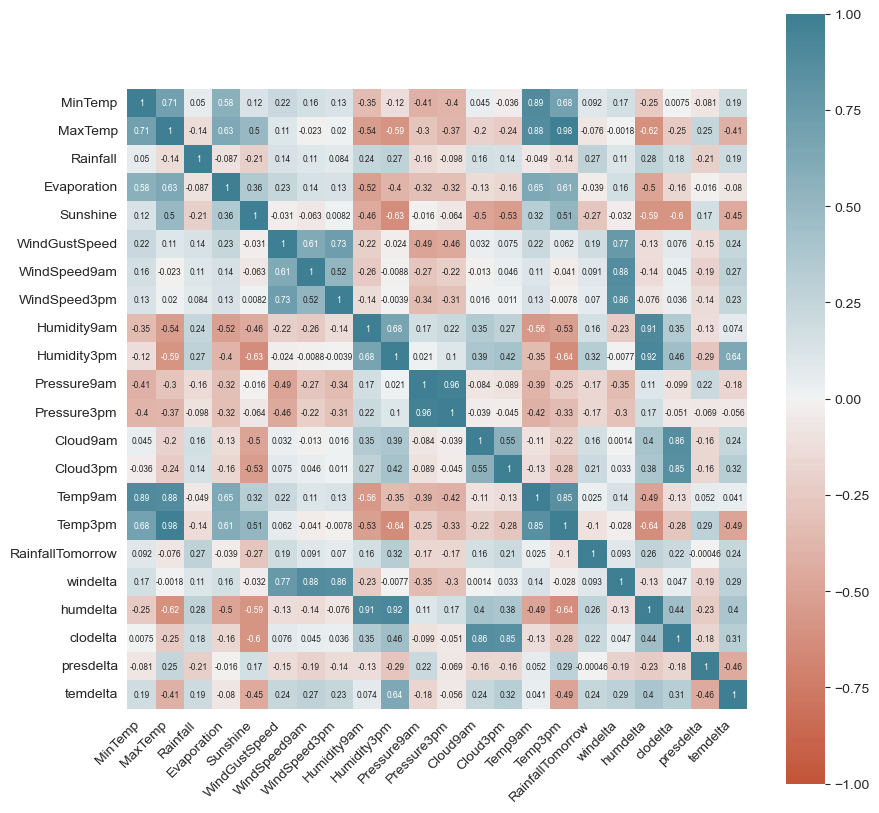

In [145]:
corr = train_df[cols_corr].corr()
plt.figure(figsize=(10, 10))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

## MODELADO: REGRESION LINEAL - REGULARIZACION - METRICAS

Dropeamos la target y RainTomorrow para evitar fuga de datos.

In [147]:
cols_drop = ['RainfallTomorrow', 'RainTomorrow']

# Dropear las columnas especificadas
x_train = train_df.drop(columns = cols_drop)

y_train = train_df['RainfallTomorrow']

x_test = test_df.drop(columns = cols_drop)

y_test = test_df['RainfallTomorrow']

### REGRESION LINEAL

In [68]:
# Crear y ajustar el modelo de regresión lineal
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [69]:
y_pred = reg.predict(x_test)

In [70]:
reg.coef_, reg.intercept_

(array([-5.72251507e-01,  7.29614652e-01,  1.00597127e+00,  6.57804621e-02,
        -7.14264492e-01,  1.42137918e+00, -4.71861806e-01, -1.05838594e+00,
        -6.89568634e-01,  1.89237674e+00, -8.81271749e-01,  2.93633199e-01,
        -2.85225576e-04,  3.16706027e-01,  4.89496837e-01, -4.39080633e-01,
         1.59095172e-01,  9.19297596e-01,  9.14041013e-01, -1.28515796e-01,
         1.12746751e+00, -2.21479465e-01, -1.60399726e+12, -1.60399726e+12,
        -1.60399726e+12, -1.60399726e+12, -1.60399726e+12, -1.60399726e+12,
        -1.60399726e+12, -1.60399726e+12, -1.60399726e+12,  4.83903401e+11,
         4.83903401e+11,  4.83903401e+11,  4.83903401e+11,  4.83903401e+11,
         4.83903401e+11,  4.83903401e+11,  4.83903401e+11,  4.83903401e+11,
         4.83903401e+11,  4.83903401e+11,  4.83903401e+11, -5.50232143e+11,
        -5.50232143e+11, -5.50232143e+11, -5.50232143e+11, -5.50232143e+11,
        -5.50232143e+11, -5.50232143e+11, -5.50232143e+11, -5.50232143e+11,
        -5.5

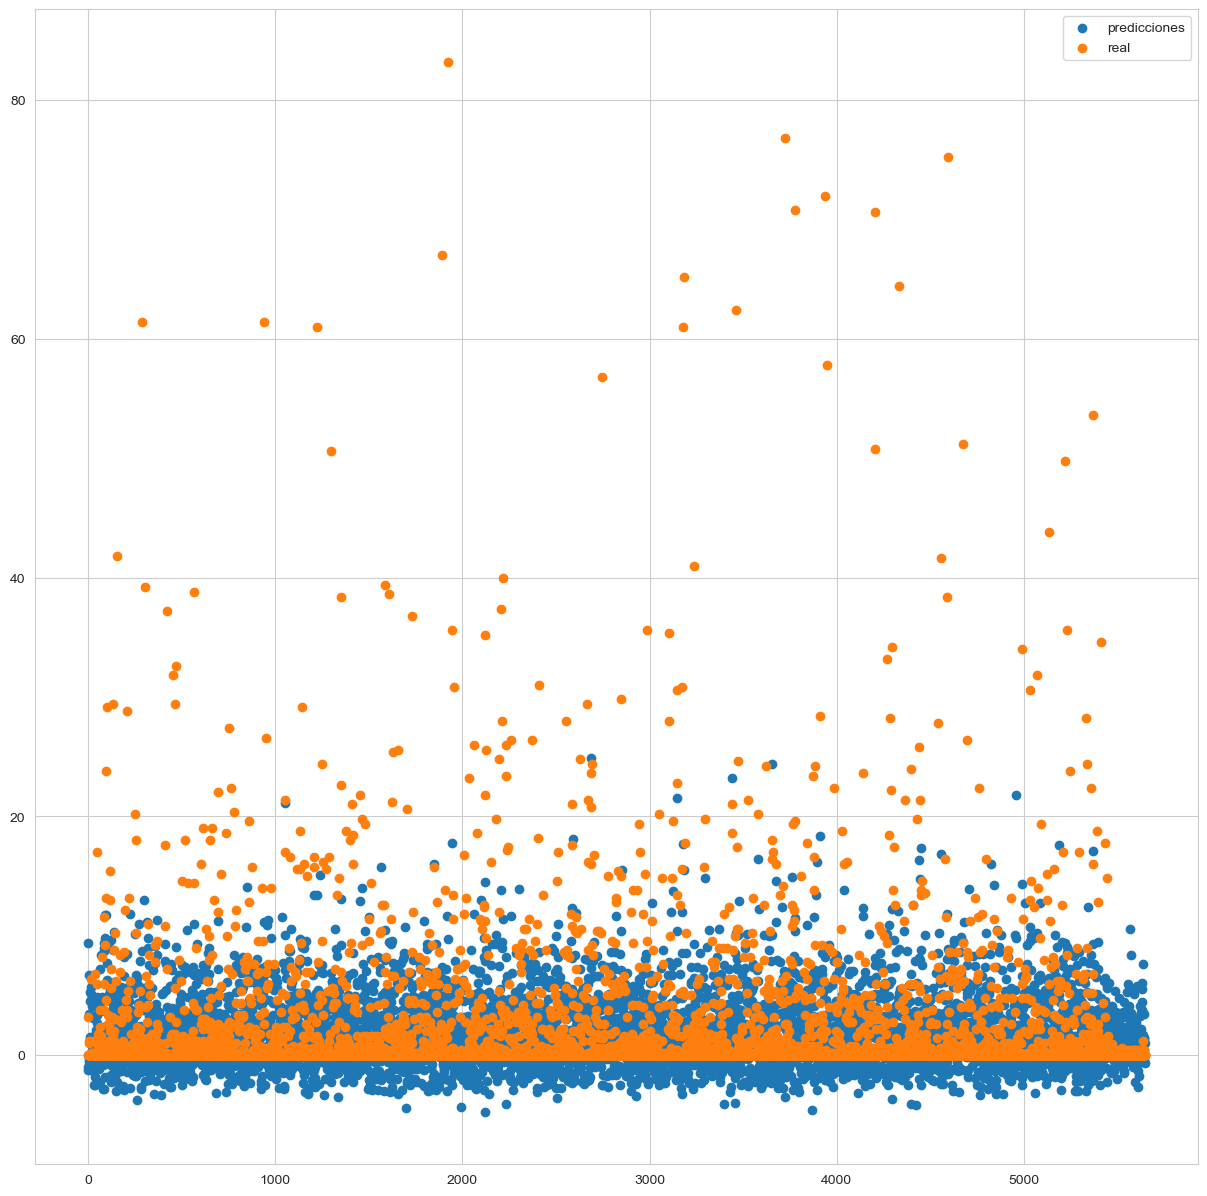

In [71]:
plt.figure(figsize=(15, 15))
x=range(len(y_test))
plt.scatter(x, y=y_pred, label='predicciones')
plt.scatter(x, y=y_test, label='real')
plt.legend()
plt.show()

In [72]:
# Calcular métricas de evaluación

mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse.round(4))

mae=mean_absolute_error(y_test, y_pred)
print("MAE:",mae.round(4))

reg.score(x_train,y_train), reg.score(x_test,y_test)
print(f"El R² para los datos de entrenamiento es: {reg.score(x_train,y_train).round(4)} y para los de testeo: {reg.score(x_test,y_test)}")

mape = (mae / (y_test)).mean() * 100
print("MAPE:",mape.round(4))


Error cuadrático medio: 29.006
MAE: 2.6866
El R² para los datos de entrenamiento es: 0.2415 y para los de testeo: 0.20814587094472325
MAPE: inf


### METODOS DE REGULARIZACION

In [73]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

**RIDGE**

In [74]:
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [75]:
y_pred_re = ridge.predict(x_test)

mae_rg = mean_absolute_error(y_test, y_pred_re)
mse_rg = mean_squared_error(y_test, y_pred_re)
rmse_rg = np.sqrt(mse_rg)
mape_rg = (mae_rg / y_test).mean() * 100

print("MAE:", mae_rg.round(4))
print("MSE:", mse_rg.round(4))
print("RMSE:",rmse_rg.round(4))
print("MAPE:",mape_rg.round(4))

print("El R² para los datos de entrenamiento es:", ridge.score(x_train, y_train).round(4), "El R² para los datos de test es:", ridge.score(x_test,y_test).round(4))

MAE: 2.6865
MSE: 29.0055
RMSE: 5.3857
MAPE: inf


El R² para los datos de entrenamiento es: 0.2415 El R² para los datos de test es: 0.2082


**LASSO**

In [76]:
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [77]:
y_pred_lo = lasso.predict(x_test)

mae_ls = mean_absolute_error(y_test, y_pred_lo)
mse_ls = mean_squared_error(y_test, y_pred_lo)
rmse_ls = np.sqrt(mse_ls)
mape_ls = (mae_ls / y_test).mean() * 100

print("MAE:", mae_ls.round(4))
print("MSE:", mse_ls.round(4))
print("RMSE:",rmse_ls.round(4))
print("MAPE:",mape_ls.round(4))
print("El R² para los datos de entrenamiento es:", lasso.score(x_train, y_train).round(4), "El R² para los datos de test es:", lasso.score(x_test,y_test).round(4))

MAE: 2.6062
MSE: 29.5639
RMSE: 5.4373
MAPE: inf
El R² para los datos de entrenamiento es: 0.219 El R² para los datos de test es: 0.1929


**ELASTICNET**

In [78]:
elasticnet.fit(x_train, y_train)

ElasticNet(alpha=0.1)

In [79]:
y_pred_et = elasticnet.predict(x_test)

mae_et = mean_absolute_error(y_test, y_pred_et)
mse_et = mean_squared_error(y_test, y_pred_et)
rmse_et = np.sqrt(mse_et)
mape_et = (mae_et / y_test).mean() * 100

print("MAE:", mae_et.round(4))
print("MSE:", mse_et.round(4))
print("RMSE:",rmse_et.round(4))
print("MAPE:",mape_et.round(4))
print("El R² para los datos de entrenamiento es:", elasticnet.score(x_train, y_train).round(4), "El R² para los datos de test es:", elasticnet.score(x_test,y_test).round(4))

MAE: 2.5899
MSE: 29.4283
RMSE: 5.4248
MAPE: inf
El R² para los datos de entrenamiento es: 0.2231 El R² para los datos de test es: 0.1966


### GRADIENTE DESCENDIENTE

In [80]:
def gradient_descent(X_train, y_train, X_test, y_test, lr=0.01, epochs=100):
    """
    shapes:
        X_train = nxm
        y_train = nx1
        X_test = pxm
        y_test = px1
        W = mx1
    """
    n = X_train.shape[0]
    m = X_train.shape[1]
    
    o = X_test.shape[0]

    # Poner columna de unos a las matrices X
    X_train = np.hstack((np.ones((n, 1)), X_train))
    X_test = np.hstack((np.ones((o, 1)), X_test))
    

    # Inicializar pesos aleatorios
    W = np.random.randn(m+1).reshape(m+1, 1)

    train_errors = []  # Para almacenar el error de entrenamiento en cada época
    test_errors = []   # Para almacenar el error de prueba en cada época

    for i in range(epochs):
        # Calcular predicción y error de entrenamiento
        prediction_train = np.matmul(X_train, W) 
        error_train = y_train - prediction_train  
        #print(error_train)
        train_mse = np.mean(error_train ** 2)
        train_errors.append(train_mse)

        # Calcular predicción y error de prueba
        prediction_test = np.matmul(X_test, W) 
        error_test = y_test - prediction_test 
        test_mse = np.mean(error_test ** 2)
        test_errors.append(test_mse)

        # Calcular el gradiente y actualizar pesos
        grad_sum = np.sum(error_train * X_train, axis=0)
        grad_mul = -2/n * grad_sum  # 1xm
        gradient = np.transpose(grad_mul).reshape(-1, 1)  # mx1

        W = W - (lr * gradient)

    # Graficar errores de entrenamiento y prueba
    # Definir una figura
    plt.figure(figsize=(12, 6))
    # Plotear errores de entrenamiento
    plt.plot(train_errors, label='Error de entrenamiento')
    # Plotear errores de prueba
    plt.plot(test_errors, label='Error de test')
    # Poner labels en los ejes
    plt.xlabel('Época')
    plt.ylabel('Error cuadrático medio')
    # Activar la leyenda
    plt.legend()
    # Poner titulo
    plt.title('Error de entrenamiento y prueba vs iteraciones (GD)')
    # Terminar y mostrar gráfico
    plt.show()

    return W, X_train, X_test

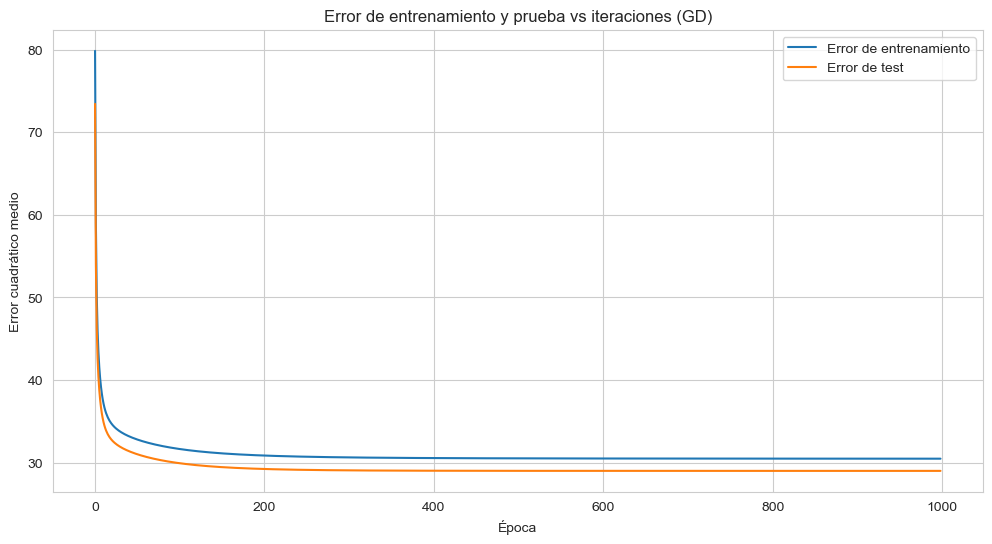

In [81]:
w, x_train, x_test = gradient_descent(x_train, y_train.values.reshape(-1,1), x_test, y_test.values.reshape(-1,1), lr=0.05, epochs=999)

In [82]:
# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred_dg = x_train.dot(w)
y_test_pred_dg = x_test.dot(w)

# Calcular R2 Score
r2_train = r2_score(y_train, y_train_pred_dg)
r2_test = r2_score(y_test, y_test_pred_dg)

# Calcular MSE
mse_train = mean_squared_error(y_train, y_train_pred_dg)
mse_test = mean_squared_error(y_test, y_test_pred_dg)

# Calcular RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calcular MAE
mae_train = mean_absolute_error(y_train, y_train_pred_dg)
mae_test = mean_absolute_error(y_test, y_test_pred_dg)

# Calcular MAPE
mape_train = np.mean(np.abs((y_train.values.reshape(-1,1) - y_train_pred_dg) / y_train.values.reshape(-1,1))) * 100
mape_test = np.mean(np.abs((y_test.values.reshape(-1,1) - y_test_pred_dg) / y_test.values.reshape(-1,1))) * 100

# Imprimir las métricas
print(f'R2 Score en entrenamiento: {r2_train.round(4)}, en prueba: {r2_test.round(4)}')
print(f'MSE en entrenamiento: {mse_train.round(4)}, en prueba: {mse_test.round(4)}')
print(f'RMSE en entrenamiento: {rmse_train.round(4)}, en prueba: {rmse_test.round(4)}')
print(f'MAE en entrenamiento: {mae_train.round(4)}, en prueba: {mae_test.round(4)}')
print(f'MAPE en entrenamiento: {mape_train.round(4)}%, en prueba: {mape_test.round(4)}%')

R2 Score en entrenamiento: 0.2413, en prueba: 0.2081
MSE en entrenamiento: 30.4828, en prueba: 29.0063
RMSE en entrenamiento: 5.5211, en prueba: 5.3857
MAE en entrenamiento: 2.6419, en prueba: 2.6868
MAPE en entrenamiento: inf%, en prueba: inf%


## OBSERVACIONES: REGRESION LINEAL - REGULARIZACION - METRICAS

No se observo un cambio notable en el R2 respecto al modelo de regresión lineal en la regularización.

Respecto al fitting obtenido, en ambos; podría considerarse que es bajo, pero respecto al fenómeno en estudio, el valor dentro de todo podría ser bueno.

Al calcular métricas en ambos conjuntos, podemos comparar el rendimiento del modelo en ellos. Si el rendimiento en el conjunto de entrenamiento es significativamente mejor que en el conjunto de prueba, es una señal de posible sobreajuste. Esto indica que el modelo puede estar memorizando los datos de entrenamiento en lugar de aprender patrones generales que se pueden aplicar a datos nuevos.

En nuestro caso en el TEST el R2 dio un valor un poco mayor con respecto al TRAIN, lo que muestra que no hay un overfitting.

## MODELADO: REGRESION LOGISTICA - METRICAS

### COMPORTAMIENTO CON LAS DOS VARIABLES MAS CORRELACIONADAS

Observaremos como se comporta la distribución de datos del **RainTomorrow** con las dos variables de mayor correlación; esto se hace con el fin de observar que tambien se separan los datos de ambas clases y se toma las de mayor correlación debido a que la regresión logistica esta en función de una regresión lineal despues de todo.

In [83]:
train_df

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
45588  0.192164  1.521874 -0.315477     1.005670  1.009227       0.307060   
45599  0.350276  0.039865 -0.283814     0.506352 -1.371444      -0.197144   
65054 -0.563260 -1.516993 -0.315477    -0.214885 -1.858399       2.179821   
48918  0.262436  1.192539 -0.315477     0.062514  0.414059       1.243441   
34124 -0.247036 -0.978080 -0.315477    -0.436804  0.792802       0.595177   
...         ...       ...       ...          ...       ...            ...   
69479  0.859748  0.638657 -0.315477     0.062514 -1.560815      -0.197144   
68377  0.086756  0.339261 -0.315477     0.173473  0.792802      -0.773378   
68342  0.315140 -0.214621 -0.315477    -0.714203 -1.425550      -0.629320   
69845  0.859748  0.638657 -0.315477     0.173473  1.604394      -0.629320   
97704 -0.422716 -0.963111 -0.315477    -0.991602 -0.776276      -0.341203   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
45588     -0.854623     -1.234551     0.069527    -1.425844    -0.045891   
45599      0.518977     -0.337629     0.069527     0.231104     0.377131   
65054      2.315224      1.119869     0.229616     1.436157    -0.673602   
48918     -1.594254      1.119869     1.617053    -0.220791    -0.318809   
34124      0.201992      1.119869    -0.730917     0.733209     0.745570   
...             ...           ...          ...          ...          ...   
69479      1.152947      0.447178    -0.464103    -0.195686    -0.543966   
68377     -0.960285     -0.786090    -0.624191    -0.522054     0.813799   
68342     -0.854623     -1.010320     0.336342     0.482157    -0.646310   
69845     -0.643300     -0.113398    -0.464103    -0.195686    -0.543966   
97704     -0.431977     -0.001283     0.763246     0.482157    -0.755477   

       Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  \
45588    -0.464011 -2.023992 -0.869513  0.633035  1.575387        0.0   
45599     0.344261  0.861608  0.926858  0.175810  0.118082        0.0   
65054    -0.742726  0.861608  0.926858 -0.879326 -1.477283        0.0   
48918    -0.770597 -0.375078 -0.420421  0.087882  1.253246        0.0   
34124     1.041048 -1.611763 -0.869513 -0.246245 -0.955721        0.0   
...            ...       ...       ...       ...       ...        ...   
69479    -0.505818  0.037151 -0.869513  0.553900  0.562944        0.0   
68377     0.539361 -1.611763  0.926858  0.105467  0.148762        0.0   
68342    -0.742726  0.861608  0.477765 -0.000046 -0.050658        0.0   
69845    -0.505818  0.037151 -0.869513  0.553900  0.562944        0.0   
97704    -0.686983  0.449379  0.477765 -0.879326 -0.786981        0.0   

       RainTomorrow  RainfallTomorrow  windelta  humdelta  clodelta  \
45588           0.0               0.0 -1.191498 -0.765674 -1.662692   
45599           0.0               0.0  0.118147  0.167181  1.124938   
65054           0.0               0.4  1.989068  0.930427  1.124938   
48918           0.0               0.4 -0.318402  0.732548 -0.142166   
34124           0.0               0.0  0.741787  0.025840 -1.409271   
...             ...               ...       ...       ...       ...   
69479           0.0               0.0  0.928880 -0.369917 -0.395587   
68377           0.0               0.0 -1.004406 -0.624332 -0.395587   
68342           0.0               0.0 -1.066770  0.449865  0.111255   
69845           0.0               0.0 -0.443130 -0.369917 -0.395587   
97704           0.0               0.6 -0.256037  0.676012  0.618097   

       presdelta  temdelta  dy_Location_Adelaide  dy_Location_Canberra  \
45588   1.443235 -1.948251                     0                     1   
45599   0.141492  0.066678                     0                     1   
65054   0.189704  1.351560                     0                     0   
48918   1.539660 -2.240270                     0                     1   
34124  -0.967401  1.409964                     0                     0

In [84]:
cols_corrlog = train_df.drop(train_df.columns[train_df.columns.str.startswith('dy_')], axis=1).columns

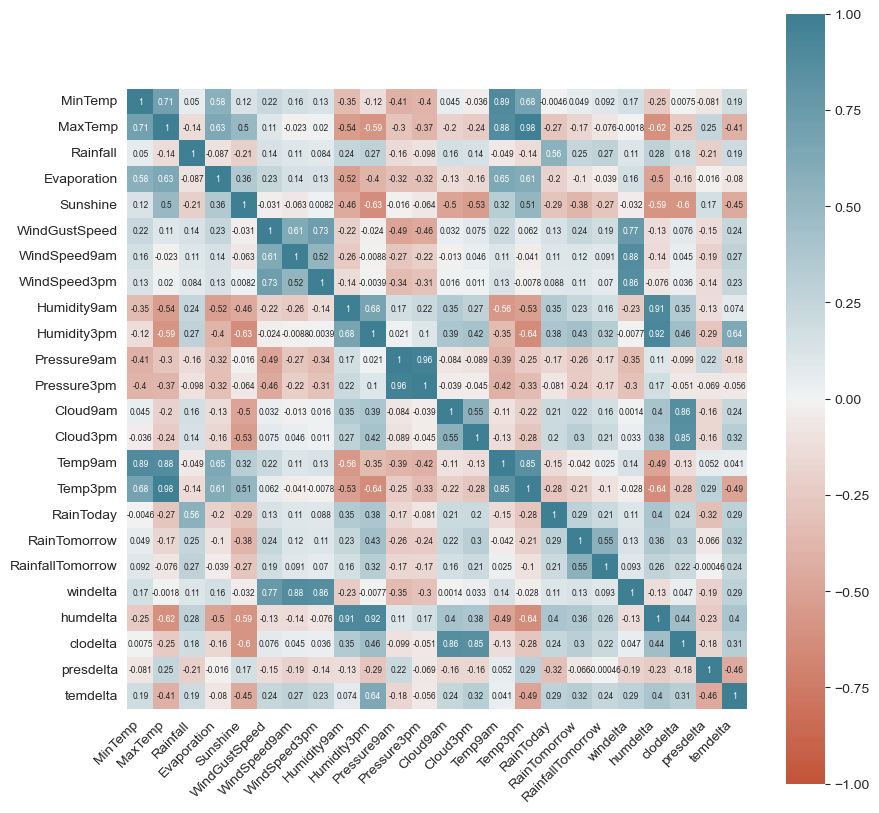

In [85]:
corr = train_df[cols_corrlog].corr()
plt.figure(figsize=(10, 10))

ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Las dos de mayor correlación son: Humidity3pm - Sunshine

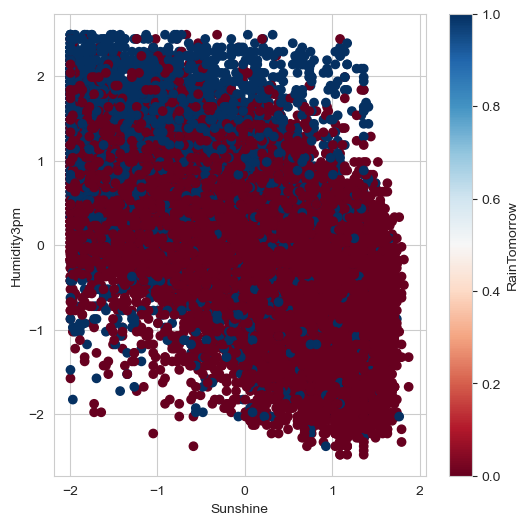

In [86]:
plt.figure(figsize=(6, 6))
sc = plt.scatter(train_df.Sunshine, train_df.Humidity3pm, c=train_df.RainTomorrow, cmap=plt.cm.RdBu, marker='o')

# Agregar una barra de colores como leyenda
plt.colorbar(sc, label='RainTomorrow')

plt.xlabel('Sunshine')
plt.ylabel('Humidity3pm')
plt.show()


Dado que hay mucha superposición y abundancia de datos, se desacoplara en las dos clases y aplicaremos la densidad de datos para ver donde esta mas concentrado los datos.

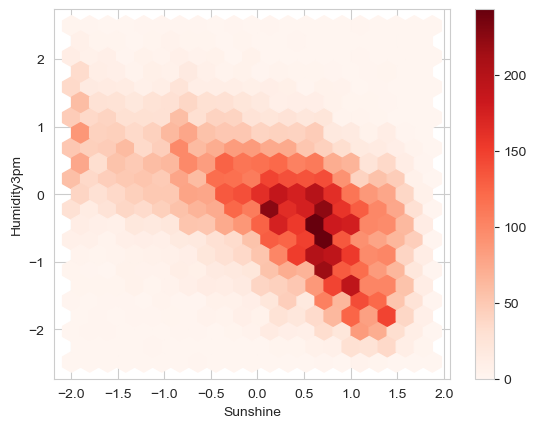

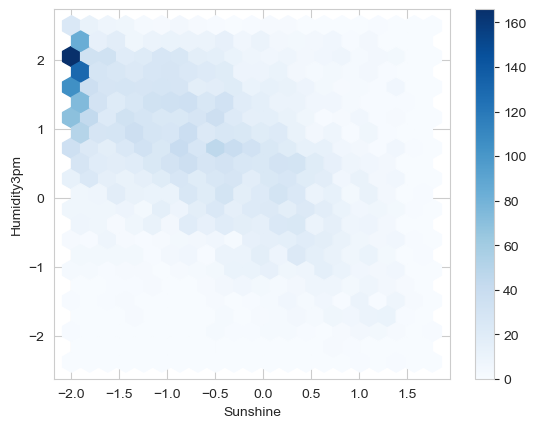

In [87]:
train_df[train_df['RainTomorrow'] == 0].plot(kind = 'hexbin', x ='Sunshine', y = 'Humidity3pm', gridsize=20, cmap='Reds')

train_df[train_df['RainTomorrow'] == 1].plot(kind = 'hexbin', x ='Sunshine', y = 'Humidity3pm', gridsize=20, cmap='Blues')

plt.show()

Se puede observar que hay una segregación de datos en dos puntos que no se superponen, lo que implica probablemente que durante la regresión logistica se logre alcanzar buenas metricas, pero recordar que el datasets por ahora se encuentra desbalanceado; esta predominando la mayoritaria. Aún así, si se aplica una técnica que conserve esa concentración de puntos entonces también vale para un dataset que se balanceo.

### TRAIN - TEST

Dropeamos la target y RainfallTomorrow para evitar fuga de datos.

In [88]:
cols_drop = ['RainfallTomorrow', 'RainTomorrow']

# Dropear las columnas especificadas
x_trainlg = train_df.drop(columns = cols_drop)

y_trainlg = train_df['RainTomorrow']

x_testlg = test_df.drop(columns = cols_drop)

y_testlg = test_df['RainTomorrow']

### REGRESION LOGISTICA - METRICAS

**Modelo No Balanceado**

In [89]:
# Inicializar y entrenar un modelo de regresión logística
model_lg = LogisticRegression(random_state=33)
model_lg.fit(x_trainlg, y_trainlg)

# Realizar predicciones en el conjunto de prueba
y_predlg = model_lg.predict(x_testlg)

In [90]:
# Obtengo las probabilidades de predicción del model_lg
y_probs = model_lg.predict_proba(x_testlg)[:, 1]

# Calculo la ROC y el AUC - Test
fpr, tpr, thresholds = roc_curve(y_testlg, y_probs)
roc_auc = auc(fpr, tpr)

# Calculo la ROC y el AUC - Train
y_probs_train = model_lg.predict_proba(x_trainlg)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_trainlg, y_probs_train)
roc_auc_train = auc(fpr_train, tpr_train)

**Curva ROC**

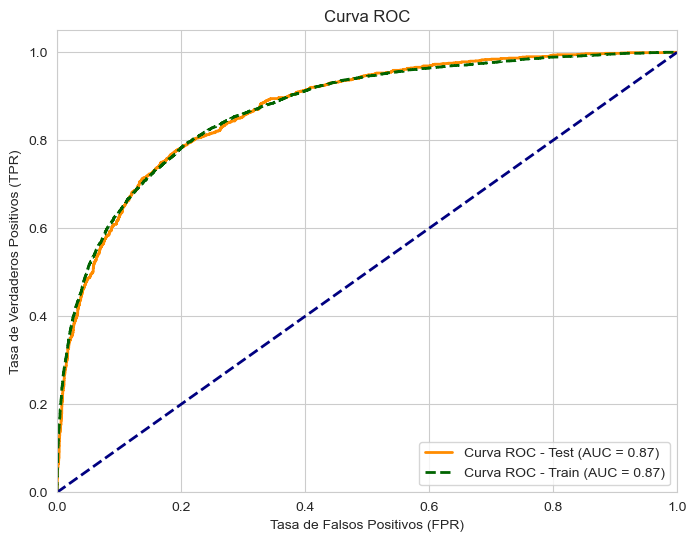

In [91]:
# Grafico la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC - Test (AUC = %0.2f)' % roc_auc)

plt.plot(fpr_train, tpr_train, color='darkgreen', lw=2, label='Curva ROC - Train (AUC = %0.2f)' % roc_auc_train, linestyle='--')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Se observa curvas notoria que se aproximan al punto ideal (0,1); por otro lado se observa que ambas curvas no difieren mucho por lo que permite caractizar el modelo como robusto, su entrenamiento puede considerarse que esta libre de overfitting.

**Area Under Curve**

Mientras más cercano esté a 1, mas clasificaciones correctas habra hecho, lo que implica graficamente que la curva ROC está más cerca de contener al punto (0,1) 

Si es 0.5, el modelo es tan malo como predecir aleatoriamente.


In [92]:
auc_score_log = roc_auc_score(y_testlg, y_probs)
print("AUC (Área bajo la Curva ROC):", auc_score_log.round(4))

AUC (Área bajo la Curva ROC): 0.8727


**Accuracy**

Representa la cantidad de aciertos del modelo respecto del total de datos.

Es una buena métrica para problemas cuyos dataset están balanceados.

In [93]:
acc_log = accuracy_score(y_testlg, y_predlg)
print("Precisión del modelo:", acc_log.round(4))

Precisión del modelo: 0.844


Con la metrica de accuracy vamos a medir los modelos de clasificacion para determinar cual es el mejor.

**Recall**

Representa, dentro de la misma clase, cuántas fueron correctamente clasificadas.

In [94]:
recallp_log = recall_score(y_testlg, y_predlg,pos_label=1)
print("Recall del modelo para la clase positiva:", recallp_log.round(4))

Recall del modelo para la clase positiva: 0.5216


In [95]:
recalln_log = recall_score(y_testlg, y_predlg, pos_label=0)
print("Recall del modelo para la clase negativa:", recalln_log.round(4))

Recall del modelo para la clase negativa: 0.9398


**Precision**

De las clases que se han clasificado como positivas, indica cuántas realmente lo son.

In [96]:
precisionp_log = precision_score(y_testlg, y_predlg, pos_label=1)
print("Precisión para la clase positiva:", precisionp_log.round(4))

Precisión para la clase positiva: 0.7204


In [97]:
precisionn_log = precision_score(y_testlg, y_predlg, pos_label=0)
print("Precisión para la clase negativa:", precisionn_log.round(4))

Precisión para la clase negativa: 0.8686


**F1 Score**

Podría ser bueno considerar una métrica que tenga en cuenta tanto la precisión como el recall.

Se utiliza una media armónica: F1 = 2 * ((recall * precision)/(recall + precision))

In [98]:
f1p_log = f1_score(y_testlg, y_predlg, pos_label=1)
print("Puntaje F1 para la clase positiva:", f1p_log.round(4))

Puntaje F1 para la clase positiva: 0.6051


In [99]:
f1n_log = f1_score(y_testlg, y_predlg,pos_label=0)
print("Puntaje F1 para la clase negativa:", f1n_log.round(4))

Puntaje F1 para la clase negativa: 0.9028


En forma resumida

In [100]:
print(classification_report(y_testlg, y_predlg))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      4353
         1.0       0.72      0.52      0.61      1294

    accuracy                           0.84      5647
   macro avg       0.79      0.73      0.75      5647
weighted avg       0.83      0.84      0.83      5647



En resumen se puede decir que sin balanceo, se puede llegar a buenas metricas para la clase mayoritaria pero para la otra clase el modelo esta sesgado. El modelo estaria mas caracterizado para predecir si "no llueve" a que si "llueve".

**Entropía cruzada (Cross-Entropy)**

Es útil para medir la discrepancia entre la distribución de probabilidad predicha por el modelo y la distribución real de las etiquetas. En el caso de la regresión logística, puede ser una métrica relevante para evaluar la calidad de las probabilidades predichas por el modelo.

La función de pérdida mide la discrepancia entre las distribuciones de probabilidad predichas y las distribuciones reales para un problema de clasificación binaria.
Un valor cercano a 0 implica un buen modelo, mientras mas se aleja el modelo es peor.

In [101]:
# Calcular la Entropía Cruzada (Cross-Entropy)
cross_entropy = log_loss(y_testlg, y_probs)
print("Entropía Cruzada (Cross-Entropy):", cross_entropy)

Entropía Cruzada (Cross-Entropy): 0.3567293180416994


**MATRIZ DE CONFUSION**

[[4091  262]
 [ 619  675]]


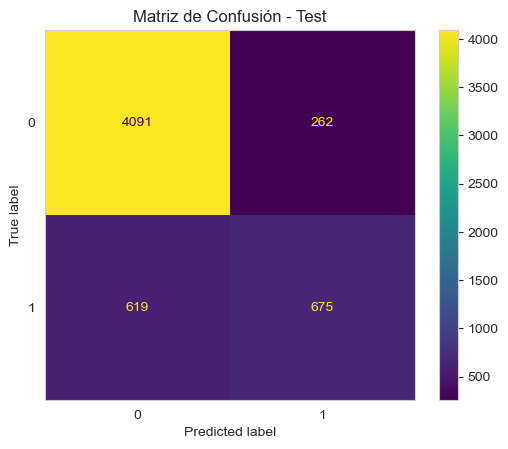

[[16429   979]
 [ 2430  2748]]


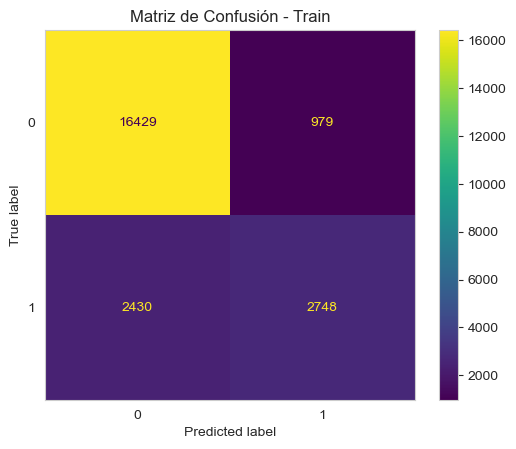

In [102]:
print(confusion_matrix(y_testlg, y_predlg))
cm = confusion_matrix(y_testlg, y_predlg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots()
disp.plot(ax=ax)
# Desactivar las líneas de la cuadrícula
ax.grid(False)
ax.set_title('Matriz de Confusión - Test')
plt.show()

y_predlg_train = model_lg.predict(x_trainlg)
print(confusion_matrix(y_trainlg, y_predlg_train))
cm_train = confusion_matrix(y_trainlg, y_predlg_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
fig, ax = plt.subplots()
disp.plot(ax=ax)
# Desactivar las líneas de la cuadrícula
ax.grid(False)
ax.set_title('Matriz de Confusión - Train')
plt.show()

En las dos matrices se puede observar como se mantiene la proporcionalidad de la cantidad de datos en cada bloque aproximadamente.

FN: Un falso negativo ocurre cuando el modelo predice que una instancia no pertenece a una clase positiva, pero en realidad sí pertenece a esa clase.

FP: Un falso positivo ocurre cuando el modelo predice que una instancia pertenece a una clase positiva, pero en realidad no pertenece a esa clase.

Falsos Negativos y Falsos Positivos: Se analizara la clase 1 ya que son los de menor valor respecto a la clase 0.

* Clase 1: Tiene un recall más bajo (0.53), lo que sugiere que hay un número significativo de falsos negativos. Esto significa que el modelo está fallando en identificar muchas instancias reales de clase 1.0.

* Clase 1: También tiene una precisión menor (0.74), lo que indica una cantidad considerable de falsos positivos. Esto significa que el modelo está etiquetando incorrectamente instancias de otras clases como 1.0.

**Modelo Balanceado**

In [103]:
# Inicializar y entrenar un modelo de regresión logística
# Se incorpora class_weight, este parámetro ajusta automáticamente los pesos inversamente proporcionales a las frecuencias de las clases en los datos de entrenamiento, 
# lo cual es útil cuando se tiene un conjunto de datos desequilibrado.

model_lgb = LogisticRegression(random_state=33, class_weight='balanced')
model_lgb.fit(x_trainlg, y_trainlg)

# Realizar predicciones en el conjunto de prueba
y_predlgb = model_lgb.predict(x_testlg)

# Obtengo las probabilidades de predicción del model_lgb
y_probsb = model_lgb.predict_proba(x_testlg)[:, 1]

# Calculo la ROC y el AUC - Test
fpr, tpr, thresholds = roc_curve(y_testlg, y_probsb)
roc_auc = auc(fpr, tpr)

# Calculo la ROC y el AUC - Train
y_probsb_train = model_lgb.predict_proba(x_trainlg)[:, 1]
fpr_train, tpr_train, thresholds_train = roc_curve(y_trainlg, y_probsb_train)
roc_auc_train = auc(fpr_train, tpr_train)


**Curva ROC**

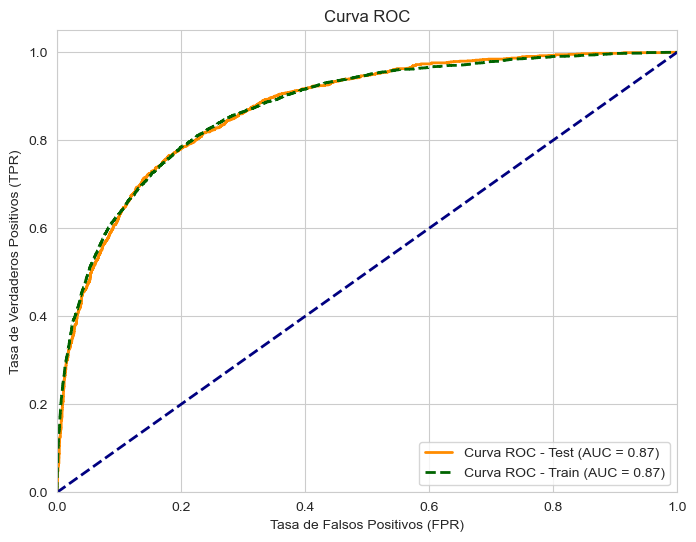

In [104]:
# Grafico la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC - Test (AUC = %0.2f)' % roc_auc)

plt.plot(fpr_train, tpr_train, color='darkgreen', lw=2, label='Curva ROC - Train (AUC = %0.2f)' % roc_auc_train, linestyle='--')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

Se observa curvas notoria que se aproximan al punto ideal (0,1); por otro lado se observa que ambas curvas no difieren mucho por lo que permite caracterizar el modelo como robusto, su entrenamiento puede considerarse que esta libre de overfitting. Comportamiento similar al caso del Modelo No Balanceado

**Area Under Curve**

In [105]:
auc_score_log = roc_auc_score(y_testlg, y_probsb)
print("AUC (Área bajo la Curva ROC):", auc_score_log.round(4))

AUC (Área bajo la Curva ROC): 0.8735


**Métricas**

In [106]:
print(classification_report(y_testlg, y_predlgb))

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86      4353
         1.0       0.54      0.78      0.64      1294

    accuracy                           0.79      5647
   macro avg       0.73      0.79      0.75      5647
weighted avg       0.84      0.79      0.81      5647



**No Balanceado**

In [107]:
print(classification_report(y_testlg, y_predlg))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      4353
         1.0       0.72      0.52      0.61      1294

    accuracy                           0.84      5647
   macro avg       0.79      0.73      0.75      5647
weighted avg       0.83      0.84      0.83      5647



En resumen se puede decir que el balanceo de las clases respecto al caso No balanceado:
* En precisión, recall y f1-score tendió a equilibrarlos respecto a las clases, con el fin de disminuir el sesgo respecto a la clase 1
* El Accuracy se vio disminuido 0.05, lo que implica que el balanceo genero mas falsos positivos y mas falsos negativos. Lo que el rendimiento general del modelo disminuyo un 5%

En términos generales, ambos modelos tienen un buen fitting, pero cada uno tiene sus fortalezas y debilidades. El modelo no balanceado tiene una precisión general más alta, pero el modelo balanceado tiene un recall más alto para la clase 1, gracias al balanceo.

**MATRIZ DE CONFUSION**

[[3475  878]
 [ 281 1013]]


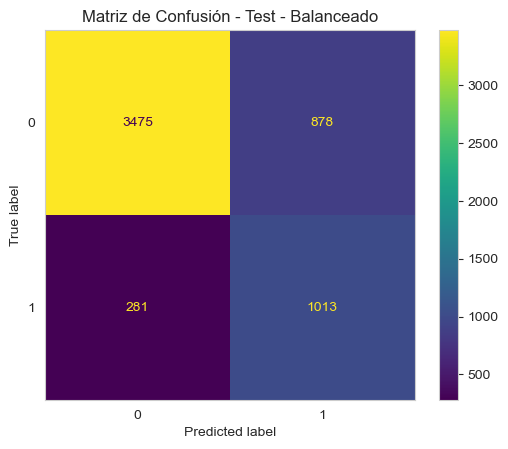

[[14067  3341]
 [ 1166  4012]]


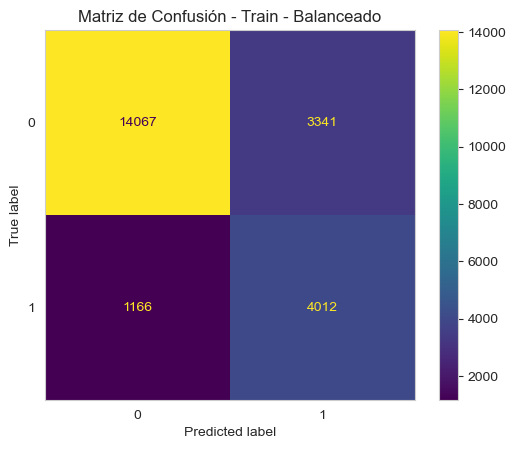

In [108]:
print(confusion_matrix(y_testlg, y_predlgb))
cm = confusion_matrix(y_testlg, y_predlgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots()
disp.plot(ax=ax)
# Desactivar las líneas de la cuadrícula
ax.grid(False)
ax.set_title('Matriz de Confusión - Test - Balanceado')
plt.show()

y_predlgb_train = model_lgb.predict(x_trainlg)
print(confusion_matrix(y_trainlg, y_predlgb_train))
cm_trainb = confusion_matrix(y_trainlg, y_predlgb_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_trainb)
fig, ax = plt.subplots()
disp.plot(ax=ax)
# Desactivar las líneas de la cuadrícula
ax.grid(False)
ax.set_title('Matriz de Confusión - Train - Balanceado')
plt.show()

En ambas matrices se observa que el balanceo genero en particular mas falsos positivos que falsos negativos. Esto implica que dicho aumento disminuyo la precisión.

**UMBRAL**

El umbral de 0.5 no siempre es el mejor. Depende de varios factores, incluyendo la distribución de las clases y el coste asociado a falsos positivos y falsos negativos. Ajustar el umbral puede mejorar significativamente el rendimiento del modelo en términos de la métrica que sea más relevante para el problema específico.

Ajustar al umbral óptimo puede depender del contexto y del balance entre la necesidad de minimizar falsos positivos y falsos negativos. Algunos métodos para seleccionar el umbral adecuado son:

* Maximizar el F1-Score: Calcula el F1-Score para diferentes umbrales y selecciona el que maximice esta métrica.
* Distance to the Top-Left Corner: Selecciona el umbral que minimiza la distancia al punto (0,1) en la curva ROC.


## MODELO BASE

### MB: REGRESION LINEAL Simple

En este modelo base se aplicara una regresión lineal simple con una sola variable, en particular con la de mayor correlación.

Dropeamos la target de x_train

In [109]:

x_train_mb = train_df[['Humidity3pm']]

y_train_mb = train_df['RainfallTomorrow']

x_test_mb = test_df[['Humidity3pm']]

y_test_mb = test_df['RainfallTomorrow']

In [110]:
regression_mb = LinearRegression()

regression_mb.fit(x_train_mb, y_train_mb)

y_pred_mb = regression_mb.predict(x_test_mb)

mse = mean_squared_error(y_test_mb, y_pred_mb)
print("Error cuadrático medio:", mse.round(4))

mae = mean_absolute_error(y_test_mb, y_pred_mb)
print("MAE:", mae.round(4))

regression_mb.score(x_train_mb,y_train_mb), regression_mb.score(x_test_mb, y_test_mb)
print(f"El R² para los datos de entrenamiento es: {regression_mb.score(x_train_mb,y_train_mb).round(4)} y para los de testeo: {regression_mb.score(x_test_mb,y_test_mb).round(4)}")

mape = (mae / (y_test_mb)).mean() * 100
print("MAPE:",mape.round(4))

Error cuadrático medio: 32.5555
MAE: 2.8321
El R² para los datos de entrenamiento es: 0.1047 y para los de testeo: 0.1112
MAPE: inf


El MB de regresión lineal, tiene metricas malas en comparación con nuestro modelo de mayor complejidad. Es la mitad aproximadamente el R2.

### MB: REGRESION LINEAL Mediana

En este modelo base se aplicara una regresión lineal basada en la constante Mediana.

In [111]:
y_pred_mb = test_df[['RainfallTomorrow']]
y_pred_mb.RainfallTomorrow = float(train_df[['RainfallTomorrow']].median())

y_test_mb = test_df['RainfallTomorrow']

In [112]:
# Metricas
mse = mean_squared_error(y_test_mb, y_pred_mb)
print("Error cuadrático medio:", mse.round(4))

mae = mean_absolute_error(y_test_mb, y_pred_mb)
print("MAE:", mae.round(4))

rs = r2_score(y_test_mb, y_pred_mb)
print(f"El R² para los datos de test: {rs.round(4)}")

mape = (mae / (y_test_mb)).mean() * 100
print("MAPE:",mape.round(4))

Error cuadrático medio: 40.5054
MAE: 1.9685
El R² para los datos de test: -0.1058
MAPE: inf


El MB de regresión lineal mediana, tiene metricas aún peores en comparación con nuestro modelo de mayor complejidad. Practicamente da negativo el R2.

### MB: REGRESION LOGISTICA Mayoría [Datasets desbalanceados]

En este modelo base se aplicara una regresión logistica basada en la clase mayorista.

In [113]:
y_pred_mblg = test_df[['RainTomorrow']]
y_pred_mblg.RainTomorrow = 0

y_test_mblg = test_df['RainTomorrow']

In [114]:
# Calcular la precisión para evaluar el modelo
accuracy_mb = accuracy_score(y_test_mblg, y_pred_mblg)
print("Precisión del modelo:", accuracy_mb)

recallp_mb = recall_score(y_test_mblg, y_pred_mblg, pos_label=1)
print("Recall del modelo para la clase positiva:", recallp_mb.round(4))

recalln_mb = recall_score(y_test_mblg, y_pred_mblg, pos_label=0)
print("Recall del modelo para la clase negativa:", recalln_mb.round(4))

precisionp_mb = precision_score(y_test_mblg, y_pred_mblg, pos_label=1)
print("Precisión para la clase positiva:", precisionp_mb.round(4))

precisionn_mb = precision_score(y_test_mblg, y_pred_mblg, pos_label=0)
print("Precisión para la clase negativa:", precisionn_mb.round(4))

f1p_mb = f1_score(y_test_mblg, y_pred_mblg, pos_label=1)
print("Puntaje F1 para la clase positiva:", f1p_mb.round(4))

f1n_mb = f1_score(y_test_mblg, y_pred_mblg, pos_label=0)
print("Puntaje F1 para la clase negativa:", f1n_mb.round(4))

Precisión del modelo: 0.7708517797060386
Recall del modelo para la clase positiva: 0.0
Recall del modelo para la clase negativa: 1.0
Precisión para la clase positiva: 0.0
Precisión para la clase negativa: 0.7709
Puntaje F1 para la clase positiva: 0.0
Puntaje F1 para la clase negativa: 0.8706


Se observa una disminución en el Accuracy frente al 0.85 del modelo de mayor complejidad; la diferencia es del 8% que principalmente se debe al gran desbalance que hay entre las clases.

## OPTIMIZACION DE HIPERPARAMETROS

### **OH: MODELOS DE REGRESION**

Para el modelo de regresión lineal se opto por el método de Grid Search, ya que el modelo a entrenar contiene pocos hiperparámetros y la cantidad de datos tampoco es elevada.

#### METODO GRID SEARCH

**REGRESION LINEAL**

Hiperparametros a optimizar:

fit_intercept: La decisión de calcular o no la intersección del modelo puede tener un impacto significativo en cómo se ajusta la línea de regresión a los datos. Determinar si la línea debe pasar por el origen o si se necesita una intersección no nula, permite ver si se obtiene un mejor ajuste.

positive: La restricción de los coeficientes a valores positivos puede ser importante en situaciones donde se espera que las variables predictoras tengan un impacto únicamente positivo en la variable de respuesta.

In [115]:
# Hiperparámetros para LinearRegression
grid_params = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search = GridSearchCV(LinearRegression(), grid_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Mejor puntuación (neg_mean_squared_error):", grid_search.best_score_)
print("Mejores hiperparámetros:", grid_search.best_params_)

best_grid_params = grid_search.best_params_
best_grid_model = LinearRegression(**best_grid_params)
best_grid_model.fit(x_train, y_train)

mse_gsr = mean_squared_error(y_test, best_grid_model.predict(x_test))
y_pred_gsr = best_grid_model.predict(x_test)
r2_gsr = r2_score(y_test, y_pred_gsr)


Mejor puntuación (neg_mean_squared_error): -30.85798824253598
Mejores hiperparámetros: {'fit_intercept': False, 'positive': False}


In [116]:
print(f'Error cuadrático en el conjunto test: ', mse_gsr)
print(f'R2 en el conjunto de test: ', r2_gsr)

Error cuadrático en el conjunto test:  29.005753568639705
R2 en el conjunto de test:  0.20815222489884366


El R2 en el conjunto de Test es aproximadamente igual al obtenido en la Regresión lineal sin optimizar, pero notar que los hiperparametros por lo menos fit_intercept es distinto al primer modelo hecho.

No hubo una mejora en la explicabilidad de la predicción.

### **OH: MODELOS DE CLASIFICACION**

Para el modelo de regresión logística se opto por el método Optuna, ya que el modelo a entrenar contiene varias combinaciones de hiperparámetros. A diferencia de random search, grid search optimiza las zonas de búsqueda.

#### METODO OPTUNA

**REGRESION LOGISTICA**

Hiperparametros a optimizar:

penalty: Determina el tipo de regularización que se aplicará al modelo. Puede ser 'l1' para la regularización L1 (Lasso) o 'l2' para la regularización L2 (Ridge). La regularización ayuda a evitar el sobreajuste al penalizar los coeficientes grandes.

solver: Especifica el algoritmo a utilizar en la optimización del problema. Puede ser 'newton-cg', 'lbfgs', 'liblinear', 'sag' o 'saga', cada uno tiene sus propias ventajas y desventajas en términos de velocidad y eficacia para diferentes conjuntos de datos.

C: Controla la fuerza de la regularización. Valores más altos de C indican una regularización más débil, lo que significa que el modelo se ajustará mejor a los datos de entrenamiento pero puede ser más propenso al sobreajuste.

max_iter: Especifica el número máximo de iteraciones permitidas para la convergencia del modelo. Es importante para garantizar que el modelo alcance la convergencia dentro de un número razonable de iteraciones.

class_weight: Permite especificar pesos para las clases en el caso de conjuntos de datos desequilibrados. Es útil para mejorar el rendimiento del modelo al tener en cuenta la distribución desigual de las clases.

In [117]:
# Función para validar las combinaciones de penalty y solver
def is_valid_combination(penalty, solver):
    if solver == 'liblinear':
        return penalty in ['l1', 'l2']
    elif solver == 'saga':
        return penalty in ['l1', 'l2', 'elasticnet']
    elif solver in ['newton-cg', 'lbfgs', 'sag']:
        return penalty == 'l2'
    else:
        return False

# Desactivar mensajes de depuración y registro de Optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Función objetivo para Optuna
def objective(trial):
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2', 'elasticnet', None])
    solver = trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'])
    
    if not is_valid_combination(penalty, solver):
        # Asignar un valor alto al MSE y continuar
        return 100.0
    
    C = trial.suggest_loguniform('C', 0.01, 100)
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    params = {
        'penalty': penalty,
        'solver': solver,
        'C': C,
        'max_iter': max_iter,
        'class_weight': class_weight,
    }

    logistic_model = LogisticRegression(**params, random_state=42)
    logistic_model.fit(x_trainlg, y_trainlg)
    y_pred = logistic_model.predict(x_testlg)
    mse = mean_squared_error(y_testlg, y_pred)
    return mse

# Creación del estudio de Optuna y optimización
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

# Obtener los mejores parámetros encontrados
best_optuna_params = study.best_params

# Crear y ajustar el modelo de regresión logística con los mejores parámetros
best_optuna_model = LogisticRegression(**best_optuna_params, random_state=42)
best_optuna_model.fit(x_trainlg, y_trainlg)

# Calcular el error cuadrático medio en el conjunto de prueba
optuna_mse = mean_squared_error(y_testlg, best_optuna_model.predict(x_testlg))


In [118]:
print("Mejores parámetros encontrados:", best_optuna_params)
print("Error cuadrático medio en el conjunto de prueba:", optuna_mse)

Mejores parámetros encontrados: {'penalty': 'l1', 'solver': 'liblinear', 'C': 3.904080992863343, 'max_iter': 413, 'class_weight': None}
Error cuadrático medio en el conjunto de prueba: 0.156012041792102


In [119]:
print(classification_report(y_testlg, best_optuna_model.predict(x_testlg)))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      4353
         1.0       0.72      0.52      0.61      1294

    accuracy                           0.84      5647
   macro avg       0.79      0.73      0.75      5647
weighted avg       0.83      0.84      0.83      5647



**RL No Balanceado**

In [120]:
print(classification_report(y_testlg, y_predlg))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      4353
         1.0       0.72      0.52      0.61      1294

    accuracy                           0.84      5647
   macro avg       0.79      0.73      0.75      5647
weighted avg       0.83      0.84      0.83      5647



**RL Balanceado**

In [121]:
print(classification_report(y_testlg, y_predlgb))

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86      4353
         1.0       0.54      0.78      0.64      1294

    accuracy                           0.79      5647
   macro avg       0.73      0.79      0.75      5647
weighted avg       0.84      0.79      0.81      5647



Comparación respecto al modelo no balanceado:
* No se observa cambios prácticamente en las diferentes métricas; no hubo una influencia notable por lo menos hasta los decimales que se observan.

Comparación respecto al modelo balanceado:
* Dado que se comparo este modelo ya con el no balanceado y este a su vez posee las mismas métricas que el optimizado de los hiperparametros.
  Las observaciones ya hechas anteriormente aplicarían a este caso. Esta diferencia era esperable ya que el accuracy había disminuido en valor, lo que significa el aumento
  de errores.


## EXPLICABILIDAD

En esta parte analizaremos el estudio de cada Feauture, para observar la influencia en los modelos.

In [122]:
# Determinación de las columnas involucradas
cols_rl = train_df.drop(columns = ['RainfallTomorrow','RainTomorrow'], axis=1).columns.values

shap.initjs()

### EXPLICABILIDAD: REGRESION LINEAL

#### INICIO

Preparamos Train y Test; junto con las demás objetos de SHAP.

In [174]:
# Array
x_test_array = test_df.drop(columns = cols_drop).values  # x_test.to_numpy()

x_train_array = train_df.drop(columns = cols_drop).values  # x_train.to_numpy()

In [175]:
# Crea un objeto explainer SHAP
explainer = shap.LinearExplainer(reg, x_train_array, feature_names=cols_rl)

In [176]:
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(x_test_array)

In [177]:
# (n_samples, n_features)
shap_values.shape

(5647, 91)

In [178]:
# Representa el valor promedio de la predicción del modelo cuando se consideran todas las instancias del conjunto de datos.
explainer.expected_value

1.809326171875

#### INTERPRETABILIDAD LOCAL

En esta parte se analizara una sola muestra.

In [183]:
index=0

reg.predict(x_test_array)[index]

9.408935546875

In [184]:
shap_values[index]

array([-4.25255171e-02, -8.65036363e-01,  1.48908033e+00, -2.08203199e-02,
       -1.90428656e-01,  4.94499657e-01, -5.80343115e-01,  6.30090883e-01,
       -9.86906873e-01,  4.22351842e+00,  4.10077494e-02, -4.41955672e-02,
       -3.77425787e-04,  3.06506483e-01, -2.78729968e-01,  4.38819148e-01,
        1.20912330e-01,  3.62906015e-01,  1.84124629e+00, -1.83849733e-01,
        4.01462920e-01, -2.11620323e-01,  2.72679535e+11,  2.08519644e+11,
       -1.49171746e+12,  1.28319781e+11,  1.92479672e+11,  1.44359754e+11,
        2.24559617e+11,  1.60399726e+11,  1.60399726e+11, -4.35513061e+10,
       -3.38732381e+10, -4.83903401e+10, -3.38732381e+10, -2.41951701e+10,
       -3.38732381e+10,  4.45191129e+11, -8.71026122e+10, -2.90342041e+10,
       -4.35513061e+10, -3.87122721e+10, -2.90342041e+10,  3.85162500e+10,
        2.75116072e+10,  2.20092857e+10,  4.95208929e+10,  2.20092857e+10,
       -5.33725179e+11,  3.30139286e+10,  4.40185715e+10,  4.40185715e+10,
        5.50232143e+09,  

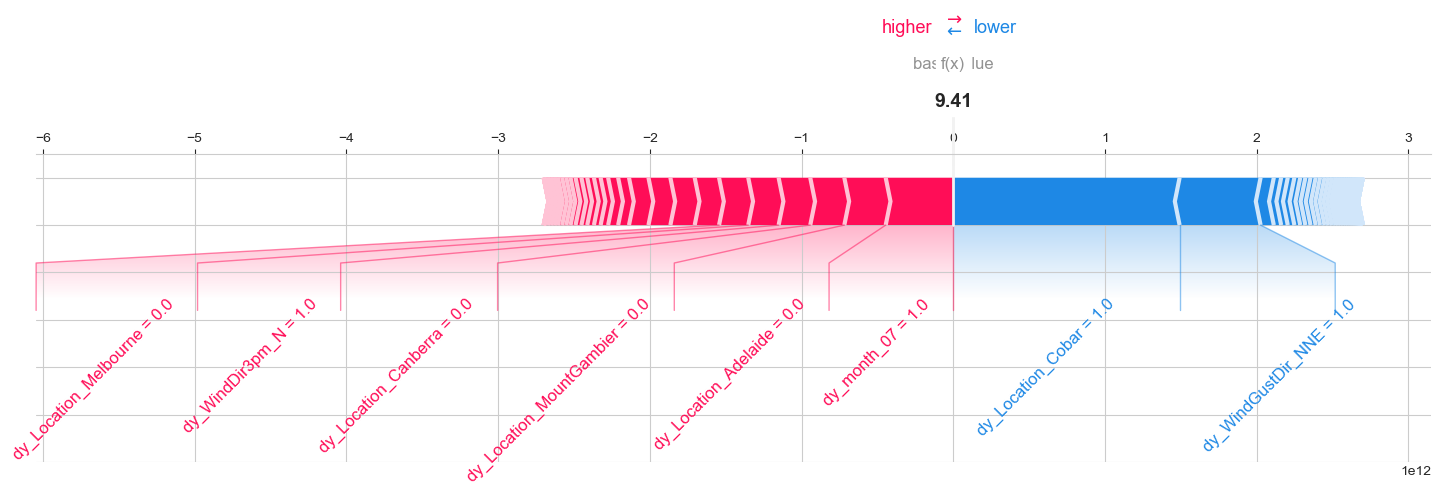

In [185]:
shap.force_plot(explainer.expected_value, shap_values[index], x_test_array[index], feature_names=cols_rl, matplotlib=True, figsize=(18, 4), text_rotation=45)

Se observa que los vientos de la dirección NNE[3pm] tienden a disminuir las precipitaciones; este análisis en particular es para la ciudad de Cobar(Su alto valor puede implicar que en esa zona, es tendiente de que no se den las condiciones necesarias para las precipitaciones) durante el mes de Julio(Incremento de precipitaciones). Las demás columnas no llegan a tener una incidencia notable para la muestra analizada. En las otras localidades, hay una incidencia menor pero indica que en esas zonas geográficas colaboran en incrementar las precipitaciones.

In [186]:
explanation = shap.Explanation(values=shap_values[index], base_values=explainer.expected_value, feature_names=cols_rl)

Aca se puede observar la gráfica anterior pero distribuido en como va variando el valor de la predicción hasta llegar a la predicción, en forma simplificada tiene una tendencia de crecimiento pero con dos amortiguaciones fuerte hacia disminuir el valor.

En la otra figura debajo, es también la misma descripción, pero discriminando por lado los valores de incremento y disminución.

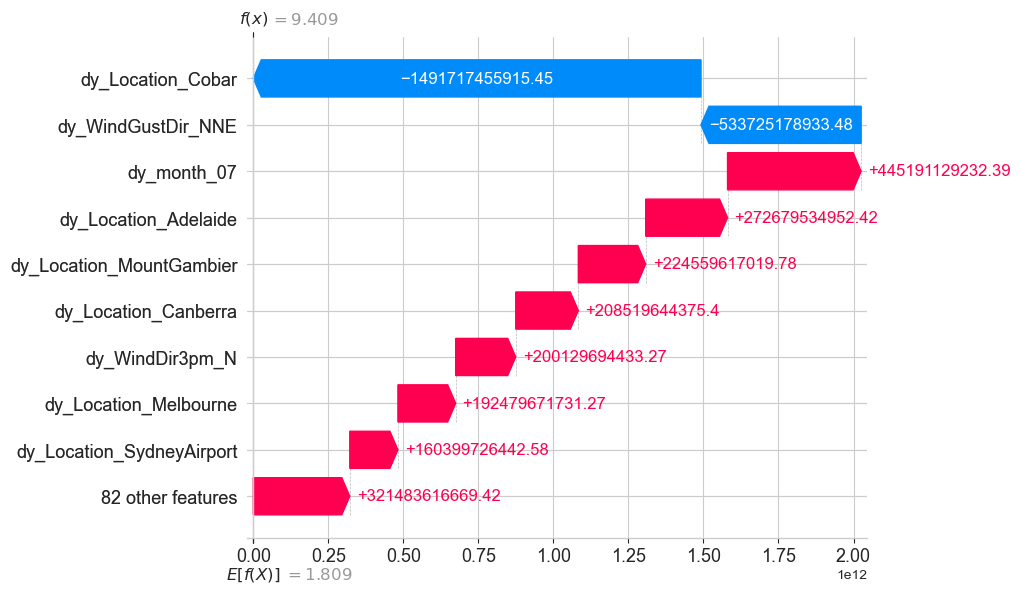

In [187]:
shap.plots.waterfall(explanation)

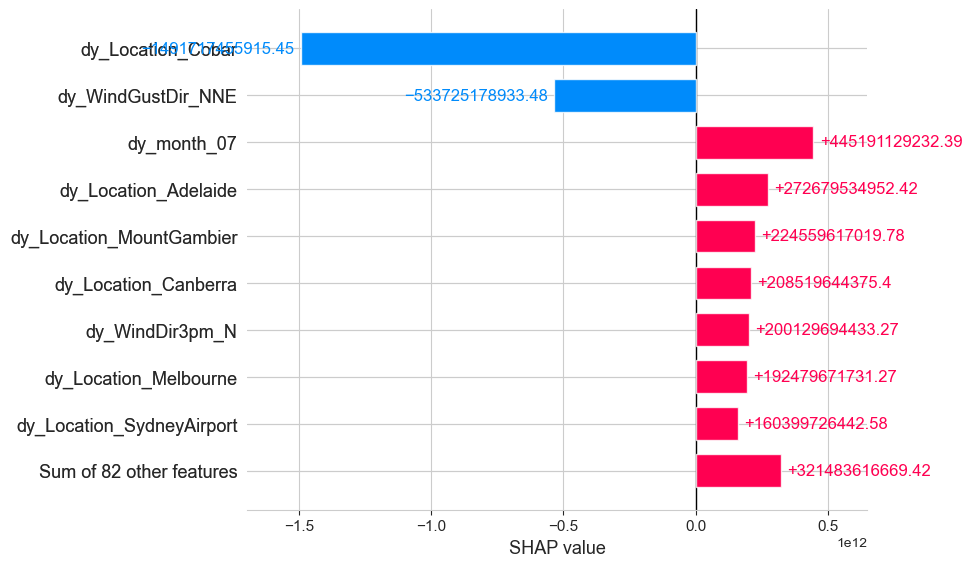

In [188]:
shap.plots.bar(explanation)

#### INTERPRETABILIDAD GLOBAL

En esta parte se analizara el dataset completo.

In [189]:
explanation = shap.Explanation(values = shap_values, base_values = explainer.expected_value, feature_names = cols_rl, data = x_test_array)

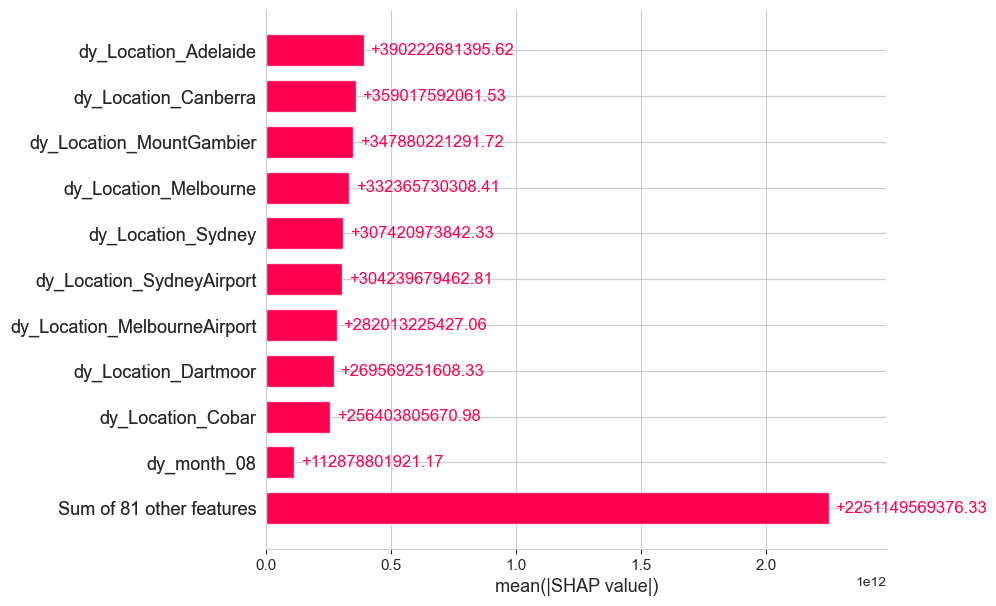

In [190]:
shap.plots.bar(explanation, max_display=11)

Se observa en promedio un dominio fuerte por las 9 ciudades primeras y el mes 8 (Agosto); ya que expresan valores altos en el promedio absoluto.

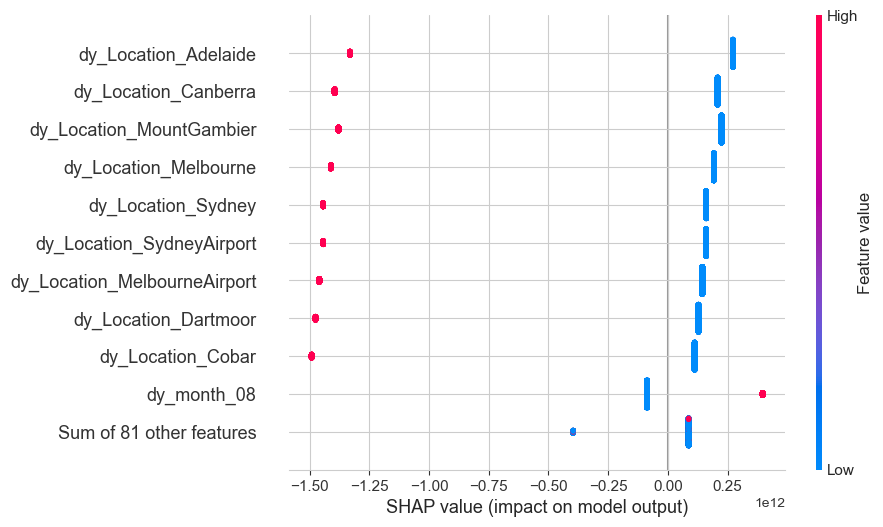

In [191]:
shap.plots.beeswarm(explanation, max_display=11)

Lo dicho anteriormente, con este gráfico se puede observar mejor los valores involucrados en el promedio absoluto.

Puntos rojos en el lado negativo: Indican que para características como dy_Location_Sydney, dy_Location_Adelaide, etc., los valores altos de estas características están asociados con una disminución en la salida del modelo. Esto significa que cuando estas características tienen valores altos, tienden a reducir el resultado del modelo con mayor proporción.

Puntos azules en el lado positivo: Indican que para características como dy_Location_Melbourne, dy_Location_Canberra, etc., los valores bajos de estas características están asociados con un aumento en la salida del modelo. Es decir, cuando estas características tienen valores bajos, tienden a aumentar el resultado del modelo con menor proporción.

### EXPLICABILIDAD: REGRESION LOGISTICA

#### INICIO

Preparamos Train y Test; junto con las demás objetos de SHAP.

In [192]:
# Array
x_testlg_array = x_testlg.values  # x_test.to_numpy()

x_trainlg_array = x_trainlg.values  # x_train.to_numpy()

In [193]:
# Crea un objeto explainer SHAP
explainerlg = shap.LinearExplainer(model_lg, x_trainlg_array, feature_names=cols_rl)

In [194]:
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_valueslg = explainerlg.shap_values(x_testlg_array)

In [195]:
# (n_samples, n_features)
shap_valueslg.shape

(5647, 91)

In [196]:
# Representa el valor promedio de la predicción del modelo cuando se consideran todas las instancias del conjunto de datos.
explainerlg.expected_value

-1.7820798262573043

#### INTERPRETABILIDAD LOCAL

En esta parte se analizara una sola muestra.

In [197]:
index=1111

model_lg.predict(x_testlg)[index]

0.0

In [198]:
model_lg.predict_proba(x_testlg)[index]

array([0.69164742, 0.30835258])

In [199]:
# Dado que shap trabaja en escala de log-odds, visualizamos la probabilidad en esa escala
probabilidad = model_lg.predict_proba(x_testlg)[index]
log_odds = np.log(probabilidad / (1 - probabilidad))
log_odds

array([ 0.80783246, -0.80783246])

In [200]:
shap_valueslg[index]

array([-1.21412116e-01, -1.41058243e-02, -2.06675921e-02,  5.96833833e-03,
        9.30559158e-02,  9.05840350e-02,  2.31257901e-01,  3.01349138e-01,
        1.22195698e-01,  9.59369839e-01, -1.39935070e-02, -3.00845612e-01,
       -4.86909358e-02,  3.45394729e-01,  2.48383860e-01,  4.07510876e-03,
       -1.03609486e-01, -3.75388154e-01, -1.95819940e-01,  4.99802587e-02,
        1.69992118e-01, -1.03384382e-01, -5.87775478e-02,  6.55637991e-03,
       -1.98708110e-02,  1.20670261e-02,  5.97297440e-02,  4.24852694e-02,
        7.84277895e-03,  4.38550216e-02,  1.26557069e-02,  5.02931574e-02,
        2.60913213e-02,  1.51784205e-02, -1.75236135e-02, -9.27987604e-04,
        7.71244637e-04, -8.10935661e-03, -4.42866209e-02, -1.11046686e-03,
        1.72458502e-01,  9.27150629e-03,  1.73633791e-02, -1.75291194e-02,
       -3.56924035e-01, -7.98887910e-03,  2.21743193e-02,  9.03488954e-03,
        4.86840745e-03, -6.21855345e-03,  4.43998299e-03,  1.77267686e-02,
        1.59600929e-03,  

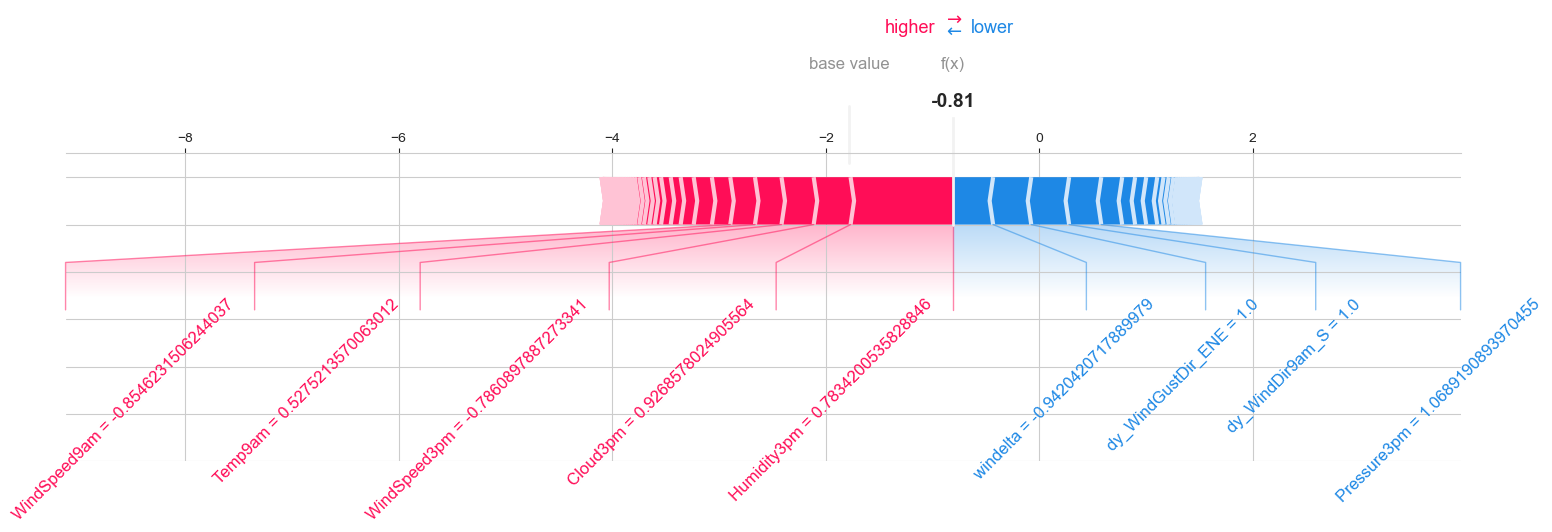

In [201]:
shap.force_plot(explainerlg.expected_value, shap_valueslg[index], x_testlg_array[index], feature_names=cols_rl, matplotlib=True, figsize=(18, 4), text_rotation=45)

Para esta muestra:
Las features de color rojo con etiquetas colaboran en incrementar la predicción de las probabilidades a un valor mayor, mientras que las otras sin etiqueta también pero con menor participación o influencia. En este caso particular las dos mayores influencias son las nubes de las 3pm, la velocidad del viento 3pm y 9am, la temperatura de las 9am y la Humedad 3pm.

Las features de color azul con etiquetas colaboran en disminuir la predicción de las probabilidades a un valor menor, mientras que las otras sin etiqueta también pero con menor participación o influencia. En este caso particular la mayor influencia es la la variación de la velocidad del viento entre las 9am y las 3pm; la dirección ENE de la ráfaga de viento, la dirección S del viento a las 9am y la presión a las 3pm.

In [202]:
explanationlg = shap.Explanation(values=shap_valueslg[index], base_values=explainerlg.expected_value, feature_names=cols_rl)

A continuación, se muestra la evolución parcial de la predicción con las variables mas influyentes. En resumen se ve una tendencia mas de incremento.

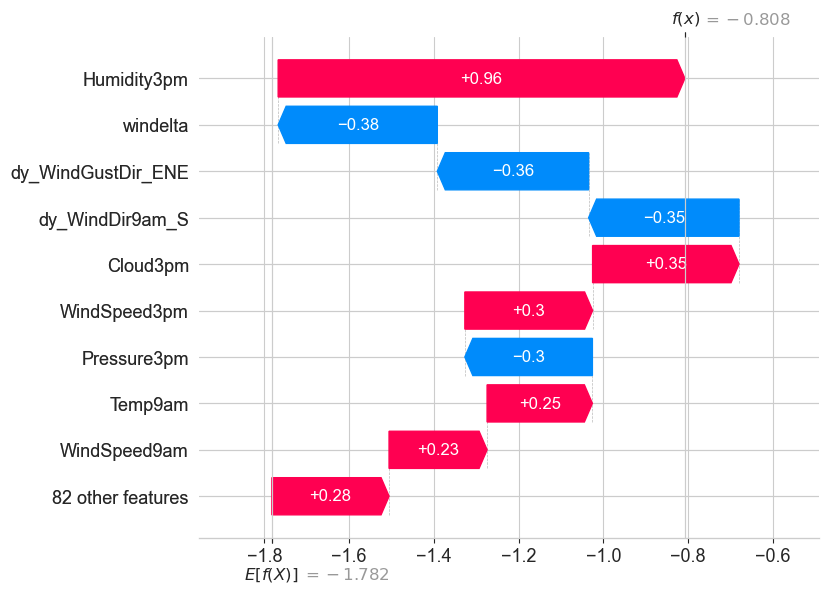

In [203]:
shap.plots.waterfall(explanationlg)

#### INTERPRETABILIDAD GLOBAL

En esta parte se analizara el dataset completo.

In [204]:
explanationlg = shap.Explanation(values = shap_valueslg, base_values = explainerlg.expected_value, feature_names = cols_rl, data = x_testlg_array)

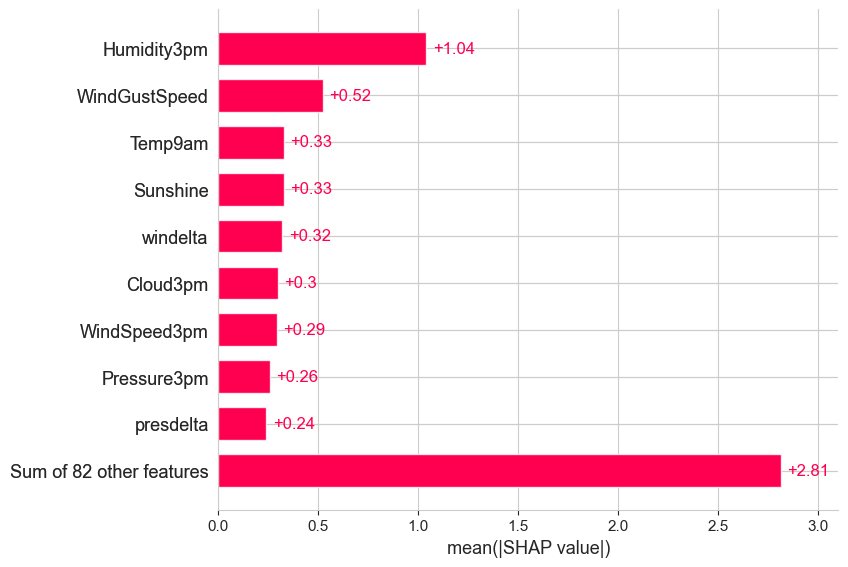

In [205]:
shap.plots.bar(explanationlg)

Se observa en promedio que lidera fuerte las 3 primeras variables asociadas a la Humedad 3pm, la velocidad de ráfaga de viento y la temperatura 9am; ya que expresan valores altos en el promedio absoluto.

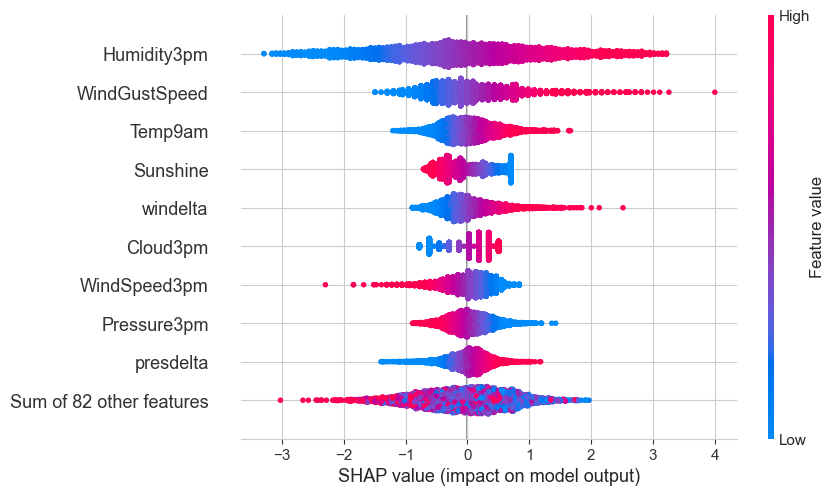

In [206]:
shap.plots.beeswarm(explanationlg)

Humidity3pm: Los valores bajos de Humidity3pm (azul) están generalmente asociados con un impacto negativo en la predicción del modelo (valores SHAP negativos), mientras que los valores altos (rojo) están asociados con un impacto positivo (valores SHAP positivos). En este caso se ve una simetría lo que implica que cumple un papel importante en la predicción. Ademas se presenta un dominio de densidad en valores bajos de SHAP, es decir, hay más observaciones con valores SHAP en esa región.

WindGustSpeed: Los valores bajos de WindGustSpeed (azul) generalmente están asociados con un impacto negativo en la predicción del modelo, mientras que los valores altos (rojo) están asociados con un impacto positivo. Esta variable presenta una asimetría, con una incidencia mas a incrementar la predicción y con valores alto del mismo, igualmente que la anterior variable presenta mayor densidad de valores SHAP en valores bajos.

Temp9am: Los valores bajos de Temp9am (azul) tienden a estar asociados con un impacto negativo en la predicción (valores SHAP negativos), mientras que los valores altos (rojo) tienden a estar asociados con un impacto positivo (valores SHAP positivos). Esta variable en particular muestra mayor incidencia en incrementar la predicción con valores alto del mismo peros sin mucha asimetría al caso opuesto. Igual que las anteriores variables posee mayor densidad de observaciones para valores bajos de SHAP.

OBSERVACION: En los modelos (regresión/clasificación) las variables mas importantes no coinciden.

## MODELADO: REDES NEURONALES

### RED NEURONAL PARA REGRESION Y CLASIFICACION (Con parámetros por defecto para regresión)

In [149]:
class NeuralNetworkTensorFlow:
    """
        Modelo flexible con TensorFlow para resolver problemas de regresión o clasificación.
        Permite personalizar la cantidad de capas, neuronas por capa, funciones de activación, etc.
    """
    def __init__(self, input_shape, num_layers=2, neurons_per_layer=2, activation='relu', 
                 output_activation='linear', num_output_neurons=1, loss='mean_squared_error', 
                 optimizer='adam', learning_rate=0.01, epochs=100, batch_size=16, metrics=None, cant_params=True):
        
        self.input_shape = input_shape
        self.num_layers = num_layers
        self.neurons_per_layer = neurons_per_layer
        self.activation = activation
        self.output_activation = output_activation
        self.num_output_neurons = num_output_neurons
        self.loss = loss
        self.learning_rate = learning_rate
        self.optimizer = self.get_optimizer(optimizer, learning_rate)
        self.optimizer_name = optimizer
        self.epochs = epochs
        self.batch_size = batch_size
        self.metrics = metrics if metrics is not None else []
        self.cant_params = cant_params
        self.model = self.build_model()


    def get_optimizer(self, optimizer, learning_rate):
        """
        Devuelve una instancia del optimizador con la tasa de aprendizaje especificada.
        """
        optimizers = {
            'adam': tf.keras.optimizers.Adam,
            'sgd': tf.keras.optimizers.SGD,
            'rmsprop': tf.keras.optimizers.RMSprop,
            'adagrad': tf.keras.optimizers.Adagrad,
            # Añadir otros optimizadores según sea necesario
        }
        if optimizer in optimizers:
            return optimizers[optimizer](learning_rate=learning_rate)
        else:
            raise ValueError(f"Optimizer '{optimizer}' no es válido.")

    def build_model(self):
        """
            Construye el modelo con las especificaciones dadas.
        """
        model = tf.keras.Sequential()
        
        # Agregar la primera capa con input_shape
        model.add(tf.keras.layers.Dense(self.neurons_per_layer, activation=self.activation, input_shape=(self.input_shape,)))
        
        # Agregar capas ocultas adicionales
        for _ in range(self.num_layers - 1):
            model.add(tf.keras.layers.Dense(self.neurons_per_layer, activation=self.activation))
        
        # Agregar la capa de salida
        model.add(tf.keras.layers.Dense(self.num_output_neurons, activation=self.output_activation))
        
        # Compilar el modelo
        model.compile(optimizer=self.optimizer, loss=self.loss, metrics=self.metrics)
        
        if self.cant_params:
            # Imprimir la cantidad de parámetros a modo de ejemplo
            print("n° de parámetros:", model.count_params())

        return model
    
    def fit(self, X, y):
        """
            Entrena el modelo.
        """
        X = np.array(X)
        y = np.array(y)
        history = self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return history.history['loss']

    def evaluate(self, X, y):
        """
            Evalúa el modelo.
        """
        X = np.array(X)
        y = np.array(y)
        loss = self.model.evaluate(X, y, verbose=0)
        return loss

    def predict(self, X):
        """
            Hace predicciones con el modelo entrenado.
        """
        X = np.array(X)
        predictions = self.model.predict(X)
        return predictions
    
    def get_params(self, deep=True):
        return {
            'input_shape': self.input_shape,
            'num_layers': self.num_layers,
            'neurons_per_layer': self.neurons_per_layer,
            'activation': self.activation,
            'output_activation': self.output_activation,
            'num_output_neurons': self.num_output_neurons,
            'loss': self.loss,
            'optimizer': self.optimizer_name,
            'learning_rate': self.learning_rate,
            'epochs': self.epochs,
            'batch_size': self.batch_size,
            'metrics': self.metrics,
            'cant_params': self.cant_params
        }

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        # Recompilar el modelo si se cambian los hiperparámetros
        self.model = self.build_model()
        return self


### RN: REGRESION

In [68]:
# Array
x_train = train_df.drop(columns = cols_drop).values  # x_train.to_numpy()

y_train = train_df['RainfallTomorrow'].values

x_test = test_df.drop(columns = cols_drop).values  # x_test.to_numpy()

y_test = test_df['RainfallTomorrow'].values

In [69]:
# Regresión
input_shape = x_train.shape[1]
nn_regression = NeuralNetworkTensorFlow(input_shape=input_shape)

n° de parámetros: 193


In [70]:
# Entrenar el modelo
loss_history = nn_regression.fit(x_train, y_train)
print("Evolución de la pérdida durante el entrenamiento:", loss_history)

# Evaluar el modelo
test_loss = nn_regression.evaluate(x_test, y_test)
print("Pérdida en el conjunto de prueba:", test_loss)

Evolución de la pérdida durante el entrenamiento: [30.047901153564453, 27.750673294067383, 27.099824905395508, 27.10207176208496, 27.089895248413086, 27.0498046875, 26.842161178588867, 26.818134307861328, 26.7790470123291, 26.62189483642578, 26.57542610168457, 26.541519165039062, 26.519577026367188, 26.560380935668945, 26.515939712524414, 26.32921028137207, 26.45520782470703, 26.34203338623047, 26.426799774169922, 26.32213592529297, 26.21494483947754, 26.338274002075195, 26.395109176635742, 26.182418823242188, 26.150684356689453, 26.255191802978516, 26.336868286132812, 26.075450897216797, 26.269445419311523, 26.1566104888916, 26.229475021362305, 26.145816802978516, 26.167919158935547, 26.0616455078125, 26.165861129760742, 26.152856826782227, 25.953170776367188, 26.169368743896484, 26.01642417907715, 25.961824417114258, 26.126846313476562, 25.98757553100586, 25.90033721923828, 25.981216430664062, 26.036970138549805, 25.93537139892578, 25.884164810180664, 25.87670135498047, 25.9101886749

In [71]:
# Hacer predicciones
predictions_rn1 = nn_regression.predict(x_test)
print("Predicciones:", predictions_rn1)

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Predicciones: [[12.465553 ]
 [ 0.8458222]
 [ 0.8458222]
 ...
 [ 0.8458222]
 [ 0.8458222]
 [ 0.8458222]]


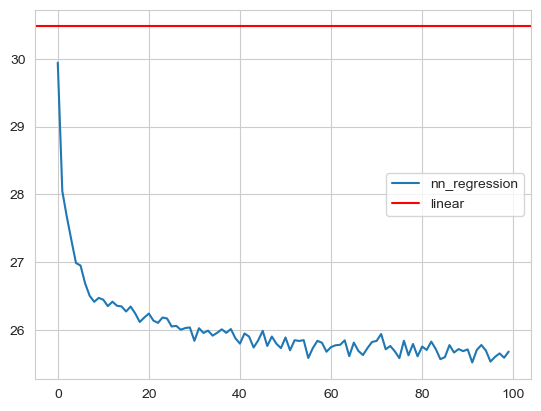

In [216]:
plt.plot(loss_history, label='nn_regression')

# Regresión Lineal
y_pred_train_rg = reg.predict(x_train)
mse_linear_model = mean_squared_error(y_train, y_pred_train_rg)

plt.axhline(mse_linear_model, color='red', label='linear',linestyle = '-')
plt.legend()
plt.show()

In [220]:
# Hacer predicciones en Train
p_train_rn1 = nn_regression.predict(x_train)

706/706 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [223]:
r2_test_rn1 = r2_score(y_test, predictions_rn1)
r2_train_rn1 = r2_score(y_train, p_train_rn1)

mse_test_rn1 = mean_squared_error(y_test, predictions_rn1)

rmse_test_rn1 = np.sqrt(mse_test_rn1)

mae_test_rn1 = mean_absolute_error(y_test, predictions_rn1)

print(f'R2 Score en test: {r2_test_rn1.round(4)}')
print(f'R2 Score en train: {r2_train_rn1.round(4)}')

print(f'MSE en test: {mse_test_rn1.round(4)}')
print(f'RMSE en test: {rmse_test_rn1.round(4)}')
print(f'MAE en test: {mae_test_rn1.round(4)}')

R2 Score en test: 0.2581
R2 Score en train: 0.373
MSE en test: 27.177
RMSE en test: 5.2132
MAE en test: 2.2879


### RN: CLASIFICACION

In [227]:
# Array #BALANCEAR MIENTRAS SE DEJARA ASÍ SIMILAR PARA LA OPTIMIZACION DE HIPERPARAMETROS
x_train_c = train_df.drop(columns = cols_drop).values  # x_train.to_numpy()

y_train_c = train_df['RainTomorrow'].values

x_test_c = test_df.drop(columns = cols_drop).values  # x_test.to_numpy()

y_test_c = test_df['RainTomorrow'].values

In [239]:
# Clasificación binaria; se mantiene el input_shape
nn_binary = NeuralNetworkTensorFlow(input_shape=input_shape, output_activation='sigmoid', 
                                    loss='binary_crossentropy', metrics=['accuracy'])

n° de parámetros: 193


In [240]:
# Convertir a formato adecuado para la pérdida binaria
y_train_binary = np.array(y_train_c).reshape(-1, 1)
y_test_binary = np.array(y_test_c).reshape(-1, 1)

# Entrenar el modelo
loss_history_binary = nn_binary.fit(x_train_c, y_train_binary)
print("Evolución de la pérdida durante el entrenamiento (binaria):", loss_history_binary)

# Evaluar el modelo
test_loss_binary = nn_binary.evaluate(x_test_c, y_test_binary)
print("Pérdida en el conjunto de prueba (binaria):", test_loss_binary)

Evolución de la pérdida durante el entrenamiento (binaria): [0.3829379379749298, 0.362885981798172, 0.3579169809818268, 0.3558449149131775, 0.3537159562110901, 0.35161057114601135, 0.3513026535511017, 0.3499596118927002, 0.3485775887966156, 0.3492313027381897, 0.3484787344932556, 0.3482062816619873, 0.34739232063293457, 0.3478434681892395, 0.3477524220943451, 0.3472927510738373, 0.34710243344306946, 0.34726956486701965, 0.3469789922237396, 0.34671878814697266, 0.3462660312652588, 0.34651416540145874, 0.3460230529308319, 0.347065269947052, 0.3463903069496155, 0.3454504907131195, 0.3466815948486328, 0.34622371196746826, 0.346000611782074, 0.34590595960617065, 0.34692615270614624, 0.34615635871887207, 0.34624001383781433, 0.34530532360076904, 0.34581100940704346, 0.34578728675842285, 0.3465957045555115, 0.3450976610183716, 0.34521904587745667, 0.3451898396015167, 0.34564584493637085, 0.3457735776901245, 0.34577953815460205, 0.3455216884613037, 0.34593990445137024, 0.3452511727809906, 0.34

In [241]:
# Hacer predicciones
predictions_binary = nn_binary.predict(x_test_c)
print("Predicciones (binarias):", predictions_binary)

177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicciones (binarias): [[0.88278365]
 [0.0042213 ]
 [0.01954298]
 ...
 [0.09004178]
 [0.14647578]
 [0.07909652]]


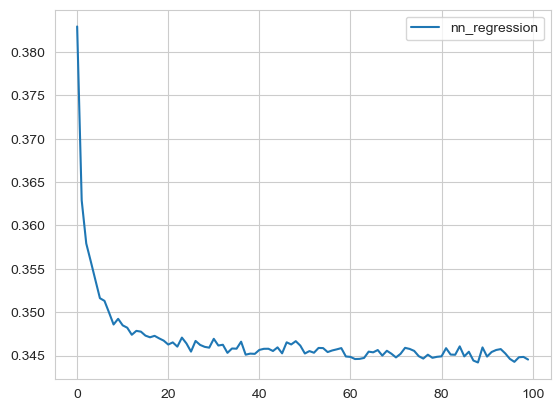

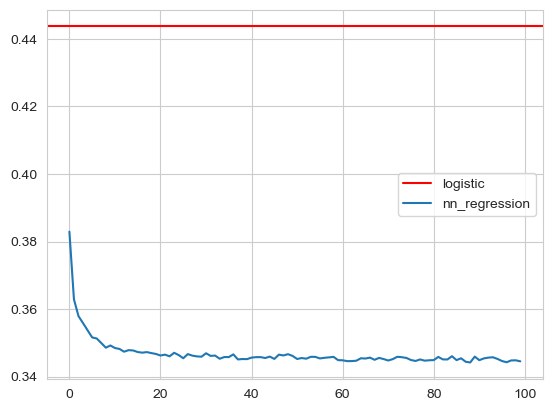

In [242]:
# RN: Clasificación
plt.plot(loss_history_binary, label='nn_regression')
plt.legend()
plt.show()


# Clasificación
y_pred_train_c = model_lgb.predict_proba(x_trainlg)[:, 1]
log_loss_c = log_loss(y_trainlg, y_pred_train_c)

plt.axhline(log_loss_c, color='red', label='logistic', linestyle='-')
plt.plot(loss_history_binary, label='nn_regression')
plt.legend()
plt.show()

In [243]:
# Hacer predicciones en Train
pc_train_rn1 = nn_binary.predict(x_train_c)

706/706 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step


In [251]:
threshold = 0.5
predictions_binary_class = (predictions_binary >= threshold).astype(int)
pc_train_rn1_class = (pc_train_rn1 >= threshold).astype(int)

# Ahora, puedes usar estas predicciones binarias con classification_report
print('---------TEST---------')
print(classification_report(y_test_binary, predictions_binary_class))
print('---------------------------------------------------')
print('---------TRAIN---------')
print(classification_report(y_train_binary, pc_train_rn1_class))

---------TEST---------
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      4353
         1.0       0.67      0.64      0.65      1294

    accuracy                           0.85      5647
   macro avg       0.78      0.77      0.78      5647
weighted avg       0.84      0.85      0.84      5647

---------------------------------------------------
---------TRAIN---------
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90     17408
         1.0       0.69      0.63      0.66      5178

    accuracy                           0.85     22586
   macro avg       0.79      0.77      0.78     22586
weighted avg       0.85      0.85      0.85     22586



[[3949  404]
 [ 469  825]]


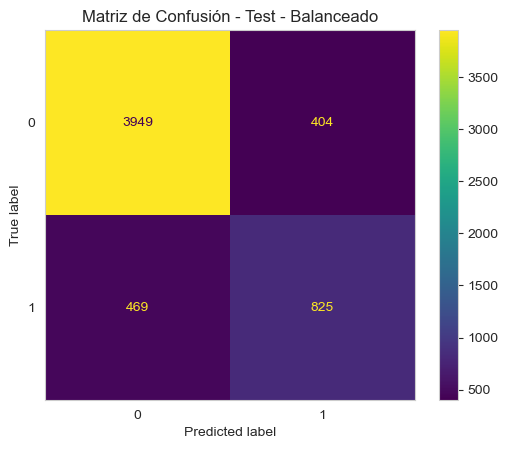

[[15935  1473]
 [ 1902  3276]]


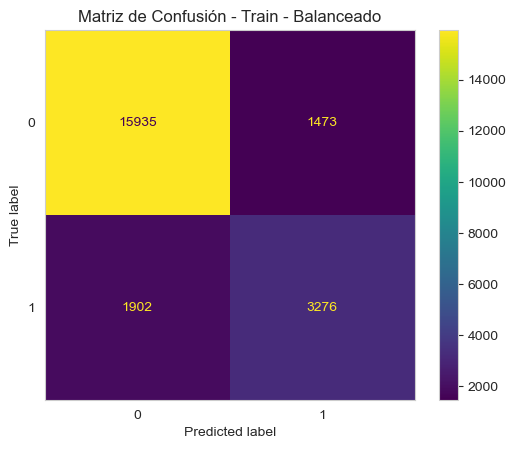

In [252]:
# TEST
print(confusion_matrix(y_test_binary, predictions_binary_class))
cm = confusion_matrix(y_test_binary, predictions_binary_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots()
disp.plot(ax=ax)

# Desactivar las líneas de la cuadrícula
ax.grid(False)
ax.set_title('Matriz de Confusión - Test - Balanceado')
plt.show()

# TRAIN
print(confusion_matrix(y_train_binary, pc_train_rn1_class))
cm_trainb = confusion_matrix(y_train_binary, pc_train_rn1_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_trainb)
fig, ax = plt.subplots()
disp.plot(ax=ax)

# Desactivar las líneas de la cuadrícula
ax.grid(False)
ax.set_title('Matriz de Confusión - Train - Balanceado')
plt.show()

SFD

## RN: OPTIMIZACION DE HIPERPARAMETROS

### **OH: RN-REGRESION**

##Para el modelo de regresión lineal se opto por el método de Grid Search, ya que el modelo a entrenar contiene pocos hiperparámetros y la cantidad de datos tampoco es elevada.

#### METODO RANDOM SEARCH

Hiperparametros a optimizar:

##positive: La restricción de los coeficientes a valores positivos puede ser importante en situaciones donde se espera que las variables predictoras tengan un impacto únicamente positivo en la variable de respuesta.

In [150]:
# Hiperparámetros para RN: Regression
grid_params = {
    'num_layers': [2, 3],  # Número de capas
    'neurons_per_layer': [2, 3],  # Número de neuronas por capa
    'activation': ['relu', 'tanh', 'leaky_relu'],  # Función de activación
    'output_activation': ['linear'],  # Activación de la capa de salida para regresión
    'loss': ['mean_squared_error', 'mean_absolute_error'],  # Función de pérdida
    'optimizer': ['adam', 'sgd', 'rmsprop'],  # Optimizador
    'learning_rate': [0.01, 0.1, 0.5],  # Tasa de aprendizaje
    'epochs': [100, 200, 400],  # Número de épocas
    'batch_size': [8, 16, 32]  # Tamaño del lote
}

random_search = RandomizedSearchCV(NeuralNetworkTensorFlow(input_shape=input_shape, cant_params=False), grid_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lh = random_search.fit(x_train, y_train)

print("Mejor puntuación (neg_mean_squared_error):", random_search.best_score_)
print("Mejores hiperparámetros:", random_search.best_params_)

In [ ]:
best_grid_params = random_search.best_params_
best_grid_model = NeuralNetworkTensorFlow(**best_grid_params, input_shape=input_shape)
best_grid_model.fit(x_train, y_train)

In [ ]:
mse_gsr = mean_squared_error(y_test, best_grid_model.predict(x_test))
y_pred_gsr = best_grid_model.predict(x_test)
r2_gsr = r2_score(y_test, y_pred_gsr)

In [ ]:
print(f'Error cuadrático en el conjunto test: ', mse_gsr)
print(f'R2 en el conjunto de test: ', r2_gsr)

Error cuadrático en el conjunto test:  29.005753568639705
R2 en el conjunto de test:  0.20815222489884366


##El R2 en el conjunto de Test es aproximadamente igual al obtenido en la Regresión lineal sin optimizar, pero notar que los hiperparametros por lo menos fit_intercept es distinto al primer modelo hecho.

##No hubo una mejora en la explicabilidad de la predicción.

### **OH: RN-CLASIFICACION**

##Para el modelo de regresión logística se opto por el método Optuna, ya que el modelo a entrenar contiene varias combinaciones de hiperparámetros. A diferencia de random search, grid search optimiza las zonas de búsqueda.

#### METODO RANDOM SEARCH

Hiperparametros a optimizar:

#penalty: Determina el tipo de regularización que se aplicará al modelo. Puede ser 'l1' para la regularización L1 (Lasso) o 'l2' para la regularización L2 (Ridge). La regularización ayuda a evitar el sobreajuste al penalizar los coeficientes grandes.

In [1]:
# Hiperparámetros para RN: Clasificación Binaria
grid_params = {
    'num_layers': [2, 3],  # Número de capas
    'neurons_per_layer': [2, 3],  # Número de neuronas por capa
    'activation': ['relu', 'sigmoid', 'leaky_relu'],  # Función de activación
    'output_activation': ['sigmoid'],  # Activación de la capa de salida para clasificación binaria
    'loss': ['binary_crossentropy'],  # Función de pérdida para clasificación binaria
    'optimizer': ['adam', 'sgd', 'rmsprop'],  # Optimizador
    'learning_rate': [0.01, 0.1, 0.5],  # Tasa de aprendizaje
    'epochs': [100, 200, 400],  # Número de épocas
    'batch_size': [8, 16, 32],  # Tamaño del lote
    'metrics': [['accuracy'], tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]  # Métricas a monitorear durante el entrenamiento
}

grid_search = RandomizedSearchCV(NeuralNetworkTensorFlow(input_shape=input_shape, cant_params=False), grid_params, cv=5, scoring='accuracy', n_jobs=-1)
lh_c = grid_search.fit(x_train, y_train)

print("Mejor puntuación (neg_mean_squared_error):", grid_search.best_score_)
print("Mejores hiperparámetros:", grid_search.best_params_)

NameError: name 'optuna' is not defined

Mejores parámetros encontrados: {'penalty': 'l1', 'solver': 'liblinear', 'C': 3.904080992863343, 'max_iter': 413, 'class_weight': None}
Error cuadrático medio en el conjunto de prueba: 0.156012041792102


In [ ]:
print(classification_report(y_testlg, best_optuna_model.predict(x_testlg)))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      4353
         1.0       0.72      0.52      0.61      1294

    accuracy                           0.84      5647
   macro avg       0.79      0.73      0.75      5647
weighted avg       0.83      0.84      0.83      5647



**RL No Balanceado**

In [ ]:
print(classification_report(y_testlg, y_predlg))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      4353
         1.0       0.72      0.52      0.61      1294

    accuracy                           0.84      5647
   macro avg       0.79      0.73      0.75      5647
weighted avg       0.83      0.84      0.83      5647



**RL Balanceado**

In [ ]:
print(classification_report(y_testlg, y_predlgb))

              precision    recall  f1-score   support

         0.0       0.93      0.80      0.86      4353
         1.0       0.54      0.78      0.64      1294

    accuracy                           0.79      5647
   macro avg       0.73      0.79      0.75      5647
weighted avg       0.84      0.79      0.81      5647



Comparación respecto al modelo no balanceado:
* No se observa cambios prácticamente en las diferentes métricas; no hubo una influencia notable por lo menos hasta los decimales que se observan.

Comparación respecto al modelo balanceado:
* Dado que se comparo este modelo ya con el no balanceado y este a su vez posee las mismas métricas que el optimizado de los hiperparametros.
  Las observaciones ya hechas anteriormente aplicarían a este caso. Esta diferencia era esperable ya que el accuracy había disminuido en valor, lo que significa el aumento
  de errores.


## RN: EXPLICABILIDAD

En esta parte analizaremos el estudio de cada Feauture, para observar la influencia en los modelos.

In [ ]:
# Determinación de las columnas involucradas
cols_rl = train_df.drop(columns = ['RainfallTomorrow','RainTomorrow'], axis=1).columns.values

shap.initjs()

### RN: EXPLICABILIDAD-REGRESION

#### INICIO

Preparamos Train y Test; junto con las demás objetos de SHAP.

In [ ]:
# Array
x_test_array = test_df.drop(columns = cols_drop).values  # x_test.to_numpy()

x_train_array = train_df.drop(columns = cols_drop).values  # x_train.to_numpy()

In [ ]:
# Crea un objeto explainer SHAP
explainer = shap.LinearExplainer(reg, x_train_array, feature_names=cols_rl)

In [ ]:
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_values = explainer.shap_values(x_test_array)

In [ ]:
# (n_samples, n_features)
shap_values.shape

(5647, 91)

In [ ]:
# Representa el valor promedio de la predicción del modelo cuando se consideran todas las instancias del conjunto de datos.
explainer.expected_value

1.809326171875

#### INTERPRETABILIDAD LOCAL

En esta parte se analizara una sola muestra.

In [ ]:
index=0

reg.predict(x_test_array)[index]

9.408935546875

In [ ]:
shap_values[index]

array([-4.25255171e-02, -8.65036363e-01,  1.48908033e+00, -2.08203199e-02,
       -1.90428656e-01,  4.94499657e-01, -5.80343115e-01,  6.30090883e-01,
       -9.86906873e-01,  4.22351842e+00,  4.10077494e-02, -4.41955672e-02,
       -3.77425787e-04,  3.06506483e-01, -2.78729968e-01,  4.38819148e-01,
        1.20912330e-01,  3.62906015e-01,  1.84124629e+00, -1.83849733e-01,
        4.01462920e-01, -2.11620323e-01,  2.72679535e+11,  2.08519644e+11,
       -1.49171746e+12,  1.28319781e+11,  1.92479672e+11,  1.44359754e+11,
        2.24559617e+11,  1.60399726e+11,  1.60399726e+11, -4.35513061e+10,
       -3.38732381e+10, -4.83903401e+10, -3.38732381e+10, -2.41951701e+10,
       -3.38732381e+10,  4.45191129e+11, -8.71026122e+10, -2.90342041e+10,
       -4.35513061e+10, -3.87122721e+10, -2.90342041e+10,  3.85162500e+10,
        2.75116072e+10,  2.20092857e+10,  4.95208929e+10,  2.20092857e+10,
       -5.33725179e+11,  3.30139286e+10,  4.40185715e+10,  4.40185715e+10,
        5.50232143e+09,  

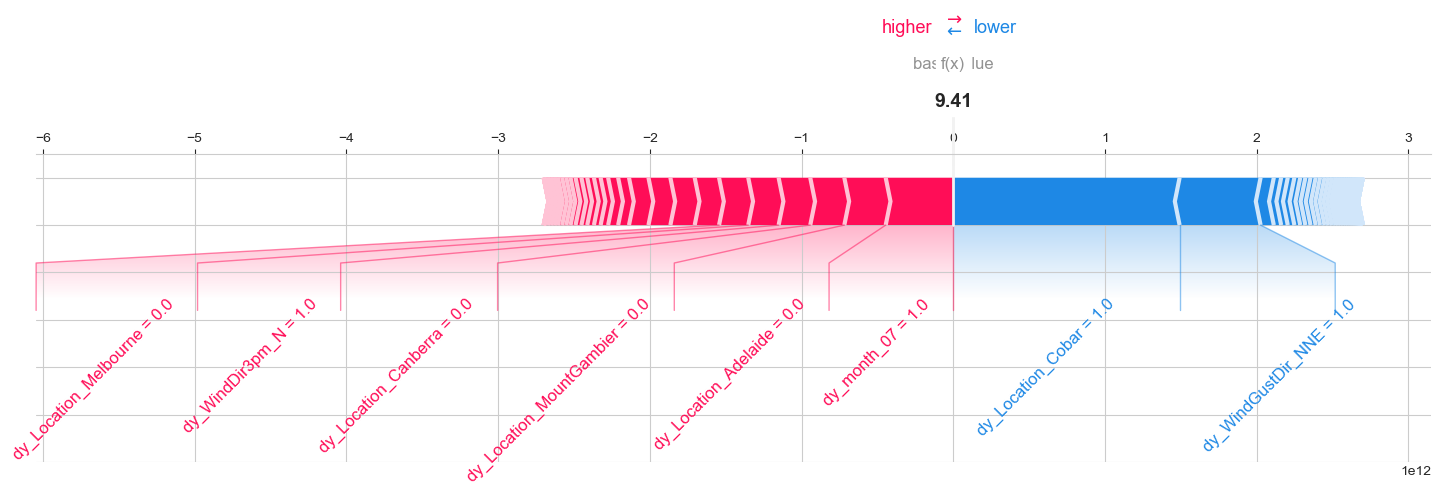

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[index], x_test_array[index], feature_names=cols_rl, matplotlib=True, figsize=(18, 4), text_rotation=45)

Se observa que los vientos de la dirección NNE[3pm] tienden a disminuir las precipitaciones; este análisis en particular es para la ciudad de Cobar(Su alto valor puede implicar que en esa zona, es tendiente de que no se den las condiciones necesarias para las precipitaciones) durante el mes de Julio(Incremento de precipitaciones). Las demás columnas no llegan a tener una incidencia notable para la muestra analizada. En las otras localidades, hay una incidencia menor pero indica que en esas zonas geográficas colaboran en incrementar las precipitaciones.

In [ ]:
explanation = shap.Explanation(values=shap_values[index], base_values=explainer.expected_value, feature_names=cols_rl)

Aca se puede observar la gráfica anterior pero distribuido en como va variando el valor de la predicción hasta llegar a la predicción, en forma simplificada tiene una tendencia de crecimiento pero con dos amortiguaciones fuerte hacia disminuir el valor.

En la otra figura debajo, es también la misma descripción, pero discriminando por lado los valores de incremento y disminución.

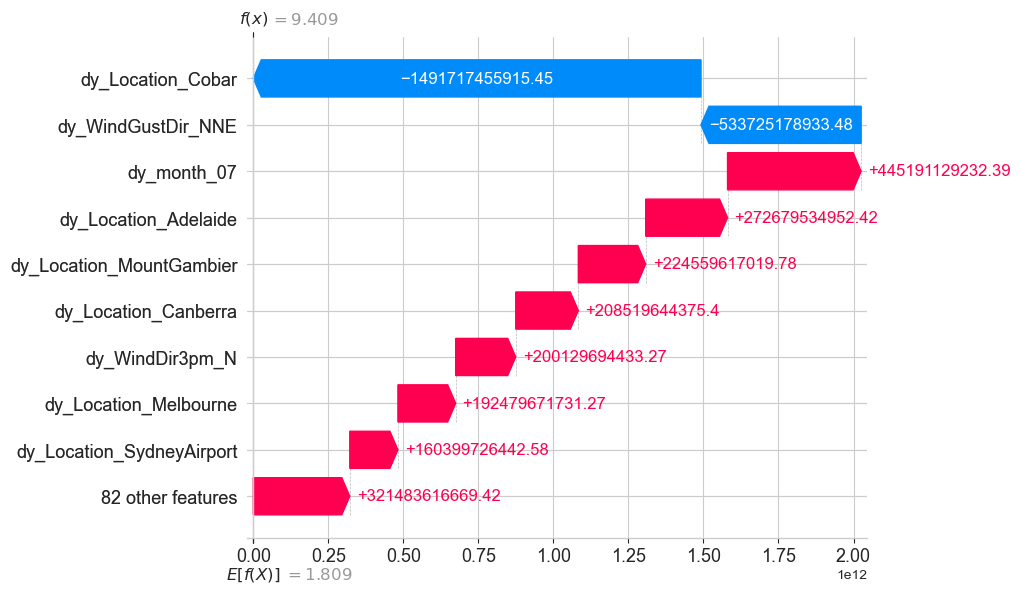

In [ ]:
shap.plots.waterfall(explanation)

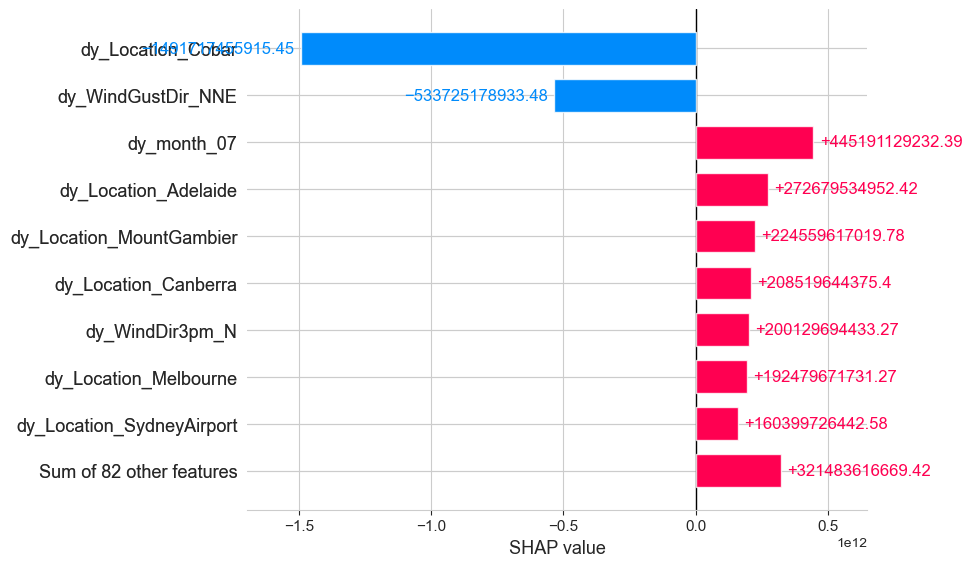

In [ ]:
shap.plots.bar(explanation)

#### INTERPRETABILIDAD GLOBAL

En esta parte se analizara el dataset completo.

In [ ]:
explanation = shap.Explanation(values = shap_values, base_values = explainer.expected_value, feature_names = cols_rl, data = x_test_array)

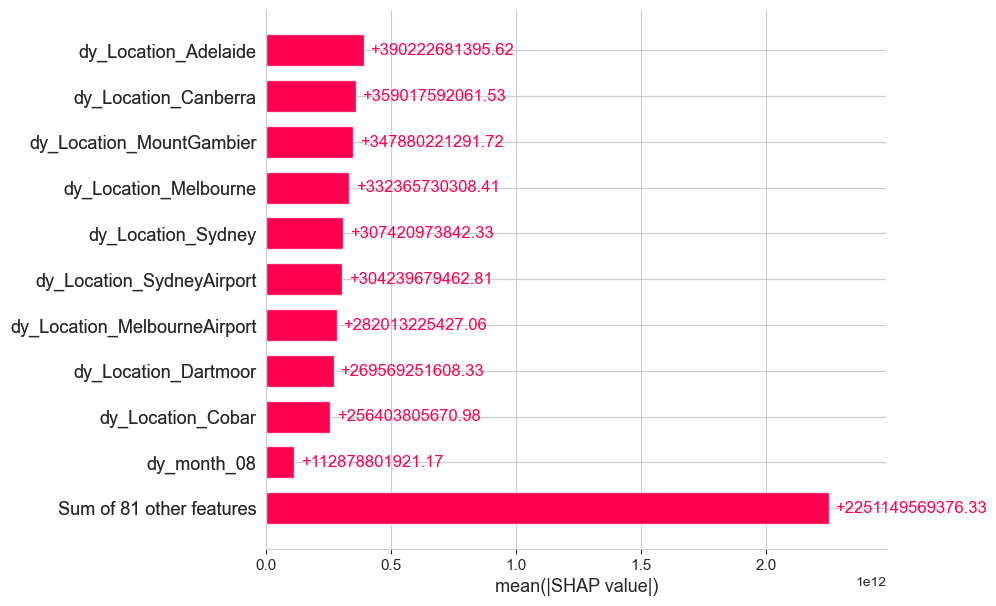

In [ ]:
shap.plots.bar(explanation, max_display=11)

Se observa en promedio un dominio fuerte por las 9 ciudades primeras y el mes 8 (Agosto); ya que expresan valores altos en el promedio absoluto.

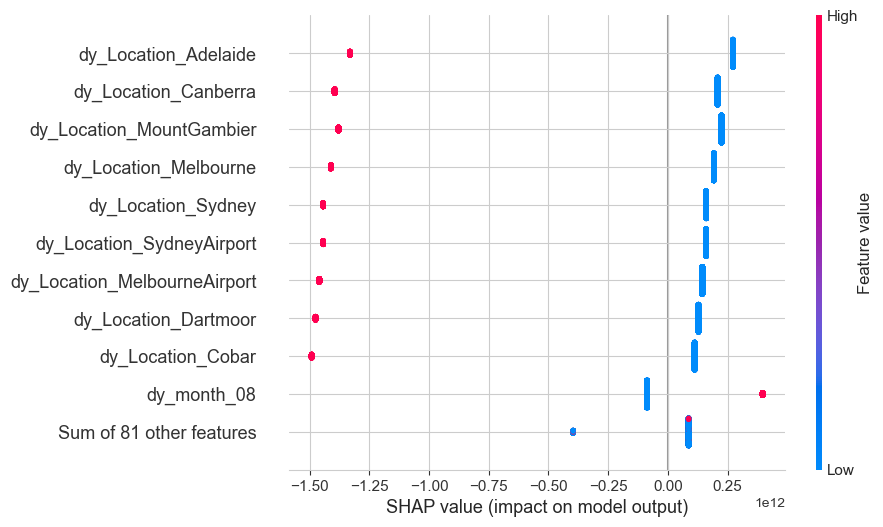

In [ ]:
shap.plots.beeswarm(explanation, max_display=11)

Lo dicho anteriormente, con este gráfico se puede observar mejor los valores involucrados en el promedio absoluto.

Puntos rojos en el lado negativo: Indican que para características como dy_Location_Sydney, dy_Location_Adelaide, etc., los valores altos de estas características están asociados con una disminución en la salida del modelo. Esto significa que cuando estas características tienen valores altos, tienden a reducir el resultado del modelo con mayor proporción.

Puntos azules en el lado positivo: Indican que para características como dy_Location_Melbourne, dy_Location_Canberra, etc., los valores bajos de estas características están asociados con un aumento en la salida del modelo. Es decir, cuando estas características tienen valores bajos, tienden a aumentar el resultado del modelo con menor proporción.

### RN: EXPLICABILIDAD-CLASIFICACION

#### INICIO

Preparamos Train y Test; junto con las demás objetos de SHAP.

In [ ]:
# Array
x_testlg_array = x_testlg.values  # x_test.to_numpy()

x_trainlg_array = x_trainlg.values  # x_train.to_numpy()

In [ ]:
# Crea un objeto explainer SHAP
explainerlg = shap.LinearExplainer(model_lg, x_trainlg_array, feature_names=cols_rl)

In [ ]:
# Calcula los valores SHAP para un conjunto de ejemplos de prueba
shap_valueslg = explainerlg.shap_values(x_testlg_array)

In [ ]:
# (n_samples, n_features)
shap_valueslg.shape

(5647, 91)

In [ ]:
# Representa el valor promedio de la predicción del modelo cuando se consideran todas las instancias del conjunto de datos.
explainerlg.expected_value

-1.7820798262573043

#### INTERPRETABILIDAD LOCAL

En esta parte se analizara una sola muestra.

In [ ]:
index=1111

model_lg.predict(x_testlg)[index]

0.0

In [ ]:
model_lg.predict_proba(x_testlg)[index]

array([0.69164742, 0.30835258])

In [ ]:
# Dado que shap trabaja en escala de log-odds, visualizamos la probabilidad en esa escala
probabilidad = model_lg.predict_proba(x_testlg)[index]
log_odds = np.log(probabilidad / (1 - probabilidad))
log_odds

array([ 0.80783246, -0.80783246])

In [ ]:
shap_valueslg[index]

array([-1.21412116e-01, -1.41058243e-02, -2.06675921e-02,  5.96833833e-03,
        9.30559158e-02,  9.05840350e-02,  2.31257901e-01,  3.01349138e-01,
        1.22195698e-01,  9.59369839e-01, -1.39935070e-02, -3.00845612e-01,
       -4.86909358e-02,  3.45394729e-01,  2.48383860e-01,  4.07510876e-03,
       -1.03609486e-01, -3.75388154e-01, -1.95819940e-01,  4.99802587e-02,
        1.69992118e-01, -1.03384382e-01, -5.87775478e-02,  6.55637991e-03,
       -1.98708110e-02,  1.20670261e-02,  5.97297440e-02,  4.24852694e-02,
        7.84277895e-03,  4.38550216e-02,  1.26557069e-02,  5.02931574e-02,
        2.60913213e-02,  1.51784205e-02, -1.75236135e-02, -9.27987604e-04,
        7.71244637e-04, -8.10935661e-03, -4.42866209e-02, -1.11046686e-03,
        1.72458502e-01,  9.27150629e-03,  1.73633791e-02, -1.75291194e-02,
       -3.56924035e-01, -7.98887910e-03,  2.21743193e-02,  9.03488954e-03,
        4.86840745e-03, -6.21855345e-03,  4.43998299e-03,  1.77267686e-02,
        1.59600929e-03,  

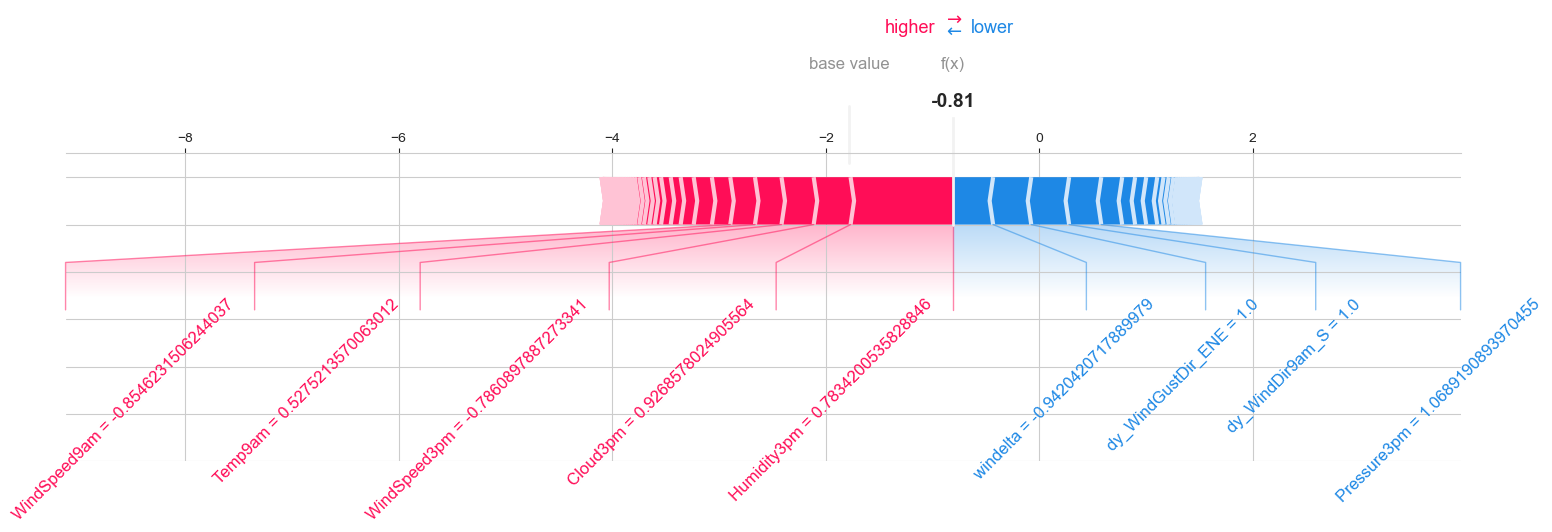

In [ ]:
shap.force_plot(explainerlg.expected_value, shap_valueslg[index], x_testlg_array[index], feature_names=cols_rl, matplotlib=True, figsize=(18, 4), text_rotation=45)

Para esta muestra:
Las features de color rojo con etiquetas colaboran en incrementar la predicción de las probabilidades a un valor mayor, mientras que las otras sin etiqueta también pero con menor participación o influencia. En este caso particular las dos mayores influencias son las nubes de las 3pm, la velocidad del viento 3pm y 9am, la temperatura de las 9am y la Humedad 3pm.

Las features de color azul con etiquetas colaboran en disminuir la predicción de las probabilidades a un valor menor, mientras que las otras sin etiqueta también pero con menor participación o influencia. En este caso particular la mayor influencia es la la variación de la velocidad del viento entre las 9am y las 3pm; la dirección ENE de la ráfaga de viento, la dirección S del viento a las 9am y la presión a las 3pm.

In [ ]:
explanationlg = shap.Explanation(values=shap_valueslg[index], base_values=explainerlg.expected_value, feature_names=cols_rl)

A continuación, se muestra la evolución parcial de la predicción con las variables mas influyentes. En resumen se ve una tendencia mas de incremento.

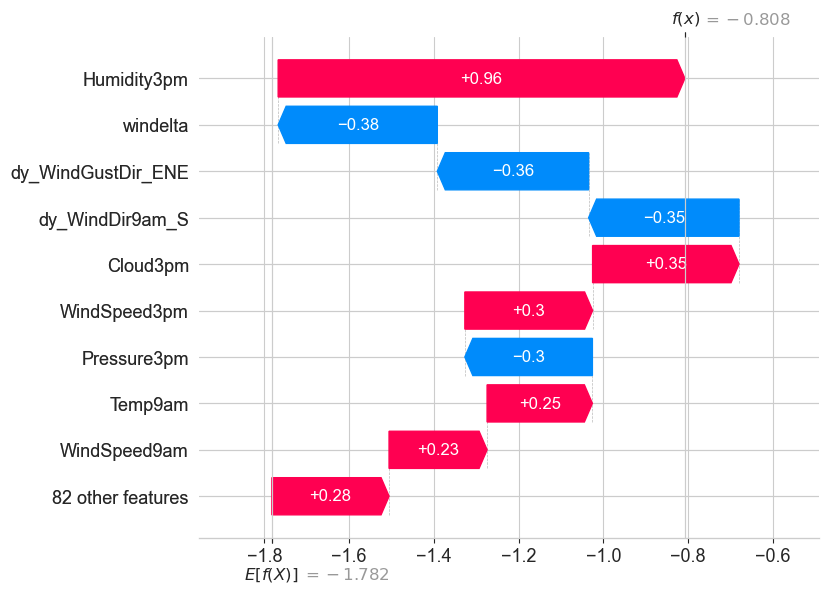

In [ ]:
shap.plots.waterfall(explanationlg)

#### INTERPRETABILIDAD GLOBAL

En esta parte se analizara el dataset completo.

In [ ]:
explanationlg = shap.Explanation(values = shap_valueslg, base_values = explainerlg.expected_value, feature_names = cols_rl, data = x_testlg_array)

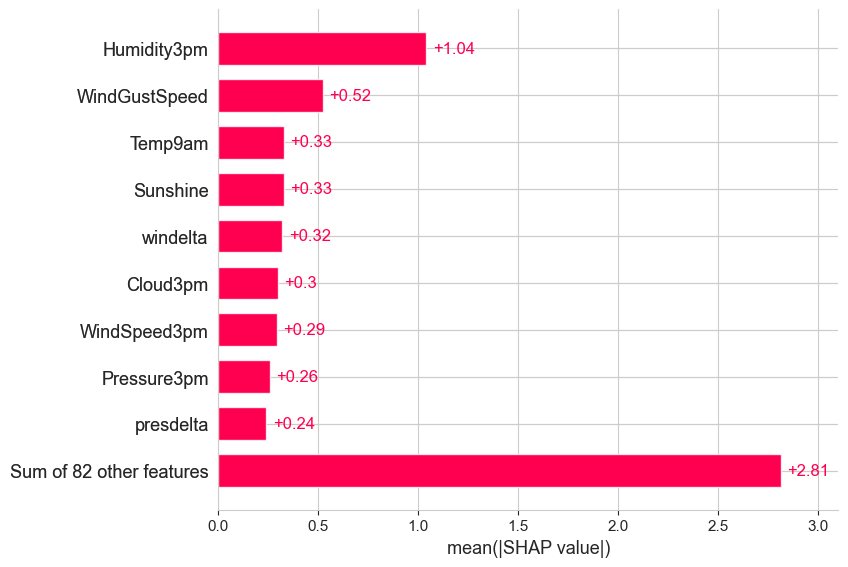

In [ ]:
shap.plots.bar(explanationlg)

Se observa en promedio que lidera fuerte las 3 primeras variables asociadas a la Humedad 3pm, la velocidad de ráfaga de viento y la temperatura 9am; ya que expresan valores altos en el promedio absoluto.

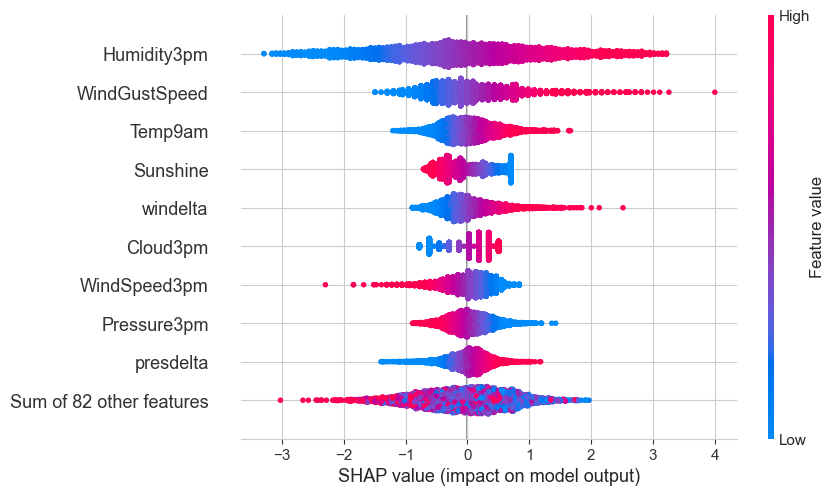

In [ ]:
shap.plots.beeswarm(explanationlg)

Humidity3pm: Los valores bajos de Humidity3pm (azul) están generalmente asociados con un impacto negativo en la predicción del modelo (valores SHAP negativos), mientras que los valores altos (rojo) están asociados con un impacto positivo (valores SHAP positivos). En este caso se ve una simetría lo que implica que cumple un papel importante en la predicción. Ademas se presenta un dominio de densidad en valores bajos de SHAP, es decir, hay más observaciones con valores SHAP en esa región.

WindGustSpeed: Los valores bajos de WindGustSpeed (azul) generalmente están asociados con un impacto negativo en la predicción del modelo, mientras que los valores altos (rojo) están asociados con un impacto positivo. Esta variable presenta una asimetría, con una incidencia mas a incrementar la predicción y con valores alto del mismo, igualmente que la anterior variable presenta mayor densidad de valores SHAP en valores bajos.

Temp9am: Los valores bajos de Temp9am (azul) tienden a estar asociados con un impacto negativo en la predicción (valores SHAP negativos), mientras que los valores altos (rojo) tienden a estar asociados con un impacto positivo (valores SHAP positivos). Esta variable en particular muestra mayor incidencia en incrementar la predicción con valores alto del mismo peros sin mucha asimetría al caso opuesto. Igual que las anteriores variables posee mayor densidad de observaciones para valores bajos de SHAP.

OBSERVACION: En los modelos (regresión/clasificación) las variables mas importantes no coinciden.

## COMPARATIVA DE MODELOS: REGRESION Y CLASIFICACION

### CM: REGRESION

### CM: CLASIFICACION